# Prediction of the rental price of housing in the city of Barcelona

Dataset description:

|Column|Description|Key|
|--|--|--|
|id|Numerical identifier of the dwelling||
|price|Market price of housing||
|currency|Currency|Euros|
|latitude|Latitude of the geographical coordinates of the dwelling||
|longitude|Longitude of the geographical coordinates of the dwelling||
|sq_meters|Square meters of housing||
|sq_meters_built|Square meters built of the house||
|rooms|Number of rooms||
|bathrooms|Number of bathrooms||
|balcony|Indicator if the dwelling has a balcony|1, 0|
|terrace|Indicator if the dwelling has a terrace|1, 0|
|exterior|Indicator if the dwelling has an exterior or interior orientation in the building|1, 0|
|orientation|Main orientation of the home|north, south, east, west|
|floor|Floor of the dwelling||
|rooftop|Indicator if the dwelling is an attic|1, 0|
|elevator|Indicator if the dwelling building has an elevator|1, 0|
|doorman|Indicator if the building has a doorman|1,0|
|pool|Indicator if the dwelling has a swimming pool or the right to use a swimming pool|1.0|
|ac|Indicator if it has air conditioning|1,0|
|heating|Indicator if it has heating|pump, electric, gas, individual|
|year_built|Year Built||
|quality|Housing quality indicator|2 - In good condition|
|city|City of housing||
|neighborhood|Housing neighborhood||
|dist_city_center|Distance in kilometers to the city center||
|furniture|Indicator if the dwelling has furniture|1: Not Equipped; 2: Equipped Kitchen; 3: Furnished|
|garage|Indicator if the dwelling has a garage|1, 0|
|property_type|Type of property||
|garden|Indicator if the dwelling has a garden|1.0|
|closest_station|Name of the nearest metro station||
|dist_closest_station|Distance in kilometers to the nearest metro station||
|created_at|Ad creation date||
|last_seen|Last date the ad was published on the web||

In [32]:
# Library load
import os
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics calculations 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math 


# calculate the Pearson's correlation between two variables 
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# sklearn packages
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV 
from sklearn.decomposition import PCA

# Confusion matrix viz
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix 

# Catboost & shap 
import catboost
import shap
# print the JS visualization code to the notebook 
shap.initjs()

# Ignoring warning messaages
import warnings
warnings.filterwarnings('ignore') 

# Data Cleaning 

In [2]:
raw_data = pd.read_csv('processed_sale_Barcelona.csv', delimiter = ',')
pd.set_option('max_columns', None)
raw_data.head()

id   price currency   latitude  longitude  sq_meters  \
0    320294  150000        €  41.459649   2.174793       63.0   
1   1786997  150000        €  41.422081   2.155370       48.0   
2   1787143  395000        €  41.402928   2.207851       84.0   
3   1976767  540000        €  41.394692   2.144422        NaN   
4  27972575  650000        €  41.398971   2.120754        NaN   

   sq_meters_built  rooms  bathrooms  balcony  terrace  exterior orientation  \
0               67      3          1      NaN      1.0       1.0        este   
1               52      2          1      NaN      NaN       1.0         NaN   
2               91      2          2      NaN      NaN       1.0         NaN   
3              100      3          1      NaN      NaN       1.0         sur   
4              141      3          2      NaN      NaN       1.0        este   

   floor  rooftop  elevator  doorman  pool   ac     heating  year_built  \
0    5.0      NaN       0.0      NaN   NaN  1.0         NaN         NaN   
1    3.0      NaN       0.0      NaN   NaN  1.0  individual         NaN   
2    NaN      NaN       0.0      NaN   NaN  1.0    electric         NaN   
3    1.0      NaN       1.0      NaN   NaN  1.0         NaN         NaN   
4    1.0      NaN       1.0      NaN   NaN  1.0         NaN         NaN   

   quality       city                              neighborhood  \
0        2  Barcelona  Ciutat Meridiana - Torre Baró - Vallbona   
1        2  Barcelona                                 El Carmel   
2        2  Barcelona                               El Poblenou   
3        2  Barcelona                    Sant Gervasi - Galvany   
4        2  Barcelona                                    Sarrià   

   dist_city_center  furniture  garage property_type  garden  \
0          7.990993        NaN     NaN          piso     NaN   
1          3.991000        NaN     NaN          piso     NaN   
2          3.579261        NaN     NaN        duplex     NaN   
3          2.257852        NaN     1.0          piso     NaN   
4          4.283368        NaN     1.0          piso     NaN   

    closest_station  dist_closest_station       created_at         last_seen  
0  Ciutat Meridiana              0.121438   9/3/2021 10:16  11/12/2021 13:50  
1         El Carmel              0.277336   9/3/2021 10:16  11/12/2021 13:50  
2          Poblenou              0.383878  8/30/2021 12:17   8/30/2021 12:17  
3   Hospital Clínic              0.875652   9/1/2021 14:04    9/2/2021 13:50  
4    Maria Cristina              1.310073  8/29/2021 11:47    9/2/2021 11:01

In [3]:
raw_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

id       price latitude longitude sq_meters sq_meters_built  \
count      5847.00     5847.00  5847.00   5847.00   3274.00         5847.00   
mean   93478251.37   367527.74    41.41      2.17     71.47           86.80   
std     6163703.73   529709.69     0.03      0.02     51.39           67.54   
min      320294.00    28000.00    41.36      2.09      2.00           10.00   
25%    93771881.50   135000.00    41.38      2.15     48.00           55.00   
50%    94967812.00   192000.00    41.40      2.17     60.00           69.00   
75%    95131865.50   395000.00    41.42      2.18     79.00           93.00   
max    95893914.00  9500000.00    41.47      2.22    900.00          970.00   

         rooms bathrooms  balcony  terrace exterior    floor rooftop elevator  \
count  5847.00   5847.00  2210.00  1428.00  4770.00  3765.00  407.00  5276.00   
mean      2.60      1.42     1.00     1.00     0.87     3.20    1.00     0.63   
std       1.16      0.80     0.00     0.00     0.33     2.35    0.00     0.48   
min       0.00      1.00     1.00     1.00     0.00     1.00    1.00     0.00   
25%       2.00      1.00     1.00     1.00     1.00     1.00    1.00     0.00   
50%       3.00      1.00     1.00     1.00     1.00     3.00    1.00     1.00   
75%       3.00      2.00     1.00     1.00     1.00     4.00    1.00     1.00   
max      11.00      9.00     1.00     1.00     1.00    25.00    1.00     1.00   

      doorman    pool       ac year_built  quality dist_city_center furniture  \
count    0.00  170.00  2649.00    4082.00  5847.00          5847.00      0.00   
mean      nan    1.00     1.00    1954.56     2.00             3.50       nan   
std       nan    0.00     0.00      36.55     0.00             2.02       nan   
min       nan    1.00     1.00    1769.00     2.00             0.07       nan   
25%       nan    1.00     1.00    1940.00     2.00             1.76       nan   
50%       nan    1.00     1.00    1965.00     2.00             3.38       nan   
75%       nan    1.00     1.00    1973.00     2.00             4.90       nan   
max       nan    1.00     1.00    2022.00     2.00             8.63       nan   

       garage garden dist_closest_station  
count  405.00  61.00              5847.00  
mean     1.00   1.00                 0.36  
std      0.00   0.00                 0.29  
min      1.00   1.00                 0.00  
25%      1.00   1.00                 0.21  
50%      1.00   1.00                 0.31  
75%      1.00   1.00                 0.42  
max      1.00   1.00                 4.20

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5847 non-null   int64  
 1   price                 5847 non-null   int64  
 2   currency              5847 non-null   object 
 3   latitude              5847 non-null   float64
 4   longitude             5847 non-null   float64
 5   sq_meters             3274 non-null   float64
 6   sq_meters_built       5847 non-null   int64  
 7   rooms                 5847 non-null   int64  
 8   bathrooms             5847 non-null   int64  
 9   balcony               2210 non-null   float64
 10  terrace               1428 non-null   float64
 11  exterior              4770 non-null   float64
 12  orientation           3134 non-null   object 
 13  floor                 3765 non-null   float64
 14  rooftop               407 non-null    float64
 15  elevator             

In [5]:
raw_data.isnull().sum() / len(raw_data) # Calcula la proporción de null values sobre todas las variables

id                      0.000000
price                   0.000000
currency                0.000000
latitude                0.000000
longitude               0.000000
sq_meters               0.440055
sq_meters_built         0.000000
rooms                   0.000000
bathrooms               0.000000
balcony                 0.622028
terrace                 0.755772
exterior                0.184197
orientation             0.463999
floor                   0.356080
rooftop                 0.930392
elevator                0.097657
doorman                 1.000000
pool                    0.970925
ac                      0.546947
heating                 0.425859
year_built              0.301864
quality                 0.000000
city                    0.000000
neighborhood            0.000000
dist_city_center        0.000000
furniture               1.000000
garage                  0.930734
property_type           0.000342
garden                  0.989567
closest_station         0.000000
dist_close

In [6]:
#removing columns that have 100% NaN values 
raw_data = raw_data.drop(['doorman', 'furniture'], axis=1) # Retira columnas que no nos sean útiles en el dataset

In [7]:
raw_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

id       price latitude longitude sq_meters sq_meters_built  \
count      5847.00     5847.00  5847.00   5847.00   3274.00         5847.00   
mean   93478251.37   367527.74    41.41      2.17     71.47           86.80   
std     6163703.73   529709.69     0.03      0.02     51.39           67.54   
min      320294.00    28000.00    41.36      2.09      2.00           10.00   
25%    93771881.50   135000.00    41.38      2.15     48.00           55.00   
50%    94967812.00   192000.00    41.40      2.17     60.00           69.00   
75%    95131865.50   395000.00    41.42      2.18     79.00           93.00   
max    95893914.00  9500000.00    41.47      2.22    900.00          970.00   

         rooms bathrooms  balcony  terrace exterior    floor rooftop elevator  \
count  5847.00   5847.00  2210.00  1428.00  4770.00  3765.00  407.00  5276.00   
mean      2.60      1.42     1.00     1.00     0.87     3.20    1.00     0.63   
std       1.16      0.80     0.00     0.00     0.33     2.35    0.00     0.48   
min       0.00      1.00     1.00     1.00     0.00     1.00    1.00     0.00   
25%       2.00      1.00     1.00     1.00     1.00     1.00    1.00     0.00   
50%       3.00      1.00     1.00     1.00     1.00     3.00    1.00     1.00   
75%       3.00      2.00     1.00     1.00     1.00     4.00    1.00     1.00   
max      11.00      9.00     1.00     1.00     1.00    25.00    1.00     1.00   

         pool       ac year_built  quality dist_city_center  garage garden  \
count  170.00  2649.00    4082.00  5847.00          5847.00  405.00  61.00   
mean     1.00     1.00    1954.56     2.00             3.50    1.00   1.00   
std      0.00     0.00      36.55     0.00             2.02    0.00   0.00   
min      1.00     1.00    1769.00     2.00             0.07    1.00   1.00   
25%      1.00     1.00    1940.00     2.00             1.76    1.00   1.00   
50%      1.00     1.00    1965.00     2.00             3.38    1.00   1.00   
75%      1.00     1.00    1973.00     2.00             4.90    1.00   1.00   
max      1.00     1.00    2022.00     2.00             8.63    1.00   1.00   

      dist_closest_station  
count              5847.00  
mean                  0.36  
std                   0.29  
min                   0.00  
25%                   0.21  
50%                   0.31  
75%                   0.42  
max                   4.20

In [8]:
#replace values of (0 or 1) categorical variables that have NaN with 0 

cols_to_null = ['balcony', 'terrace', 'exterior', 'elevator', 'ac', 'rooftop', 'pool','garage','garden']
for i in range(0,len(cols_to_null)):
    raw_data[cols_to_null[1]].fillna(0, inplace = True) 



In [9]:
raw_data["balcony"].fillna(0, inplace=True)
raw_data["terrace"].fillna(0, inplace=True)
raw_data["exterior"].fillna(0, inplace=True)
raw_data["elevator"].fillna(0, inplace=True)
raw_data["ac"].fillna(0, inplace=True)
raw_data["balcony"].fillna(0, inplace=True)
raw_data["pool"].fillna(0, inplace=True)
raw_data["garage"].fillna(0, inplace=True)
raw_data["garden"].fillna(0, inplace=True)
raw_data["rooftop"].fillna(0, inplace=True)

In [10]:
raw_data.isnull().sum() / len(raw_data) # Calcula la proporción de null values sobre todas las variables

id                      0.000000
price                   0.000000
currency                0.000000
latitude                0.000000
longitude               0.000000
sq_meters               0.440055
sq_meters_built         0.000000
rooms                   0.000000
bathrooms               0.000000
balcony                 0.000000
terrace                 0.000000
exterior                0.000000
orientation             0.463999
floor                   0.356080
rooftop                 0.000000
elevator                0.000000
pool                    0.000000
ac                      0.000000
heating                 0.425859
year_built              0.301864
quality                 0.000000
city                    0.000000
neighborhood            0.000000
dist_city_center        0.000000
garage                  0.000000
property_type           0.000342
garden                  0.000000
closest_station         0.000000
dist_closest_station    0.000000
created_at              0.000000
last_seen 

In [11]:
raw_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

id       price latitude longitude sq_meters sq_meters_built  \
count      5847.00     5847.00  5847.00   5847.00   3274.00         5847.00   
mean   93478251.37   367527.74    41.41      2.17     71.47           86.80   
std     6163703.73   529709.69     0.03      0.02     51.39           67.54   
min      320294.00    28000.00    41.36      2.09      2.00           10.00   
25%    93771881.50   135000.00    41.38      2.15     48.00           55.00   
50%    94967812.00   192000.00    41.40      2.17     60.00           69.00   
75%    95131865.50   395000.00    41.42      2.18     79.00           93.00   
max    95893914.00  9500000.00    41.47      2.22    900.00          970.00   

         rooms bathrooms  balcony  terrace exterior    floor  rooftop  \
count  5847.00   5847.00  5847.00  5847.00  5847.00  3765.00  5847.00   
mean      2.60      1.42     0.38     0.24     0.71     3.20     0.07   
std       1.16      0.80     0.48     0.43     0.45     2.35     0.25   
min       0.00      1.00     0.00     0.00     0.00     1.00     0.00   
25%       2.00      1.00     0.00     0.00     0.00     1.00     0.00   
50%       3.00      1.00     0.00     0.00     1.00     3.00     0.00   
75%       3.00      2.00     1.00     0.00     1.00     4.00     0.00   
max      11.00      9.00     1.00     1.00     1.00    25.00     1.00   

      elevator     pool       ac year_built  quality dist_city_center  \
count  5847.00  5847.00  5847.00    4082.00  5847.00          5847.00   
mean      0.57     0.03     0.45    1954.56     2.00             3.50   
std       0.50     0.17     0.50      36.55     0.00             2.02   
min       0.00     0.00     0.00    1769.00     2.00             0.07   
25%       0.00     0.00     0.00    1940.00     2.00             1.76   
50%       1.00     0.00     0.00    1965.00     2.00             3.38   
75%       1.00     0.00     1.00    1973.00     2.00             4.90   
max       1.00     1.00     1.00    2022.00     2.00             8.63   

        garage   garden dist_closest_station  
count  5847.00  5847.00              5847.00  
mean      0.07     0.01                 0.36  
std       0.25     0.10                 0.29  
min       0.00     0.00                 0.00  
25%       0.00     0.00                 0.21  
50%       0.00     0.00                 0.31  
75%       0.00     0.00                 0.42  
max       1.00     1.00                 4.20

In [12]:
#removing rows where values are blank 
raw_data = raw_data.dropna(subset=['property_type'])
raw_data['sq_meters'] = raw_data['sq_meters'].fillna(raw_data['sq_meters'].mean())
raw_data['floor'] = raw_data['floor'].fillna(raw_data['floor'].median())
raw_data['year_built'] = raw_data['year_built'].fillna(raw_data['year_built'].median())

In [13]:
raw_data.isnull().sum() / len(raw_data) # Calcula la proporción de null values sobre todas las variables

id                      0.000000
price                   0.000000
currency                0.000000
latitude                0.000000
longitude               0.000000
sq_meters               0.000000
sq_meters_built         0.000000
rooms                   0.000000
bathrooms               0.000000
balcony                 0.000000
terrace                 0.000000
exterior                0.000000
orientation             0.463815
floor                   0.000000
rooftop                 0.000000
elevator                0.000000
pool                    0.000000
ac                      0.000000
heating                 0.426005
year_built              0.000000
quality                 0.000000
city                    0.000000
neighborhood            0.000000
dist_city_center        0.000000
garage                  0.000000
property_type           0.000000
garden                  0.000000
closest_station         0.000000
dist_closest_station    0.000000
created_at              0.000000
last_seen 

In [14]:
raw_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

id       price latitude longitude sq_meters sq_meters_built  \
count      5845.00     5845.00  5845.00   5845.00   5845.00         5845.00   
mean   93478197.01   366455.89    41.41      2.17     71.35           86.64   
std     6164698.18   525624.44     0.03      0.02     38.15           66.99   
min      320294.00    28000.00    41.36      2.09      2.00           10.00   
25%    93772764.00   135000.00    41.38      2.15     58.00           55.00   
50%    94967812.00   190000.00    41.40      2.17     71.35           69.00   
75%    95131888.00   395000.00    41.42      2.18     71.35           93.00   
max    95893914.00  9500000.00    41.47      2.22    900.00          970.00   

         rooms bathrooms  balcony  terrace exterior    floor  rooftop  \
count  5845.00   5845.00  5845.00  5845.00  5845.00  5845.00  5845.00   
mean      2.59      1.42     0.38     0.24     0.71     3.13     0.07   
std       1.15      0.80     0.48     0.43     0.45     1.89     0.25   
min       0.00      1.00     0.00     0.00     0.00     1.00     0.00   
25%       2.00      1.00     0.00     0.00     0.00     2.00     0.00   
50%       3.00      1.00     0.00     0.00     1.00     3.00     0.00   
75%       3.00      2.00     1.00     0.00     1.00     3.00     0.00   
max      11.00      9.00     1.00     1.00     1.00    25.00     1.00   

      elevator     pool       ac year_built  quality dist_city_center  \
count  5845.00  5845.00  5845.00    5845.00  5845.00          5845.00   
mean      0.57     0.03     0.45    1957.71     2.00             3.50   
std       0.50     0.17     0.50      30.90     0.00             2.02   
min       0.00     0.00     0.00    1769.00     2.00             0.07   
25%       0.00     0.00     0.00    1960.00     2.00             1.76   
50%       1.00     0.00     0.00    1965.00     2.00             3.38   
75%       1.00     0.00     1.00    1969.00     2.00             4.90   
max       1.00     1.00     1.00    2022.00     2.00             8.63   

        garage   garden dist_closest_station  
count  5845.00  5845.00              5845.00  
mean      0.07     0.01                 0.36  
std       0.25     0.10                 0.28  
min       0.00     0.00                 0.00  
25%       0.00     0.00                 0.21  
50%       0.00     0.00                 0.31  
75%       0.00     0.00                 0.42  
max       1.00     1.00                 4.20

In [15]:
#clean_data = raw_data.dropna(subset = ['heating', 'orientation'], inplace=True)

In [16]:
raw_data['property_age'] = 2022 - raw_data['year_built']

In [234]:
#creating property age category
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 40)):
        return "0 - 40"
    elif ((x >= 40) & (x < 70)):
        return "40 - 70"
    elif ((x >= 70) & (x < 120)):
        return "70 - 120"
    elif ((x >= 120) & (x < 150)):
        return "120 - 150"
    elif ((x >= 150)):
        return "+150"
    else:
        return "Unknown"

func = np.vectorize(conditions)
raw_data['property_age_cat'] = func(raw_data['property_age'])

#creating apartment size category
def conditions(p):
    if ((p >= 0) & (p < 38)):
        return "very small apartment"
    elif ((p >= 38) & (p < 58)):
        return "small apartment"
    elif ((p >= 58) & (p < 71)):
        return "average sized apartment"
    elif ((p >= 71)):
        return "large apartment"

funcy = np.vectorize(conditions)
raw_data['apt_size_category'] = funcy(raw_data['sq_meters'])


#creating distance to city center category 
def conditions(z):
    if ((z >= 0) & (z < 1.76)):
        return "very close to city center"
    elif ((z >= 1.77) & (z < 3.38)):
        return "close to city center"
    elif ((z >= 3.39) & (z < 4.9)):
        return "far from city center"
    elif ((z >= 4.91) & (z < 6.91)):
        return "very far city center"
    elif ((z >= 6.92)):
        return "extremely far city center"


func3 = np.vectorize(conditions)
raw_data['dist_city_center_cat'] = func3(raw_data['dist_city_center'])

#creating price category 
def conditions(a):
    if ((a >= 28000) & (a < 135000)):
        return "very cheap price"
    elif ((a >= 135000) & (a < 190000)):
        return "cheap price"
    elif ((a >= 190000) & (a < 395000)):
        return "moderate price"
    elif ((a >= 395000) & (a < 920624)):
        return "expensive"
    elif ((a >= 920624)):
        return "very expensive"


func4 = np.vectorize(conditions)
raw_data['price_cat'] = func4(raw_data['price'])


#creating distance to closest station category 
def conditions(y):
    if ((y >= 0) & (y < .20)):
        return "very close to train"
    elif ((y >= .20) & (y < .31)):
        return "close to train"
    elif ((y >= .31) & (y < .42)):
        return "far from train"
    elif ((y >= .42) & (y < .52)):
        return "very far from train"
    elif ((y >= .52)):
        return "extremely far from train"


func2 = np.vectorize(conditions)
raw_data['dist_closest_station_cat'] = func2(raw_data['dist_closest_station'])

raw_data.head()

id   price currency   latitude  longitude  sq_meters  \
0    320294  150000        €  41.459649   2.174793  63.000000   
1   1786997  150000        €  41.422081   2.155370  48.000000   
2   1787143  395000        €  41.402928   2.207851  84.000000   
3   1976767  540000        €  41.394692   2.144422  71.354415   
4  27972575  650000        €  41.398971   2.120754  71.354415   

   sq_meters_built  rooms  bathrooms  balcony  terrace  exterior orientation  \
0               67      3          1      0.0      1.0       1.0        este   
1               52      2          1      0.0      0.0       1.0         NaN   
2               91      2          2      0.0      0.0       1.0         NaN   
3              100      3          1      0.0      0.0       1.0         sur   
4              141      3          2      0.0      0.0       1.0        este   

   floor  rooftop  elevator  pool   ac     heating  year_built  quality  \
0    5.0      0.0       0.0   0.0  1.0         NaN      1965.0        2   
1    3.0      0.0       0.0   0.0  1.0  individual      1965.0        2   
2    3.0      0.0       0.0   0.0  1.0    electric      1965.0        2   
3    1.0      0.0       1.0   0.0  1.0         NaN      1965.0        2   
4    1.0      0.0       1.0   0.0  1.0         NaN      1965.0        2   

        city                              neighborhood  dist_city_center  \
0  Barcelona  Ciutat Meridiana - Torre Baró - Vallbona          7.990993   
1  Barcelona                                 El Carmel          3.991000   
2  Barcelona                               El Poblenou          3.579261   
3  Barcelona                    Sant Gervasi - Galvany          2.257852   
4  Barcelona                                    Sarrià          4.283368   

   garage property_type  garden   closest_station  dist_closest_station  \
0     0.0          piso     0.0  Ciutat Meridiana              0.121438   
1     0.0          piso     0.0         El Carmel              0.277336   
2     0.0        duplex     0.0          Poblenou              0.383878   
3     1.0          piso     0.0   Hospital Clínic              0.875652   
4     1.0          piso     0.0    Maria Cristina              1.310073   

        created_at         last_seen  property_age property_age_cat  \
0   9/3/2021 10:16  11/12/2021 13:50          57.0          40 - 70   
1   9/3/2021 10:16  11/12/2021 13:50          57.0          40 - 70   
2  8/30/2021 12:17   8/30/2021 12:17          57.0          40 - 70   
3   9/1/2021 14:04    9/2/2021 13:50          57.0          40 - 70   
4  8/29/2021 11:47    9/2/2021 11:01          57.0          40 - 70   

         apt_size_category       dist_city_center_cat    price_cat  \
0  average sized apartment  extremely far city center  cheap price   
1          small apartment       far from city center  cheap price   
2          large apartment       far from city center    expensive   
3          large apartment       close to city center    expensive   
4          large apartment       far from city center    expensive   

   dist_closest_station_cat  
0       very close to train  
1            close to train  
2            far from train  
3  extremely far from train  
4  extremely far from train

Text(0.5, 0.98, 'Number of Apartments by Size & Price Category')

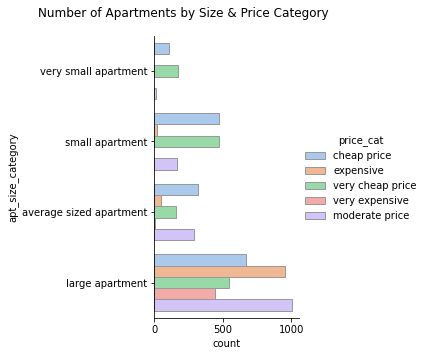

In [18]:
center_chart2 = sn.catplot(y="apt_size_category", hue="price_cat", kind="count",
            order=['very small apartment',"small apartment", 'average sized apartment', "large apartment"],
            palette="pastel", edgecolor=".6",
            data=raw_data)

center_chart2.fig.subplots_adjust(top=0.9)
center_chart2.fig.suptitle('Number of Apartments by Size & Price Category')

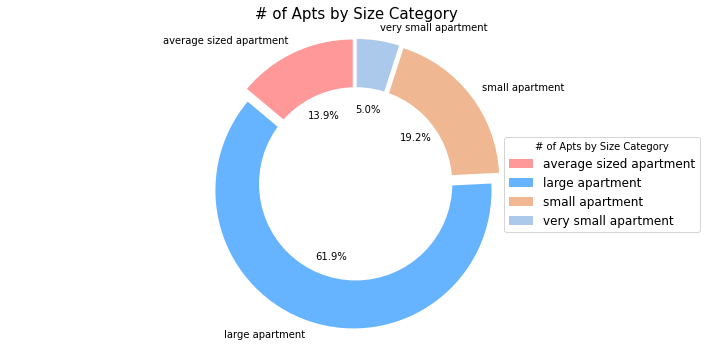

In [19]:
apt_type_all = raw_data.groupby('apt_size_category')['price_cat'].count().reset_index()
apt_type_all.rename(columns={'price_cat':'n_apts'},inplace=True)

explode = (0.05,0.05,0.05,0.05)
labels = ['average sized apartment','large apartment','small apartment','very small apartment']
colors=['#ff9999','#66b3ff','#EFB792', '#ABC9EA']

plt.figure(figsize=(10,5))

plt.pie(apt_type_all['n_apts'],autopct='%1.1f%%', colors = colors, explode = explode, startangle=90, pctdistance=.5, labels = labels)
plt.axis('equal')
plt.legend(labels=apt_type_all['apt_size_category'],loc='right',fontsize='12', title =  "# of Apts by Size Category")
plt.title('# of Apts by Size Category', fontsize='15')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.show()



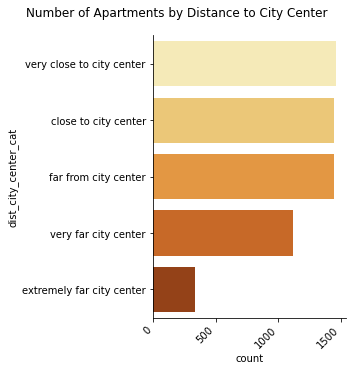

In [20]:
center_chart = sn.catplot(y = 'dist_city_center_cat', palette="YlOrBr", kind = 'count', order=['very close to city center','close to city center','far from city center', 'very far city center','extremely far city center'],data = raw_data) 

plt.xticks(
    rotation=45, 
    horizontalalignment='right')

plt.yticks( 
    horizontalalignment='right')

center_chart.fig.subplots_adjust(top=0.9)
center_chart.fig.suptitle('Number of Apartments by Distance to City Center')


None

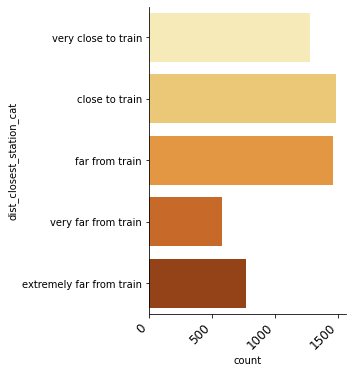

In [21]:
station_chart = sn.catplot(y = 'dist_closest_station_cat', palette="YlOrBr", kind = 'count', order=['very close to train',"close to train", "far from train", "very far from train","extremely far from train" ],data = raw_data) 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large' )

center_chart.fig.subplots_adjust(top=0.9)
center_chart.fig.suptitle('Number of Apartments by Distance to Train Station')

None


In [22]:
#creating a dataframe with apartments that are close or very close to the city center


close_to_center = ['very close to city center', 'close to city center']
    
close_apts = raw_data[raw_data['dist_city_center_cat'].isin(close_to_center)]

In [23]:
close_apts.describe().apply(lambda s: s.apply('{0:.2f}'.format))

id       price latitude longitude sq_meters sq_meters_built  \
count      2913.00     2913.00  2913.00   2913.00   2913.00         2913.00   
mean   93364374.28   446315.92    41.39      2.16     73.47           91.57   
std     6161682.86   440248.54     0.01      0.02     32.10           61.63   
min     1976767.00    29000.00    41.36      2.13     12.00           13.00   
25%    93713404.00   157500.00    41.38      2.15     66.00           52.00   
50%    94935420.00   325000.00    41.39      2.17     71.35           76.00   
75%    95115195.00   532000.00    41.40      2.18     71.35          110.00   
max    95892003.00  6500000.00    41.42      2.21    553.00          880.00   

         rooms bathrooms  balcony  terrace exterior    floor  rooftop  \
count  2913.00   2913.00  2913.00  2913.00  2913.00  2913.00  2913.00   
mean      2.49      1.56     0.45     0.29     0.74     3.04     0.08   
std       1.27      0.78     0.50     0.46     0.44     1.61     0.27   
min       0.00      1.00     0.00     0.00     0.00     1.00     0.00   
25%       2.00      1.00     0.00     0.00     0.00     2.00     0.00   
50%       3.00      1.00     0.00     0.00     1.00     3.00     0.00   
75%       3.00      2.00     1.00     1.00     1.00     3.00     0.00   
max       9.00      7.00     1.00     1.00     1.00    25.00     1.00   

      elevator     pool       ac year_built  quality dist_city_center  \
count  2913.00  2913.00  2913.00    2913.00  2913.00          2913.00   
mean      0.66     0.02     0.57    1948.09     2.00             1.81   
std       0.48     0.12     0.49      38.81     0.00             0.84   
min       0.00     0.00     0.00    1769.00     2.00             0.07   
25%       0.00     0.00     0.00    1930.00     2.00             1.09   
50%       1.00     0.00     1.00    1965.00     2.00             1.75   
75%       1.00     0.00     1.00    1967.00     2.00             2.49   
max       1.00     1.00     1.00    2021.00     2.00             3.38   

        garage   garden dist_closest_station property_age  
count  2913.00  2913.00              2913.00      2913.00  
mean      0.06     0.00                 0.36        73.91  
std       0.24     0.06                 0.22        38.81  
min       0.00     0.00                 0.01         1.00  
25%       0.00     0.00                 0.22        55.00  
50%       0.00     0.00                 0.32        57.00  
75%       0.00     0.00                 0.43        92.00  
max       1.00     1.00                 1.45       253.00

In [25]:
mean_close = close_apts['price'].mean()
mean_all = raw_data['price'].mean()

print("Average price of Apartments Close to City Center: € ", end="")
print(math.trunc(mean_close))
print("Average price of All Apartments: € ", end="")
print(math.trunc(mean_all))

print('____________________________________')

size_mean_close = close_apts['sq_meters'].mean()
size_mean_all = raw_data['sq_meters'].mean()

print("Average Sq Ft of Apartments Close to City Center: ", end="")
print(math.trunc(size_mean_close))
print("Average Sq Ft of All Apartments: ", end="")
print(math.trunc(size_mean_all))

print('____________________________________')

yr_mean_close = close_apts['year_built'].mean()
yr_mean_all = raw_data['year_built'].mean()
print("Average Year Built of Apartments Close to City Center: ", end="")
print(math.trunc(yr_mean_close))
print("Average Year Built of All Apartments: ", end="")
print(math.trunc(yr_mean_all))


Average price of Apartments Close to City Center: € 446315
Average price of All Apartments: € 366455
____________________________________
Average Sq Ft of Apartments Close to City Center: 73
Average Sq Ft of All Apartments: 71
____________________________________
Average Year Built of Apartments Close to City Center: 1948
Average Year Built of All Apartments: 1957


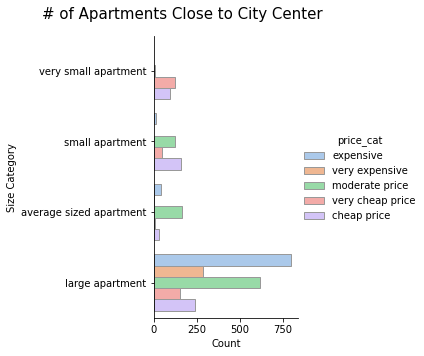

In [26]:
center_chart2 = sn.catplot(y="apt_size_category", hue="price_cat", kind="count",
            order=['very small apartment',"small apartment", 'average sized apartment', "large apartment"],
            palette="pastel", edgecolor=".6",
            data=close_apts)

center_chart2.fig.subplots_adjust(top=0.9)
center_chart2.fig.suptitle('# of Apartments Close to City Center', fontsize = 15)
plt.xlabel('Count',fontsize='10')
plt.ylabel('Size Category', fontsize='10')


None

Based on the two visuals above, apartments that are close or very close to the city center ( < 3.38km), the apartments are, on average, more expensive, older, and slightly larger that the entire population of apartments. 

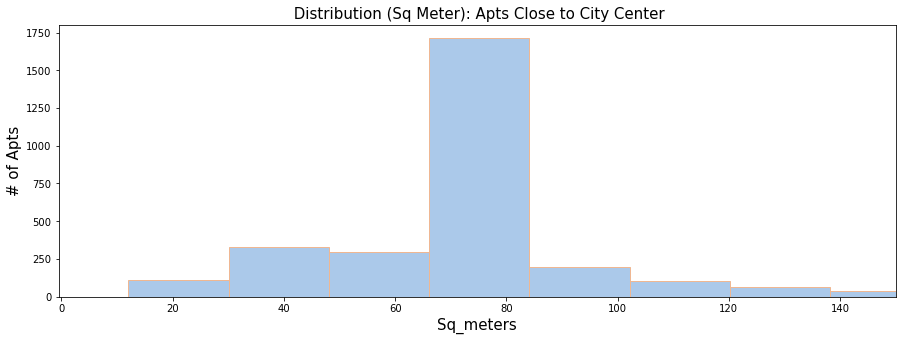

In [27]:
fig2,ax = plt.subplots(figsize=(15,5))
plt.hist(close_apts['sq_meters'],bins=30,color='#ABC9EA',edgecolor='#EFB792')

plt.xlabel('Sq_meters',fontsize='15')
plt.ylabel('# of Apts', fontsize='15')
plt.xlim((-0.5,150))
plt.title(' Distribution (Sq Meter): Apts Close to City Center',fontsize='15')
plt.show()

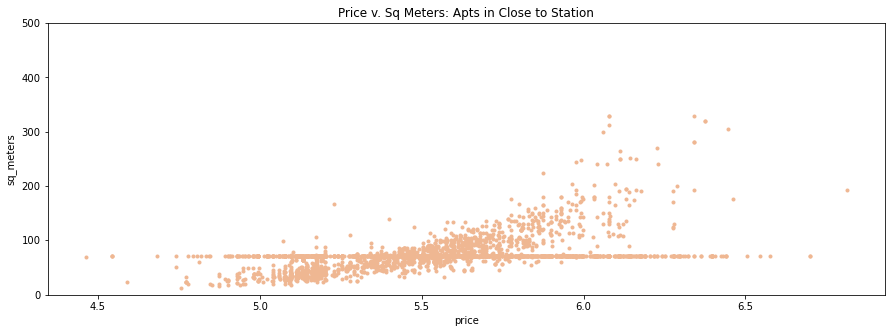

In [28]:
plt.figure(figsize=(15,5))
plt.scatter(np.log10(close_apts['price']), close_apts['sq_meters'], marker='.', c = '#EFB792')
plt.title('Price v. Sq Meters: Apts in Close to Station')
plt.xlabel('price')
plt.ylim((-0.5,500))
plt.ylabel('sq_meters');


In [34]:
seed(1)

price_corr = close_apts['price']
sqm_corr = close_apts['sq_meters']

corr, _ = pearsonr(price_corr, sqm_corr)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.446


We can see here, that based on the dataset we created, sq_meters has a positive correlation with price. 

In [35]:
#creating a dataframe with apartments that are close to city center and train station 
close_to_center_and_station = ['very close to train',"close to train"]
    
apts = close_apts[close_apts['dist_closest_station_cat'].isin(close_to_center_and_station)]

In [43]:
apts.describe().apply(lambda s: s.apply('{0:.2f}'.format))

id       price latitude longitude sq_meters sq_meters_built  \
count      1345.00     1345.00  1345.00   1345.00   1345.00         1345.00   
mean   93260364.36   426877.01    41.39      2.17     71.59           87.85   
std     6596806.07   425333.44     0.01      0.01     25.21           53.49   
min    29714252.00    35000.00    41.37      2.13     15.00           13.00   
25%    93612478.00   158000.00    41.38      2.16     67.00           52.00   
50%    94967870.00   312000.00    41.38      2.17     71.35           75.00   
75%    95117405.00   486900.00    41.40      2.18     71.35          106.00   
max    95892003.00  5000000.00    41.42      2.21    300.00          582.00   

         rooms bathrooms  balcony  terrace exterior    floor  rooftop  \
count  1345.00   1345.00  1345.00  1345.00  1345.00  1345.00  1345.00   
mean      2.43      1.52     0.49     0.29     0.74     3.00     0.07   
std       1.19      0.74     0.50     0.45     0.44     1.50     0.26   
min       0.00      1.00     0.00     0.00     0.00     1.00     0.00   
25%       2.00      1.00     0.00     0.00     0.00     2.00     0.00   
50%       2.00      1.00     0.00     0.00     1.00     3.00     0.00   
75%       3.00      2.00     1.00     1.00     1.00     3.00     0.00   
max       9.00      7.00     1.00     1.00     1.00    14.00     1.00   

      elevator     pool       ac year_built  quality dist_city_center  \
count  1345.00  1345.00  1345.00    1345.00  1345.00          1345.00   
mean      0.65     0.01     0.58    1943.88     2.00             1.62   
std       0.48     0.10     0.49      40.93     0.00             0.83   
min       0.00     0.00     0.00    1769.00     2.00             0.07   
25%       0.00     0.00     0.00    1910.00     2.00             0.97   
50%       1.00     0.00     1.00    1965.00     2.00             1.41   
75%       1.00     0.00     1.00    1965.00     2.00             2.24   
max       1.00     1.00     1.00    2021.00     2.00             3.38   

        garage   garden dist_closest_station property_age  
count  1345.00  1345.00              1345.00      1345.00  
mean      0.02     0.00                 0.20        78.12  
std       0.15     0.03                 0.08        40.93  
min       0.00     0.00                 0.01         1.00  
25%       0.00     0.00                 0.15        57.00  
50%       0.00     0.00                 0.22        57.00  
75%       0.00     0.00                 0.27       112.00  
max       1.00     1.00                 0.31       253.00

In [44]:
mean_apts = apts['price'].mean()
mean_all = raw_data['price'].mean()

print("Average price of Apartments Close to City Center & Station: €", end="")
print(math.trunc(mean_apts))
print("Average price of All Apartments: €", end="")
print(math.trunc(mean_all))
print('____________________________________')

size_mean_apts = apts['sq_meters_built'].mean()
size_mean_all = raw_data['sq_meters_built'].mean()

print("Average Sq Ft of Apartments Close to City Center & Station: ", end="")
print(math.trunc(size_mean_apts))
print("Average Sq Ft of All Apartments: ", end="")
print(math.trunc(size_mean_all))
print('____________________________________')

yr_mean_apts = apts['year_built'].mean()
yr_mean_all = raw_data['year_built'].mean()

print("Average Year Built of Apartments Close to City Center & Station: ", end="")
print(math.trunc(yr_mean_apts))
print("Average Year Built of All Apartments: ", end="")
print(math.trunc(yr_mean_apts))
print('____________________________________')

train_mean_apts = apts['dist_closest_station'].mean()
train_mean_all = raw_data['dist_closest_station'].mean()

print("Average Distance to Station: Apartments Close to City Center & Station: ", end="")
print(math.trunc(train_mean_apts))
print("Average Distance to Station: All Apartments: ", end="")
print(math.trunc(train_mean_all))



Average price of Apartments Close to City Center & Station: €426877
Average price of All Apartments: €366455
____________________________________
Average Sq Ft of Apartments Close to City Center & Station: 87
Average Sq Ft of All Apartments: 86
____________________________________
Average Year Built of Apartments Close to City Center & Station: 1943
Average Year Built of All Apartments: 1943
____________________________________
Average Distance to Station: Apartments Close to City Center & Station: 0
Average Distance to Station: All Apartments: 0


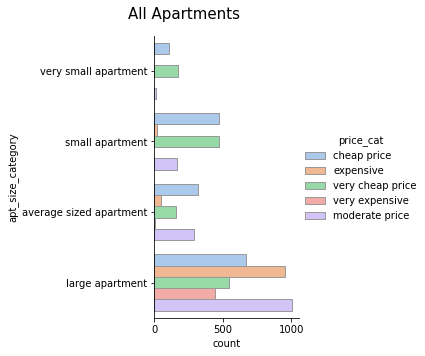

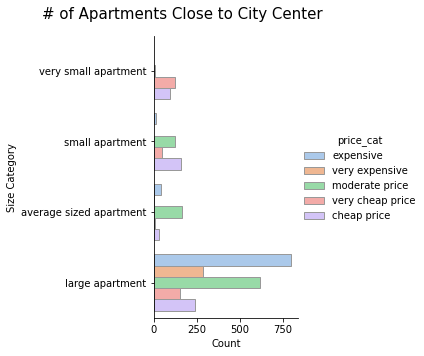

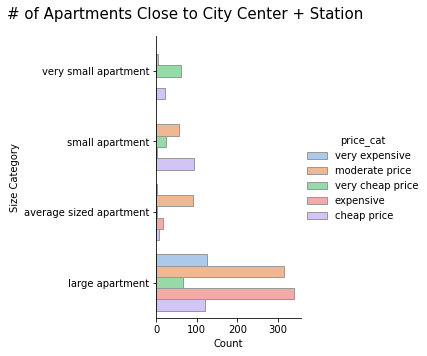

In [45]:
center_chart2 = sn.catplot(y="apt_size_category", hue="price_cat", kind="count",
            order=['very small apartment',"small apartment", 'average sized apartment', "large apartment"],
            palette="pastel", edgecolor=".6",
            data=raw_data)

center_chart2.fig.subplots_adjust(top=0.9)
center_chart2.fig.suptitle('All Apartments', fontsize = 15)

center_chart3 = sn.catplot(y="apt_size_category", hue="price_cat", kind="count",
            order=['very small apartment',"small apartment", 'average sized apartment', "large apartment"],
            palette="pastel", edgecolor=".6",
            data=close_apts)

center_chart3.fig.subplots_adjust(top=0.9)
center_chart3.fig.suptitle('# of Apartments Close to City Center', fontsize = 15)
plt.xlabel('Count',fontsize='10')
plt.ylabel('Size Category', fontsize='10')


center_chart5 = sn.catplot(y="apt_size_category", hue="price_cat", kind="count",
            order=['very small apartment',"small apartment", 'average sized apartment', "large apartment"],
            palette="pastel", edgecolor=".6",
            data=apts)

center_chart5.fig.subplots_adjust(top=0.9)
center_chart5.fig.suptitle('# of Apartments Close to City Center + Station', fontsize = 15)
plt.xlabel('Count',fontsize='10')
plt.ylabel('Size Category', fontsize='10')

None


Based on the visuals above, we can see patterns that we shoudl expect to see. One obsevation we can make based on the first chart is that the majority of apartments that are large (> 71 sqm) are either expensive or moderately expensive. Also, we can see that apartments that are categorized as very small (< 31 sq m) are either cheap or very cheap, with hardly any other price category attatched to this size. 

Moving on to the next visual, we have filtered out apartments that are not close to the city center with apartments that are <4.9km away from the city center. In this chart we can see that the majority of apartments that are close to the city center are large apartments (> 71 sq m), with the majority of these being either expensive (>395k and < 920k) or moderatley priced (> 190k and < 395k). 

Lastly, in the final chart, with the dataset we previously created that filters out apartments that are close to the city center, from there we also filtered out apartments that are far from train stations, leaving only apartments that are close or very close to train stations (< .42km). In this dataset, we can see that the majority are also large apartments, with most of them being expensive or moderately price (>395k and < 920k) or (> 190k and < 395k), respectivley. 

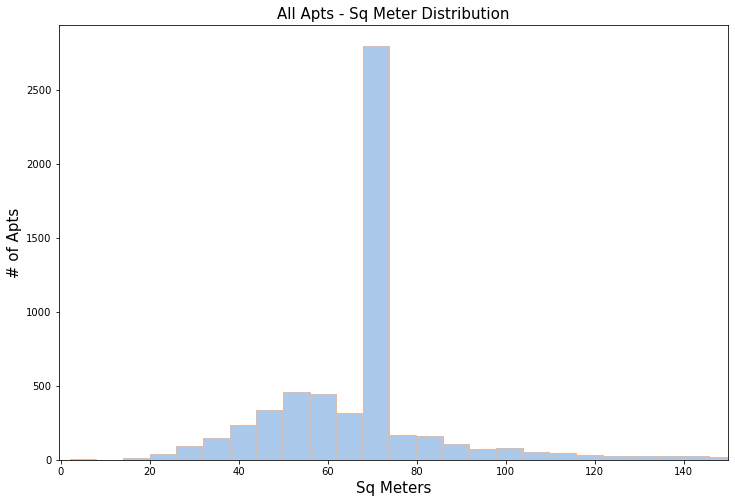

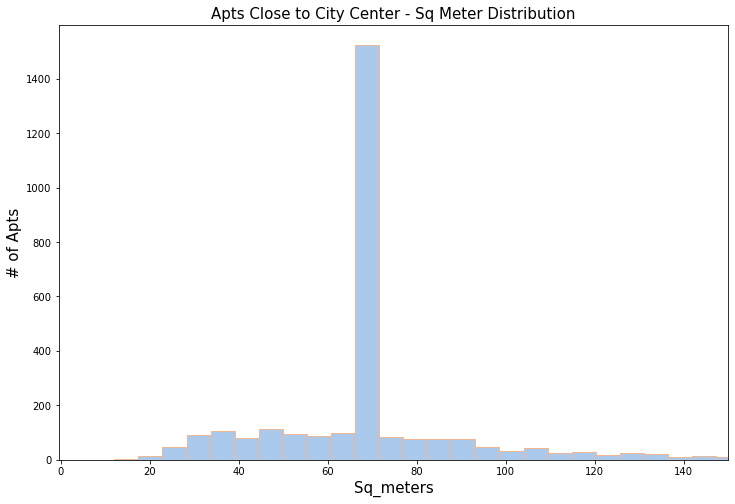

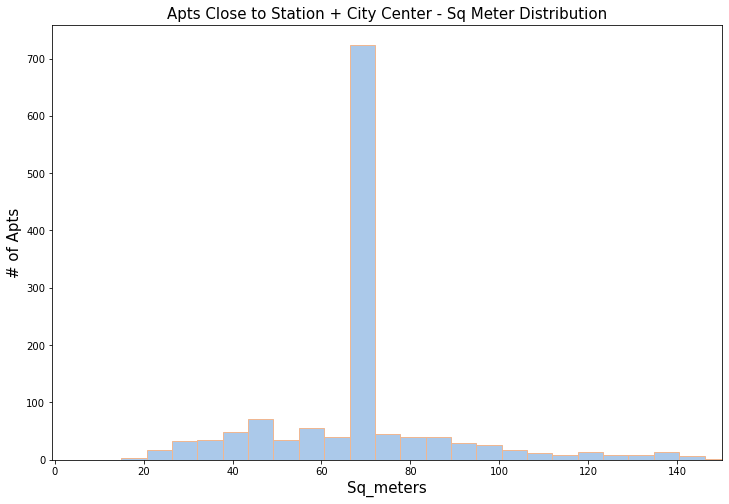

In [46]:
fig2,ax = plt.subplots(figsize=(12,8))
plt.hist(raw_data['sq_meters'],bins=150,color='#ABC9EA',edgecolor='#EFB792')

plt.xlabel('Sq Meters',fontsize='15')
plt.ylabel('# of Apts', fontsize='15')
plt.xlim((-0.5,150))
plt.title('All Apts - Sq Meter Distribution',fontsize='15')
plt.show()

fig2,ax = plt.subplots(figsize=(12,8))
plt.hist(close_apts['sq_meters'],bins=100,color='#ABC9EA',edgecolor='#EFB792')

plt.xlabel('Sq_meters',fontsize='15')
plt.ylabel('# of Apts', fontsize='15')
plt.xlim((-0.5,150))
plt.title('Apts Close to City Center - Sq Meter Distribution',fontsize='15')
plt.show()


fig2,ax = plt.subplots(figsize=(12,8))
plt.hist(apts['sq_meters'],bins=50,color='#ABC9EA',edgecolor='#EFB792')

plt.xlabel('Sq_meters',fontsize='15')
plt.ylabel('# of Apts', fontsize='15')
plt.xlim((-0.5,150))
plt.title('Apts Close to Station + City Center - Sq Meter Distribution',fontsize='15')
plt.show()

Using the same filtered datasets we used in the previous bar charts (all apartments, apartments close to the city center, and apartments close to the city center and train station), we can see that the distribution of sq m for all three datasets where the majority of apartments are around 70 sq m. 

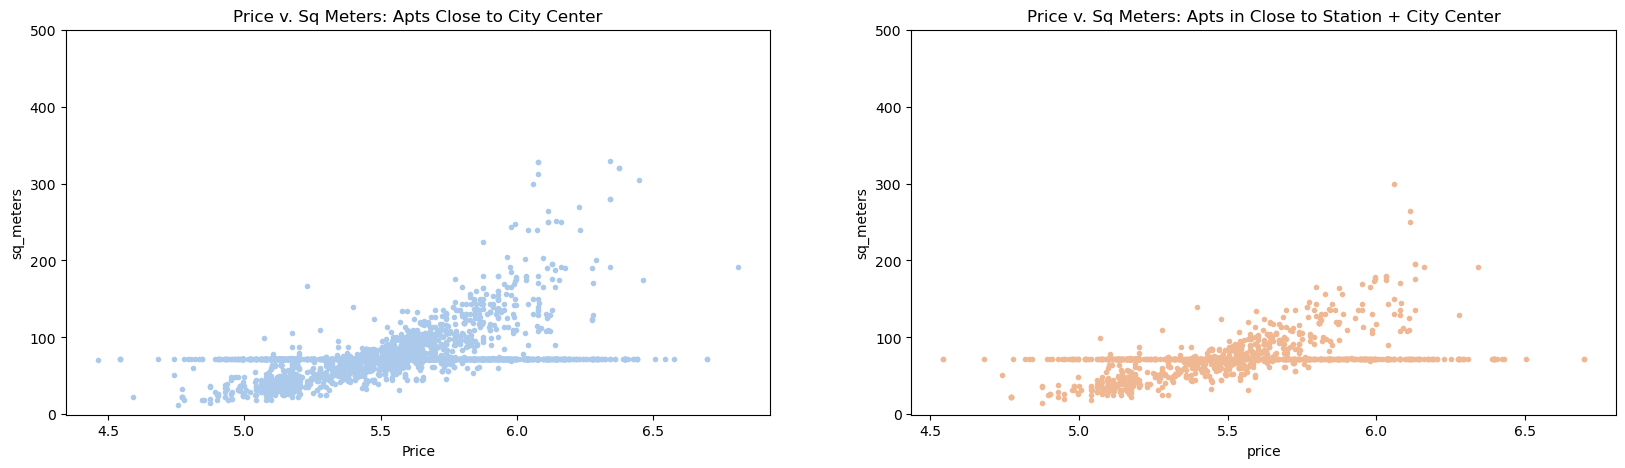

In [175]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

plt.scatter(np.log10(close_apts['price']), close_apts['sq_meters'], marker='.', c = '#ABC9EA')
plt.title('Price v. Sq Meters: Apts Close to City Center')
plt.xlabel('Price')
plt.ylim((-0.5,500))
plt.ylabel('sq_meters');


plt.subplot(1,2,2)

plt.scatter(np.log10(apts['price']), apts['sq_meters'], marker='.', c = '#EFB792')
plt.title('Price v. Sq Meters: Apts in Close to Station + City Center')
plt.xlabel('price')
plt.ylim((-0.5,500))
plt.ylabel('sq_meters');


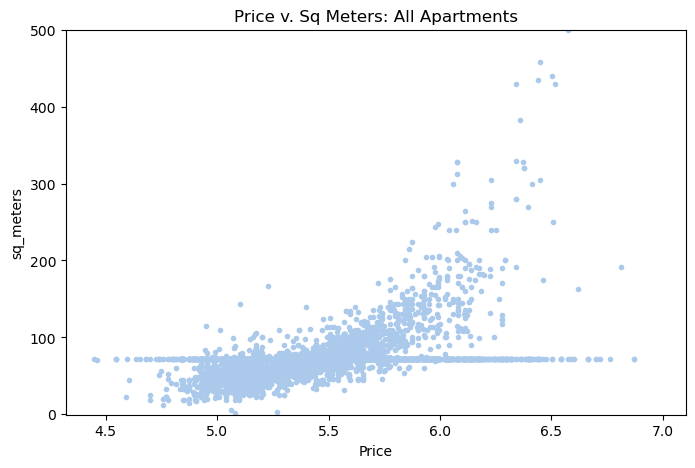

In [176]:
plt.figure(figsize=(8,5))

plt.scatter(np.log10(raw_data['price']), raw_data['sq_meters'], marker='.', c = '#ABC9EA')
plt.title('Price v. Sq Meters: All Apartments')
plt.xlabel('Price')
plt.ylim((-0.5,500))
plt.ylabel('sq_meters');



In [60]:
seed(1)

price_corr4 = close_apts['price']
sqm_corr4 = close_apts['sq_meters']

corr, _ = pearsonr(price_corr4, sqm_corr4)
print('Pearsons correlation, Close to City: %.3f' % corr)

price_corr2 = apts['price']
sqm_corr2 = apts['sq_meters']

corr, _ = pearsonr(price_corr2, sqm_corr2)
print('Pearsons correlation, Close to Station + City: %.3f' % corr)

price_corr3 = raw_data['price']
sqm_corr3 = raw_data['sq_meters']

corr, _ = pearsonr(price_corr3, sqm_corr3)
print('Pearsons correlation, All Apts: %.3f' % corr)

Pearsons correlation, Close to City: 0.446
Pearsons correlation, Close to Station + City: 0.366
Pearsons correlation, All Apts: 0.592


Using the same filtered datasets we used in the previous bar charts (all apartments, apartments close to the city center, and apartments close to the city center and train station), we can see the all apartments dataset has the strongest correlation between price and sq m. Once we start to filter by apartments close to the city, we can see that price is still correlated to sq m, but the correlation is not as strong. As we filted out even more apartments, those that are close to the city and train station have an even weaker correlation between price and sq m. 

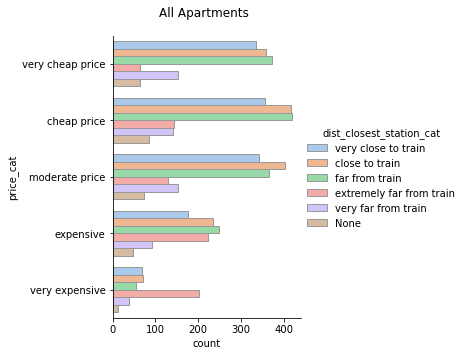

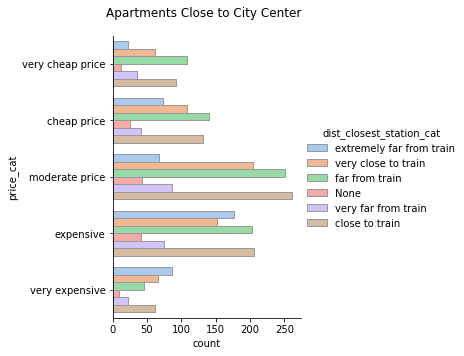

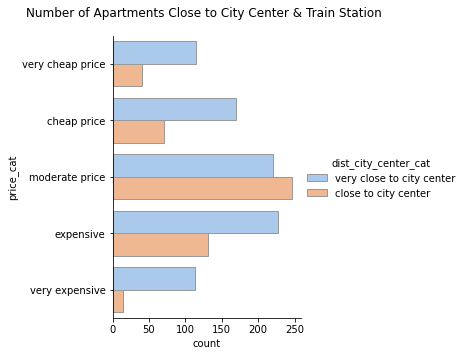

In [105]:
center_chart2 = sn.catplot(y="price_cat", hue="dist_closest_station_cat", kind="count",
            order=['very cheap price',"cheap price", "moderate price", "expensive","very expensive" ],
            palette="pastel", edgecolor=".6",
            data=raw_data)

center_chart2.fig.subplots_adjust(top=0.9)
center_chart2.fig.suptitle('All Apartments')


center_chart2 = sn.catplot(y="price_cat", hue="dist_closest_station_cat", kind="count",
            order=['very cheap price',"cheap price", "moderate price", "expensive","very expensive" ],
            palette="pastel", edgecolor=".6",
            data=close_apts)

center_chart2.fig.subplots_adjust(top=0.9)
center_chart2.fig.suptitle('Apartments Close to City Center')

center_chart2 = sn.catplot(y="price_cat", hue="dist_city_center_cat", kind="count",
            order=['very cheap price',"cheap price", "moderate price", "expensive","very expensive" ],
            palette="pastel", edgecolor=".6",
            data=apts)

center_chart2.fig.subplots_adjust(top=0.9)
center_chart2.fig.suptitle('Number of Apartments Close to City Center & Train Station')

None

Looking at the first visual which accounts for the data of all apartments, we can see that for the apartments that are very expensive (> 920k), the large majority of these apartments are extremley far from train stations (> .53km). We can also see that for apartments that are very cheap (< 135k) and cheap (between 190k and 395k), most of them are far from a train station (between .31km and .43k). 

In the second chart, we can see that the majority of apartments are moderatley priced, with the majority of them being either close to a train station (between .21m and .31) or far from a train station (between .31km and .43k).

Lastly, in the final chart, using data with apartments close to the city center and train station, we can see the most of them are also moderatley priced, with these mostly being close to a train station. We can also see that for these apartments that are expensive or very expensive, most of them very close to a train station. 

Pearsons correlation, Close to Station + City: 0.001
Pearsons correlation, All Apts: 0.363


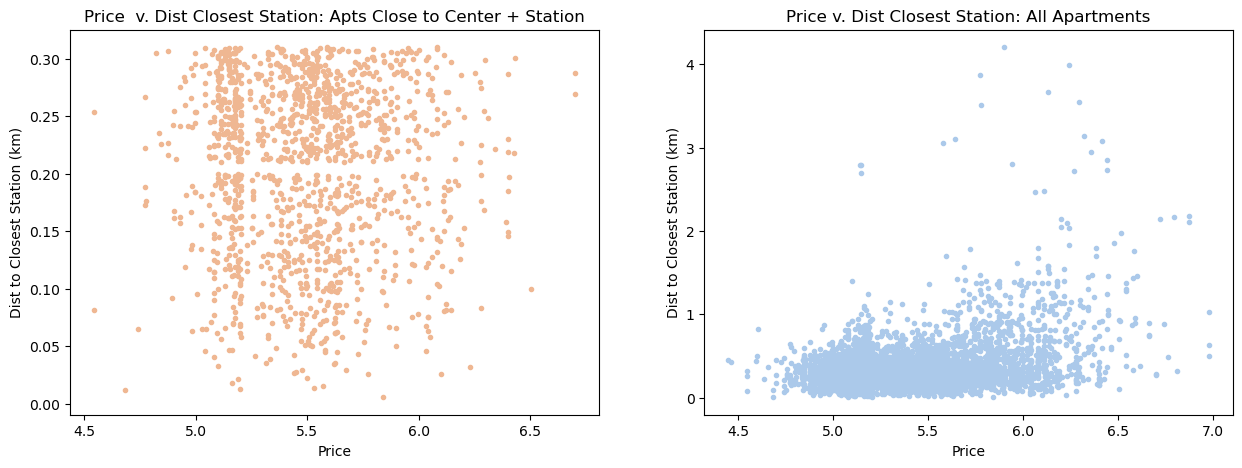

In [179]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(np.log10(apts['price']), apts['dist_closest_station'], marker='.', c = '#EFB792')
plt.title('Price  v. Dist Closest Station: Apts Close to Center + Station')
plt.xlabel('Price')
plt.ylabel('Dist to Closest Station (km)');

plt.subplot(1,2,2)
plt.scatter(np.log10(raw_data['price']), raw_data['dist_closest_station'], marker='.', c = '#ABC9EA')
plt.title('Price v. Dist Closest Station: All Apartments')
plt.xlabel('Price')

plt.ylabel('Dist to Closest Station (km)');

price_corr5 = apts['price']
sqm_corr5 = apts['dist_closest_station']

corr, _ = pearsonr(price_corr5, sqm_corr5)
print('Pearsons correlation, Close to Station + City: %.3f' % corr)

price_corr6 = raw_data['price']
sqm_corr6 = raw_data['dist_closest_station']

corr6, _ = pearsonr(price_corr6, sqm_corr6)
print('Pearsons correlation, All Apts: %.3f' % corr6)

Here we can see that with apartments close to the city center and train stations, there is almost no correlation between the size of the price and distance to the closest station. 

When we look at the scatterplot of the right, we can see there is a slight upwards tendency, and the Pearson correlation confirms that there is a slight positive correlation between price and distance to the closest station. 

Pearsons correlation, Close to Station + City: -0.024
Pearsons correlation, All Apts: 0.214


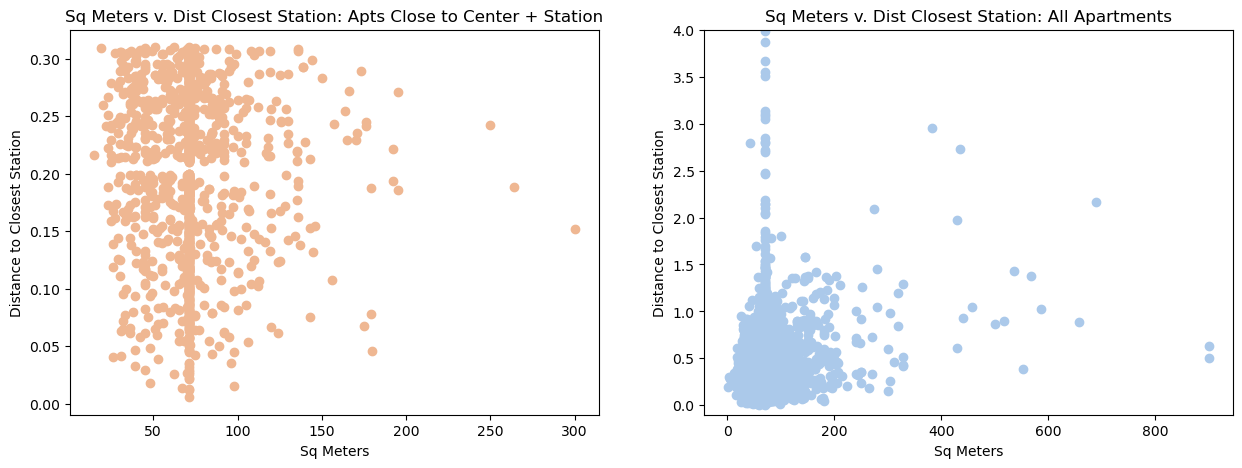

In [178]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(apts['sq_meters'], apts['dist_closest_station'], c = '#EFB792')
plt.title('Sq Meters v. Dist Closest Station: Apts Close to Center + Station')
plt.xlabel('Sq Meters')
plt.ylabel('Distance to Closest Station');

plt.subplot(1,2,2)
plt.scatter(raw_data['sq_meters'], raw_data['dist_closest_station'], c = '#ABC9EA')
plt.title('Sq Meters v. Dist Closest Station: All Apartments')
plt.xlabel('Sq Meters')
plt.ylim((-0.1,4))
plt.ylabel('Distance to Closest Station');

price_corr7 = apts['sq_meters']
sqm_corr7 = apts['dist_closest_station']
corr7, _ = pearsonr(price_corr7, sqm_corr7)
print('Pearsons correlation, Close to Station + City: %.3f' % corr7)

price_corr8 = raw_data['sq_meters']
sqm_corr8 = raw_data['dist_closest_station']
corr8, _ = pearsonr(price_corr8, sqm_corr8)
print('Pearsons correlation, All Apts: %.3f' % corr8)


In the charts above we can see that the All Apartments dataset has a small positive correlation which can be confirmed with a Pearson's correlation of 0.214. On the other hand, we can see that in the Apartments that are close to the city center and train station, there is almost no correlation at all. 

In [98]:
room_type_filtered = apts.groupby('rooms')['price_cat'].count().reset_index()
room_type_all = raw_data.groupby('rooms')['price_cat'].count().reset_index()

room_type_filtered.rename(columns={'price_cat':'n_rooms'},inplace=True)
room_type_all.rename(columns={'price_cat':'n_rooms2'},inplace=True)

new_row_all = {'rooms': '5+', 'n_rooms2': 238}
room_type_all = room_type_all.append(new_row_all, ignore_index = True)

new_row_filtered = {'rooms': '5+', 'n_rooms': 49}
room_type_filtered = room_type_filtered.append(new_row_filtered, ignore_index = True)

room_type_filtered

room_type_all = room_type_all.drop(labels=[5,6,7,8,9,10,11],axis=0)
room_type_filtered = room_type_filtered.drop(labels=[5,6,7,8,9],axis=0)



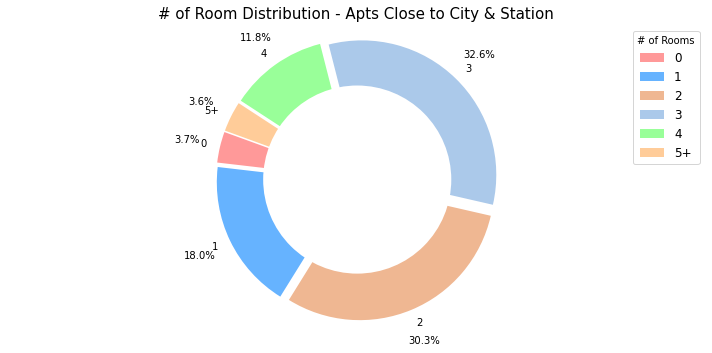

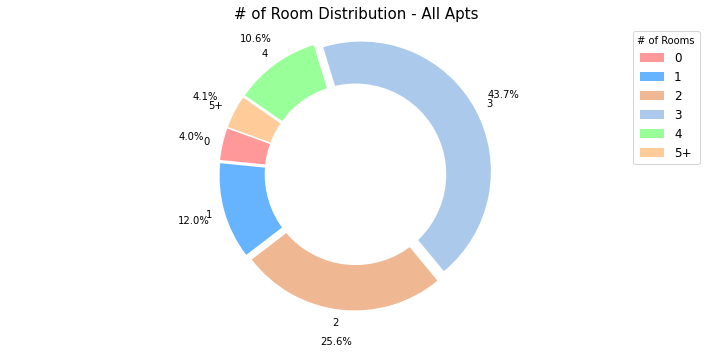

In [99]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
labels = ['0','1','2','3','4','5+']
colors=['#ff9999','#66b3ff','#EFB792', '#ABC9EA','#99ff99', '#ffcc99']

plt.figure(figsize=(10,5))

plt.pie(room_type_filtered['n_rooms'],autopct='%1.1f%%', colors = colors, explode = explode, startangle=160, pctdistance=1.25, labels = labels)
plt.axis('equal')
plt.legend(labels=room_type_filtered['rooms'],loc='best',fontsize='12', title =  "# of Rooms")
plt.title('# of Room Distribution - Apts Close to City & Station', fontsize='15')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10,5))
plt.pie(room_type_all['n_rooms2'],autopct='%1.1f%%', colors = colors, explode = explode, startangle=160, pctdistance=1.25, labels = labels)
plt.axis('equal')
plt.legend(labels=room_type_all['rooms'],loc='best',fontsize='12', title = "# of Rooms")
plt.title('# of Room Distribution - All Apts', fontsize='15')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.tight_layout()
plt.show()


For both datasets, we can see that over 60% of apartments are either one or two bedroom apartments, however, with apartments that are close to the city center and train station, there is a slighly larger proportion of apartments that are one bedroom compared to the entire population in the dataset. 

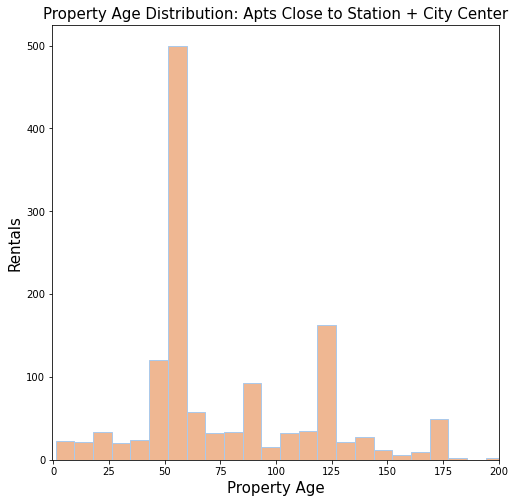

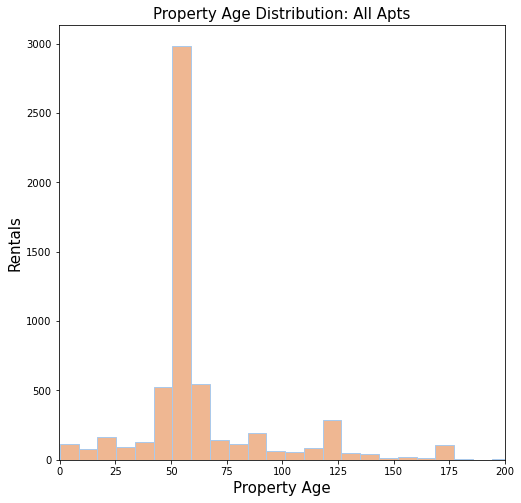

In [100]:
fig2,ax = plt.subplots(figsize=(8,8))
plt.hist(apts['property_age'],bins=30,color='#EFB792',edgecolor='#ABC9EA')

plt.xlabel('Property Age',fontsize='15')
plt.ylabel('Rentals', fontsize='15')
plt.xlim((-0.5,200))
plt.title('Property Age Distribution: Apts Close to Station + City Center',fontsize='15')
plt.show()

fig2,ax = plt.subplots(figsize=(8,8))
plt.hist(raw_data['property_age'],bins=30,color='#EFB792',edgecolor='#ABC9EA')

plt.xlabel('Property Age',fontsize='15')
plt.ylabel('Rentals', fontsize='15')
plt.xlim((-0.5,200))
plt.title('Property Age Distribution: All Apts',fontsize='15')
plt.show()

In the first histogram, we can see that there is slight peaks in apartments that are around 80 and 125 years old, suggesting that the aparements that are close to the city center tend to be older. 

Compared to All Apartments histogram, we still see the peak of 125years, but it is not as prominent as in the first histogram. In the second histogram, we can see that the large majority of these apartments are betwwn 50 and 75 years old. 

In [181]:
prices = raw_data.groupby('neighborhood').agg(np.mean).apply(lambda s: s.apply('{0:.1f}'.format))
prices_clean = prices[['price', 'sq_meters', 'rooms', 'bathrooms','year_built', 'dist_city_center', 'dist_closest_station', 'property_age']]

In [189]:
print("Averages - Least Expensive Neighborhoods")

cheapest = prices_clean.sort_values(by='price',ascending=True).head(n=8)

Averages - Least Expensive Neighborhoods


In [110]:
print("Averages - Most Expensive Neighborhoods")
prices_clean.sort_values(by='price',ascending=False).head(n=10)

Averages - Most Expensive Neighborhoods


price sq_meters rooms  \
neighborhood                                                             
Les Corts                                     945104.0      89.0   3.0   
La Dreta de l'Eixample                        914200.8      92.9   3.2   
Sarrià                                        900833.3      99.5   3.3   
Diagonal Mar i el Front Marítim del Poblenou  858671.1      91.3   3.0   
Eixample                                      820271.2      80.8   3.1   
Sant Gervasi - Galvany                        765802.9      96.8   3.3   
El Putxet i el Farró                          709750.0     107.3   3.3   
L'Antiga Esquerra de l'Eixample               602125.0      81.7   2.8   
La Vila Olímpica del Poblenou                 562400.0      93.3   2.6   
Gràcia                                        526158.0      72.1   2.7   

                                             bathrooms year_built  \
neighborhood                                                        
Les Corts                                          2.1     1973.0   
La Dreta de l'Eixample                             2.0     1943.3   
Sarrià                                             2.3     1965.0   
Diagonal Mar i el Front Marítim del Poblenou       1.8     1993.1   
Eixample                                           2.1     1950.0   
Sant Gervasi - Galvany                             2.2     1961.7   
El Putxet i el Farró                               2.2     1963.3   
L'Antiga Esquerra de l'Eixample                    1.8     1945.6   
La Vila Olímpica del Poblenou                      1.7     1990.4   
Gràcia                                             1.8     1956.9   

                                             dist_city_center  \
neighborhood                                                    
Les Corts                                                 3.5   
La Dreta de l'Eixample                                    0.9   
Sarrià                                                    4.3   
Diagonal Mar i el Front Marítim del Poblenou              4.1   
Eixample                                                  1.3   
Sant Gervasi - Galvany                                    2.5   
El Putxet i el Farró                                      3.1   
L'Antiga Esquerra de l'Eixample                           1.4   
La Vila Olímpica del Poblenou                             2.1   
Gràcia                                                    2.4   

                                             dist_closest_station property_age  
neighborhood                                                                    
Les Corts                                                     0.5         49.0  
La Dreta de l'Eixample                                        0.2         78.7  
Sarrià                                                        1.2         57.0  
Diagonal Mar i el Front Marítim del Poblenou                  0.4         28.9  
Eixample                                                      0.3         72.0  
Sant Gervasi - Galvany                                        0.8         60.3  
El Putxet i el Farró                                          0.5         58.6  
L'Antiga Esquerra de l'Eixample                               0.4         76.4  
La Vila Olímpica del Poblenou                                 0.5         31.6  
Gràcia                                                        0.4         65.1

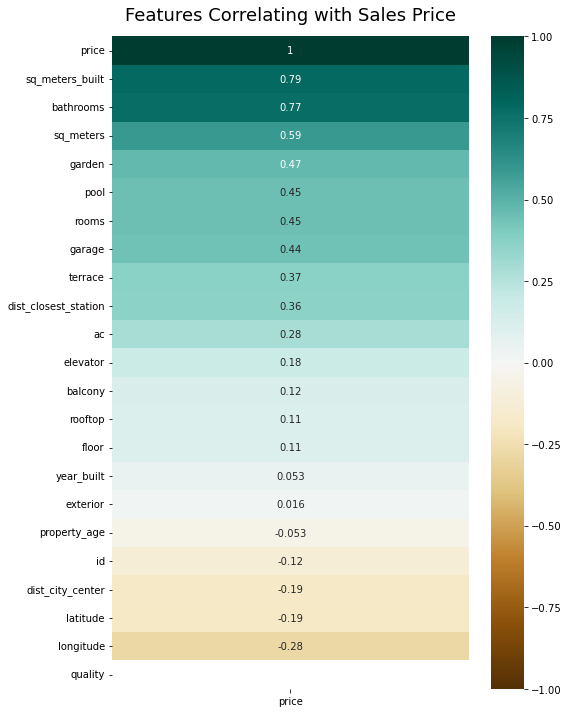

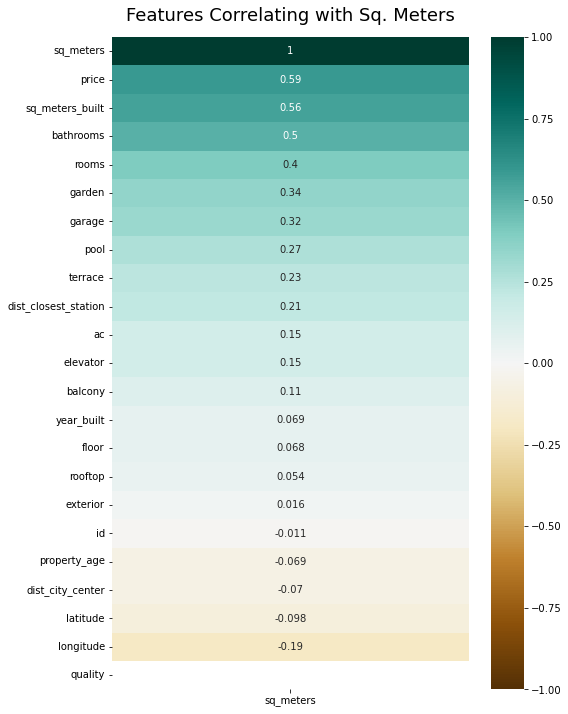

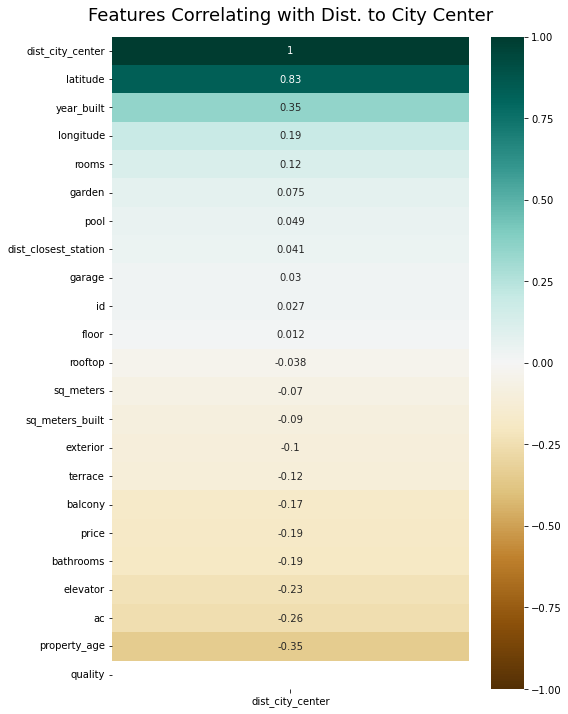

In [115]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(raw_data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(raw_data.corr()[['sq_meters']].sort_values(by='sq_meters', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sq. Meters', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(raw_data.corr()[['dist_city_center']].sort_values(by='dist_city_center', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Dist. to City Center', fontdict={'fontsize':18}, pad=16);

In the charts above, we see patterns that we would mostly expect, such as price having a strong correlation to sq m built, bathrooms, and sq meters, as seen in the first chart. Additionally, in the second chart we also see patterns that are the inverse of the ones we previosly mentioned, such as sq m having strong correlation between price and bathrooms. 

However, in the 3rd chart we also see patterns that would be less obvious to someone who is not familair with the market and landscape of the market such as the negative correlation between distance to city center and ac, elevator, bathrooms, and balcony. Suggesting that the closer the apartment is to the city center, there is a strong change that is might not have ac, an elevator, less bathrooms, no balcony, but might also be less expensive. 

In [221]:
cat_features1 = ['neighborhood', 'property_type', 'orientation', 'heating', 'dist_city_center_cat', 'dist_closest_station_cat', 'property_age_cat', 'apt_size_category']

In [222]:
# Test ANOVA
for i in range(0, len(cat_features1)):
    model_def = 'price ~ ' + cat_features1[i]
    anova_model = ols(model_def, data=raw_data).fit()
    aov_table = sm.stats.anova_lm(anova_model, typ=2)
    print(aov_table)

                    sum_sq      df         F  PR(>F)
neighborhood  5.528197e+14    74.0  40.59743     0.0
Residual      1.061767e+15  5770.0       NaN     NaN
                     sum_sq      df           F         PR(>F)
property_type  3.534078e+14     7.0  233.663633  2.418198e-307
Residual       1.261179e+15  5837.0         NaN            NaN
                   sum_sq      df         F        PR(>F)
orientation  1.235388e+13     3.0  15.47384  5.432341e-10
Residual     8.329678e+14  3130.0       NaN           NaN
                sum_sq      df          F        PR(>F)
heating   6.015755e+13     4.0  49.451199  1.747610e-40
Residual  1.018822e+15  3350.0        NaN           NaN
                            sum_sq      df          F        PR(>F)
dist_city_center_cat  4.947189e+13     5.0  36.913129  2.257059e-37
Residual              1.565115e+15  5839.0        NaN           NaN
                                sum_sq      df           F         PR(>F)
dist_closest_station_cat  1.5335

Categorical variables that are the most important relative to price: 
- property type
- apt size
- distance to closest station
- heating

In [227]:
neighborhood = raw_data[['neighborhood', 'price', 'dist_closest_station', 'dist_city_center', 'dist_closest_station_cat', 'property_type' ]].groupby('property_type', as_index=False).agg(
    # Number of instances per category
    count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    #mean distance to city center
    mean_dist_city_center = ('dist_city_center', "mean"),
    #mean distance to closest station
    mean_dist_closest_station = ('dist_closest_station', "mean")).sort_values('mean_price', ascending = False).reset_index()

neighborhood.head(15).round(2)

index         property_type  count  mean_price  median_price  min_price  \
0      3  chalet_independiente     35  2461071.43     1985000.0      89000   
1      1                chalet     41  2144448.78     1750000.0     103000   
2      2        chalet_adosado     33  1267212.12      739000.0     228000   
3      4        chalet_pareado     17   941940.59      390000.0     129990   
4      0                 atico    298   577567.62      348500.0      65000   
5      5                duplex     89   549749.99      415000.0      65000   
6      7                  piso   5111   325018.13      187000.0      28000   
7      6               estudio    221   125942.08      120000.0      43000   

   max_price  mean_dist_city_center  mean_dist_closest_station  
0    9500000                   5.23                       1.71  
1    9500000                   4.50                       0.96  
2    9500000                   4.05                       0.57  
3    3290000                   2.97                       0.60  
4    4150000                   3.38                       0.38  
5    2800000                   2.86                       0.38  
6    6500000                   3.53                       0.34  
7     540000                   2.80                       0.34

Referring to property type, the most expensive apartments are chalets, ranging from 940k up to 2.1m euros. The least expensive type of apartment is the studio, with a mean price of 125k euros. 

In [232]:
neighborhood = raw_data[['neighborhood', 'price', 'dist_closest_station', 'dist_city_center', 'dist_closest_station_cat', 'apt_size_category' ]].groupby('apt_size_category', as_index=False).agg(
    # Number of instances per category
    count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    #mean distance to city center
    mean_dist_city_center = ('dist_city_center', "mean"),
    #mean distance to closest station
    mean_dist_closest_station = ('dist_closest_station', "mean")).sort_values('mean_price', ascending = False).reset_index()

neighborhood.head(15).round(2)

index        apt_size_category  count  mean_price  median_price  min_price  \
0      1          large apartment   3618   487152.12      305000.0      28000   
1      0  average sized apartment    812   209667.22      159000.0      29000   
2      2          small apartment   1125   153997.62      139000.0      40000   
3      3     very small apartment    290   123866.20      125000.0      39000   

   max_price  mean_dist_city_center  mean_dist_closest_station  
0    9500000                   3.15                       0.39  
1     950000                   4.29                       0.32  
2     690000                   4.35                       0.31  
3     370000                   2.37                       0.34

An expected pattern here, the larger the apartment is, the more expensive the apartment is going to be, with very small apartments < 38 sq m, has an average price of 123k euros, and large apartments averaging 487k euros. 

In [243]:
neighborhood = raw_data[['neighborhood', 'price', 'dist_closest_station', 'dist_city_center', 'dist_closest_station_cat', 'apt_size_category' ]].groupby('dist_closest_station_cat', as_index=False).agg(
    # Number of instances per category
    count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    #mean distance to city center
    mean_dist_city_center = ('dist_city_center', "mean"),
    #mean distance to closest station
    mean_dist_closest_station = ('dist_closest_station', "mean")).sort_values('mean_price', ascending = False).reset_index()

neighborhood.head(15).round(2)

index  dist_closest_station_cat  count  mean_price  median_price  \
0      1  extremely far from train    799   765936.16      455000.0   
1      4       very far from train    693   342065.74      180000.0   
2      0            close to train   1616   303168.35      173500.0   
3      2            far from train   1460   293631.28      160000.0   
4      3       very close to train   1277   293091.94      159000.0   

   min_price  max_price  mean_dist_city_center  mean_dist_closest_station  
0      40000    9500000                   3.41                       0.85  
1      28000    9500000                   3.70                       0.46  
2      35000    5000000                   3.40                       0.26  
3      35000    6500000                   3.42                       0.36  
4      35000    3200000                   3.66                       0.13

An interesting pattern we can see here is that apartments that are either very close or far from train stations are the least expensive, with the most expensive apartments being extremley far away from a train station. 

In [244]:
neighborhood = raw_data[['neighborhood', 'price', 'dist_closest_station', 'dist_city_center', 'dist_closest_station_cat', 'heating' ]].groupby('heating', as_index=False).agg(
    # Number of instances per category
    count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    #mean distance to city center
    mean_dist_city_center = ('dist_city_center', "mean"),
    #mean distance to closest station
    mean_dist_closest_station = ('dist_closest_station', "mean")).sort_values('mean_price', ascending = False).reset_index()

neighborhood.head(15).round(2)

index     heating  count  mean_price  median_price  min_price  max_price  \
0      2         gas   1349   545908.73      369000.0      62000    7450000   
1      3  individual    442   463975.73      311000.0      29000    6200000   
2      1    electric    256   420328.12      229500.0      35000    9500000   
3      0       bomba    327   302563.91      230000.0      69500    1895000   
4      4          na    981   234681.12      149000.0      39500    9500000   

   mean_dist_city_center  mean_dist_closest_station  
0                   3.29                       0.42  
1                   3.01                       0.41  
2                   2.76                       0.36  
3                   2.98                       0.34  
4                   4.03                       0.32

Above we can see that apartments that are heated by gas are the most expensive, with a mean price of 545k euros.  

Summary 

gdfgsdkngdfngksd

# Bagging Model

In [118]:
cat_features = ['created_at','last_seen','currency','city','closest_station','apt_size_category','dist_city_center_cat','price_cat','dist_closest_station_cat','neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat']
rent_dataset_numeric = raw_data.drop(cat_features, axis = 1)
rent_dataset_numeric

id   price   latitude  longitude  sq_meters  sq_meters_built  \
0       320294  150000  41.459649   2.174793  63.000000               67   
1      1786997  150000  41.422081   2.155370  48.000000               52   
2      1787143  395000  41.402928   2.207851  84.000000               91   
3      1976767  540000  41.394692   2.144422  71.354415              100   
4     27972575  650000  41.398971   2.120754  71.354415              141   
...        ...     ...        ...        ...        ...              ...   
5842  95887577  146000  41.423712   2.138883  71.354415               63   
5843  95889306   79000  41.451050   2.195711  71.354415               34   
5844  95892003   84900  41.379939   2.165118  71.354415               30   
5845  95893093  150000  41.446323   2.201739  71.354415               79   
5846  95893914  150000  41.448004   2.202402  71.354415               85   

      rooms  bathrooms  balcony  terrace  exterior  floor  rooftop  elevator  \
0         3          1      0.0      1.0       1.0    5.0      0.0       0.0   
1         2          1      0.0      0.0       1.0    3.0      0.0       0.0   
2         2          2      0.0      0.0       1.0    3.0      0.0       0.0   
3         3          1      0.0      0.0       1.0    1.0      0.0       1.0   
4         3          2      0.0      0.0       1.0    1.0      0.0       1.0   
...     ...        ...      ...      ...       ...    ...      ...       ...   
5842      2          1      0.0      0.0       0.0    3.0      0.0       1.0   
5843      1          1      0.0      1.0       0.0    3.0      0.0       0.0   
5844      0          1      0.0      0.0       0.0    3.0      0.0       0.0   
5845      3          1      0.0      0.0       1.0    5.0      0.0       1.0   
5846      3          1      1.0      0.0       1.0    2.0      0.0       1.0   

      pool   ac  year_built  quality  dist_city_center  garage  garden  \
0      0.0  1.0      1965.0        2          7.990993     0.0     0.0   
1      0.0  1.0      1965.0        2          3.991000     0.0     0.0   
2      0.0  1.0      1965.0        2          3.579261     0.0     0.0   
3      0.0  1.0      1965.0        2          2.257852     1.0     0.0   
4      0.0  1.0      1965.0        2          4.283368     1.0     0.0   
...    ...  ...         ...      ...               ...     ...     ...   
5842   0.0  1.0      1962.0        2          4.750976     0.0     0.0   
5843   0.0  0.0      1965.0        2          7.346138     0.0     0.0   
5844   0.0  1.0      1965.0        2          0.971988     0.0     0.0   
5845   0.0  0.0      1965.0        2          7.019433     0.0     0.0   
5846   0.0  0.0      1965.0        2          7.213495     0.0     0.0   

      dist_closest_station  property_age  
0                 0.121438          57.0  
1                 0.277336          57.0  
2                 0.383878          57.0  
3                 0.875652          57.0  
4                 1.310073          57.0  
...                    ...           ...  
5842              0.341163          60.0  
5843              0.280344          57.0  
5844              0.157078          57.0  
5845              0.440968          57.0  
5846              0.319661          57.0  

[5845 rows x 23 columns]

In [119]:
rent_dataset_numeric_no_nulls = rent_dataset_numeric.drop(['year_built', 'property_age', 'floor'], axis = 1)
rent_dataset_numeric_no_nulls.isnull().sum() / len(rent_dataset_numeric_no_nulls)

id                      0.0
price                   0.0
latitude                0.0
longitude               0.0
sq_meters               0.0
sq_meters_built         0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
quality                 0.0
dist_city_center        0.0
garage                  0.0
garden                  0.0
dist_closest_station    0.0
dtype: float64

In [120]:
X = rent_dataset_numeric_no_nulls.drop(['price'], axis = 1)
y = rent_dataset_numeric_no_nulls[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [121]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9,10,11,12], "min_samples_split":[2,5]}]

#instantiate the classifier
decision_tree_model = DecisionTreeClassifier()

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 9, 10, 11, 12],
                          'min_samples_split': [2, 5]}],
             scoring='r2')

In [122]:
grid_bag.best_params_

{'max_depth': 12, 'min_samples_split': 5}

In [123]:
# we enumerate the values to try
parameters = {"n_estimators":[1,5,10,20,50,100]}

#instantiate the classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2)

#instantiate the classifier
bagging_model = BaggingClassifier(decision_tree_model)

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=bagging_model, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 100}

In [124]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 6, min_samples_split = 2), n_estimators = 100)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [125]:
for i, score in enumerate(model["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.5806544600867031
Accuracy for the fold no. 1 on the test set: 0.6874184542645314
Accuracy for the fold no. 2 on the test set: 0.5787802310052119
Accuracy for the fold no. 3 on the test set: 0.5034688252533612
Accuracy for the fold no. 4 on the test set: 0.665526139238887
Accuracy for the fold no. 5 on the test set: 0.4625283595795262
Accuracy for the fold no. 6 on the test set: 0.6957299355436032
Accuracy for the fold no. 7 on the test set: 0.6470302586517265
Accuracy for the fold no. 8 on the test set: 0.7712505783635395
Accuracy for the fold no. 9 on the test set: 0.6170231510198316


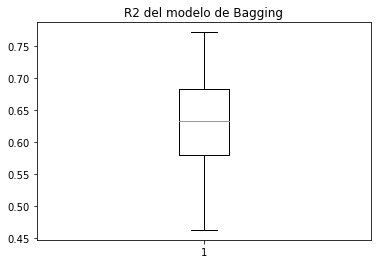

In [126]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Bagging')
ax1.boxplot(model["test_score"])

None

In [127]:
bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 6, min_samples_split = 2), n_estimators = 100)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=100)

In [128]:
y_pred = bag.predict(X_train)
#error rate
metrics.r2_score(y_train, y_pred)

0.7735186021548076

In [129]:
y_pred = bag.predict(X_test)
#error rate
metrics.r2_score(y_test, y_pred)

0.8022054050569953

# Random Forest Model 


In [130]:
# Definimos 2 diccionarios vacíos
cv = {}
results = pd.DataFrame(columns=['model','median_r2_cv_training','r2_validation'])
# Almacenamos los resultados para el modelo decision_tree_bagging
cv['decision_tree_bagging'] = model["test_score"]
cv

{'decision_tree_bagging': array([0.58065446, 0.68741845, 0.57878023, 0.50346883, 0.66552614,
        0.46252836, 0.69572994, 0.64703026, 0.77125058, 0.61702315])}

In [131]:
results = pd.DataFrame(columns=['model','median_r2_cv_training','r2_validation'])
model_results = ['decision_tree_bagging', np.median(model["test_score"]), metrics.r2_score(y_test, y_pred)]
results = results.append(dict(zip(results.columns,model_results)), ignore_index=True)
results

model  median_r2_cv_training  r2_validation
0  decision_tree_bagging               0.632027       0.802205

In [132]:
# we enumerate the values to try
parameters = [{"n_estimators":[100,150,200], "max_depth": [5,10,15]}]

#instantiate the classifier
rf_cv = RandomForestClassifier()

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=rf_cv, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [133]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
rf = RandomForestClassifier(n_estimators = 100, max_depth=15)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(rf, X_train, y_train, cv = 10, scoring = "r2")
for i, score in enumerate(model["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.7064032535845997
Accuracy for the fold no. 1 on the test set: 0.7354233831892598
Accuracy for the fold no. 2 on the test set: 0.8818239193749555
Accuracy for the fold no. 3 on the test set: 0.6345649568950202
Accuracy for the fold no. 4 on the test set: 0.7299504892764744
Accuracy for the fold no. 5 on the test set: 0.7221638693333785
Accuracy for the fold no. 6 on the test set: 0.7923803558786813
Accuracy for the fold no. 7 on the test set: 0.5840416542259017
Accuracy for the fold no. 8 on the test set: 0.8212039039678571
Accuracy for the fold no. 9 on the test set: 0.6859038639198802


In [134]:
np.median(model["test_score"])

0.7260571793049264

In [135]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
#error rate
metrics.r2_score(y_train, y_pred)

0.9997163067273631

In [136]:
y_pred = rf.predict(X_test)
#error rate
metrics.r2_score(y_test, y_pred)

0.8700680257242803

In [137]:
# Almacenamos los resultados para el modelo rf_1
cv['rf_1'] = model["test_score"]

model_results = ['rf_1', np.median(model["test_score"]), metrics.r2_score(y_test, y_pred)]
results = results.append(dict(zip(results.columns,model_results)), ignore_index=True)
results

model  median_r2_cv_training  r2_validation
0  decision_tree_bagging               0.632027       0.802205
1                   rf_1               0.726057       0.870068

# CatBoost 


In [138]:
rent_dataset = raw_data[['price', 'sq_meters_built', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating', 'year_built', 'neighborhood', 'dist_city_center', 'property_type', 'dist_closest_station']]
rent_dataset.head()

price  sq_meters_built  rooms  bathrooms  balcony  terrace  exterior  \
0  150000               67      3          1      0.0      1.0       1.0   
1  150000               52      2          1      0.0      0.0       1.0   
2  395000               91      2          2      0.0      0.0       1.0   
3  540000              100      3          1      0.0      0.0       1.0   
4  650000              141      3          2      0.0      0.0       1.0   

  orientation  floor  rooftop  elevator  pool   ac     heating  year_built  \
0        este    5.0      0.0       0.0   0.0  1.0         NaN      1965.0   
1         NaN    3.0      0.0       0.0   0.0  1.0  individual      1965.0   
2         NaN    3.0      0.0       0.0   0.0  1.0    electric      1965.0   
3         sur    1.0      0.0       1.0   0.0  1.0         NaN      1965.0   
4        este    1.0      0.0       1.0   0.0  1.0         NaN      1965.0   

                               neighborhood  dist_city_center property_type  \
0  Ciutat Meridiana - Torre Baró - Vallbona          7.990993          piso   
1                                 El Carmel          3.991000          piso   
2                               El Poblenou          3.579261        duplex   
3                    Sant Gervasi - Galvany          2.257852          piso   
4                                    Sarrià          4.283368          piso   

   dist_closest_station  
0              0.121438  
1              0.277336  
2              0.383878  
3              0.875652  
4              1.310073

In [139]:
catboost_dataset = rent_dataset
catboost_dataset.head()

price  sq_meters_built  rooms  bathrooms  balcony  terrace  exterior  \
0  150000               67      3          1      0.0      1.0       1.0   
1  150000               52      2          1      0.0      0.0       1.0   
2  395000               91      2          2      0.0      0.0       1.0   
3  540000              100      3          1      0.0      0.0       1.0   
4  650000              141      3          2      0.0      0.0       1.0   

  orientation  floor  rooftop  elevator  pool   ac     heating  year_built  \
0        este    5.0      0.0       0.0   0.0  1.0         NaN      1965.0   
1         NaN    3.0      0.0       0.0   0.0  1.0  individual      1965.0   
2         NaN    3.0      0.0       0.0   0.0  1.0    electric      1965.0   
3         sur    1.0      0.0       1.0   0.0  1.0         NaN      1965.0   
4        este    1.0      0.0       1.0   0.0  1.0         NaN      1965.0   

                               neighborhood  dist_city_center property_type  \
0  Ciutat Meridiana - Torre Baró - Vallbona          7.990993          piso   
1                                 El Carmel          3.991000          piso   
2                               El Poblenou          3.579261        duplex   
3                    Sant Gervasi - Galvany          2.257852          piso   
4                                    Sarrià          4.283368          piso   

   dist_closest_station  
0              0.121438  
1              0.277336  
2              0.383878  
3              0.875652  
4              1.310073

In [155]:
cat_features = ['property_type', 'orientation', 'heating']

In [156]:
for i in range(0,len(cat_features)):
    catboost_dataset[cat_features[i]].fillna("Unknown", inplace = True) 
catboost_dataset.head()

price  sq_meters_built  rooms  bathrooms  balcony  terrace  exterior  \
0  150000               67      3          1      0.0      1.0       1.0   
1  150000               52      2          1      0.0      0.0       1.0   
2  395000               91      2          2      0.0      0.0       1.0   
3  540000              100      3          1      0.0      0.0       1.0   
4  650000              141      3          2      0.0      0.0       1.0   

  orientation  rooftop  elevator  pool   ac     heating  year_built  \
0        este      0.0       0.0   0.0  1.0     Unknown      1965.0   
1     Unknown      0.0       0.0   0.0  1.0  individual      1965.0   
2     Unknown      0.0       0.0   0.0  1.0    electric      1965.0   
3         sur      0.0       1.0   0.0  1.0     Unknown      1965.0   
4        este      0.0       1.0   0.0  1.0     Unknown      1965.0   

   dist_city_center property_type  dist_closest_station  
0          7.990993          piso              0.121438  
1          3.991000          piso              0.277336  
2          3.579261        duplex              0.383878  
3          2.257852          piso              0.875652  
4          4.283368          piso              1.310073

In [157]:
catboost_dataset.isnull().sum() / len(catboost_dataset)

price                   0.0
sq_meters_built         0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
orientation             0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
heating                 0.0
year_built              0.0
dist_city_center        0.0
property_type           0.0
dist_closest_station    0.0
dtype: float64

In [158]:
floor = raw_data[['floor', 'price']].groupby('floor', as_index=False).agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    # Standard deviation
    stantard_deviation=('price', "std")).sort_values('floor', ascending = True).reset_index()

floor.round()

index  floor  category_count  mean_price  median_price  min_price  \
0       0    1.0             979    314947.0      199000.0      57000   
1       1    2.0             766    324861.0      199500.0      69900   
2       2    3.0            2781    359552.0      155000.0      28000   
3       3    4.0             528    419009.0      190500.0      35000   
4       4    5.0             303    465210.0      250000.0      75000   
5       5    6.0             195    397485.0      330000.0      83000   
6       6    7.0             106    417769.0      318000.0      75000   
7       7    8.0              71    413789.0      315000.0      90000   
8       8    9.0              32    491872.0      259000.0     132000   
9       9   10.0              29    640638.0      385000.0     158000   
10     10   11.0              30    372233.0      159000.0     159000   
11     11   12.0               2   1285000.0     1285000.0     820000   
12     12   13.0               3    361667.0      370000.0     345000   
13     13   14.0               6   1165833.0      967500.0     630000   
14     14   15.0               5    335400.0      435000.0     142000   
15     15   17.0               2    320000.0      320000.0     205000   
16     16   19.0               2   1295000.0     1295000.0    1295000   
17     17   20.0               1    875000.0      875000.0     875000   
18     18   21.0               1   2500000.0     2500000.0    2500000   
19     19   23.0               1   1850000.0     1850000.0    1850000   
20     20   25.0               2   2605000.0     2605000.0    1060000   

    max_price  stantard_deviation  
0     4000000            326978.0  
1     2200000            308699.0  
2     9500000            560782.0  
3     7450000            664858.0  
4     9500000            850517.0  
5     2800000            350474.0  
6     2800000            366503.0  
7     1690000            293682.0  
8     2475000            534226.0  
9     2800000            626112.0  
10    1500000            396539.0  
11    1750000            657609.0  
12     370000             14434.0  
13    1900000            588391.0  
14     435000            139887.0  
15     435000            162635.0  
16    1295000                 0.0  
17     875000                 NaN  
18    2500000                 NaN  
19    1850000                 NaN  
20    4150000           2184960.0

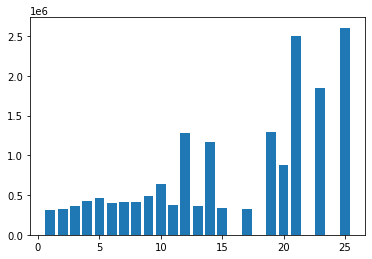

In [144]:
plt.bar(x = 'floor', height = 'mean_price', data = floor)
plt.rcParams["figure.figsize"] = (10,20)

In [151]:
#catboost_dataset = catboost_dataset.drop(['floor'], axis = 1)
#catboost_dataset = catboost_dataset.drop(['currency'], axis = 1)
#catboost_dataset = catboost_dataset.drop(['city'], axis = 1)
#catboost_dataset = catboost_dataset.drop(['neighborhood'], axis = 1)
catboost_dataset.head()

price  sq_meters_built  rooms  bathrooms  balcony  terrace  exterior  \
0  150000               67      3          1      0.0      1.0       1.0   
1  150000               52      2          1      0.0      0.0       1.0   
2  395000               91      2          2      0.0      0.0       1.0   
3  540000              100      3          1      0.0      0.0       1.0   
4  650000              141      3          2      0.0      0.0       1.0   

  orientation  rooftop  elevator  pool   ac     heating  year_built  \
0        este      0.0       0.0   0.0  1.0     Unknown      1965.0   
1     Unknown      0.0       0.0   0.0  1.0  individual      1965.0   
2     Unknown      0.0       0.0   0.0  1.0    electric      1965.0   
3         sur      0.0       1.0   0.0  1.0     Unknown      1965.0   
4        este      0.0       1.0   0.0  1.0     Unknown      1965.0   

   dist_city_center property_type  dist_closest_station  
0          7.990993          piso              0.121438  
1          3.991000          piso              0.277336  
2          3.579261        duplex              0.383878  
3          2.257852          piso              0.875652  
4          4.283368          piso              1.310073

In [152]:
catboost_dataset.isnull().sum() / len(catboost_dataset)

price                   0.0
sq_meters_built         0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
orientation             0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
heating                 0.0
year_built              0.0
dist_city_center        0.0
property_type           0.0
dist_closest_station    0.0
dtype: float64

In [147]:
import catboost as cat

In [153]:
# Target and variable
X = catboost_dataset.drop(['price'], axis = 1)
y = catboost_dataset[['price']]
# Split in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# create a train/test split with catboost

In [159]:
d_train_cat = cat.Pool(X_train, y_train, cat_features = cat_features)
d_test_cat = cat.Pool(X_test, y_test, cat_features = cat_features)

In [160]:
model = cat.CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.015],
        'depth': [6, 8, 10, 12]}

grid_search_result = model.grid_search(grid,
                                       d_train_cat,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 581171.8047495	test: 679403.9862274	best: 679403.9862274 (0)	total: 71.1ms	remaining: 1m 10s
1:	learn: 568628.3449836	test: 667742.6860949	best: 667742.6860949 (1)	total: 81.2ms	remaining: 40.5s
2:	learn: 555833.0604926	test: 656748.9081478	best: 656748.9081478 (2)	total: 89.3ms	remaining: 29.7s
3:	learn: 543680.9692519	test: 645703.2007670	best: 645703.2007670 (3)	total: 96.9ms	remaining: 24.1s
4:	learn: 532239.3323006	test: 634827.1872029	best: 634827.1872029 (4)	total: 104ms	remaining: 20.7s
5:	learn: 520256.2004839	test: 623268.0587603	best: 623268.0587603 (5)	total: 107ms	remaining: 17.8s
6:	learn: 509503.7639812	test: 613742.5808290	best: 613742.5808290 (6)	total: 112ms	remaining: 15.8s
7:	learn: 498602.4966027	test: 603276.1668296	best: 603276.1668296 (7)	total: 115ms	remaining: 14.3s
8:	learn: 488266.0508464	test: 594201.1066655	best: 594201.1066655 (8)	total: 119ms	remaining: 13.1s
9:	learn: 478298.0154075	test: 585243.7517598	best: 585243.7517598 (9)	total: 123ms	re

125:	learn: 165359.7657021	test: 333324.2368455	best: 333324.2368455 (125)	total: 668ms	remaining: 4.63s
126:	learn: 165065.6567524	test: 333048.1088017	best: 333048.1088017 (126)	total: 671ms	remaining: 4.61s
127:	learn: 164476.0041644	test: 332613.1359420	best: 332613.1359420 (127)	total: 677ms	remaining: 4.61s
128:	learn: 164306.6913496	test: 332452.9750811	best: 332452.9750811 (128)	total: 681ms	remaining: 4.6s
129:	learn: 164199.1288979	test: 332434.2206602	best: 332434.2206602 (129)	total: 684ms	remaining: 4.58s
130:	learn: 163908.7014051	test: 332078.7613473	best: 332078.7613473 (130)	total: 689ms	remaining: 4.57s
131:	learn: 163428.0679256	test: 331822.6160255	best: 331822.6160255 (131)	total: 696ms	remaining: 4.58s
132:	learn: 163326.3875004	test: 331805.9228304	best: 331805.9228304 (132)	total: 698ms	remaining: 4.55s
133:	learn: 162939.5339645	test: 331605.5467320	best: 331605.5467320 (133)	total: 701ms	remaining: 4.53s
134:	learn: 162841.5462966	test: 331590.0497359	best: 33

229:	learn: 146685.1929600	test: 323038.3920001	best: 323038.3920001 (229)	total: 1.27s	remaining: 4.24s
230:	learn: 146521.3996862	test: 322996.4196716	best: 322996.4196716 (230)	total: 1.28s	remaining: 4.25s
231:	learn: 146498.9061281	test: 322995.4021740	best: 322995.4021740 (231)	total: 1.28s	remaining: 4.23s
232:	learn: 146476.7506538	test: 322994.4167654	best: 322994.4167654 (232)	total: 1.28s	remaining: 4.22s
233:	learn: 146454.9279978	test: 322993.4623902	best: 322993.4623902 (233)	total: 1.28s	remaining: 4.21s
234:	learn: 146372.0885998	test: 322969.2270720	best: 322969.2270720 (234)	total: 1.29s	remaining: 4.21s
235:	learn: 146342.2393753	test: 322968.2529758	best: 322968.2529758 (235)	total: 1.3s	remaining: 4.21s
236:	learn: 146154.2066916	test: 322873.2572337	best: 322873.2572337 (236)	total: 1.3s	remaining: 4.2s
237:	learn: 146023.7401834	test: 322848.8744652	best: 322848.8744652 (237)	total: 1.31s	remaining: 4.2s
238:	learn: 145853.5368255	test: 322762.7268525	best: 32276

325:	learn: 135101.0762842	test: 319779.6309203	best: 319664.0141224 (315)	total: 2.07s	remaining: 4.28s
326:	learn: 135071.9737159	test: 319794.1561546	best: 319664.0141224 (315)	total: 2.08s	remaining: 4.28s
327:	learn: 134807.5362520	test: 319744.6044291	best: 319664.0141224 (315)	total: 2.09s	remaining: 4.28s
328:	learn: 134747.2551750	test: 319837.7500968	best: 319664.0141224 (315)	total: 2.1s	remaining: 4.28s
329:	learn: 134532.8676001	test: 319774.7010492	best: 319664.0141224 (315)	total: 2.11s	remaining: 4.28s
330:	learn: 134506.6848587	test: 319875.8579041	best: 319664.0141224 (315)	total: 2.11s	remaining: 4.27s
331:	learn: 134282.2726215	test: 319869.4579770	best: 319664.0141224 (315)	total: 2.12s	remaining: 4.27s
332:	learn: 134261.4978193	test: 319964.5629044	best: 319664.0141224 (315)	total: 2.13s	remaining: 4.26s
333:	learn: 133980.4810054	test: 319987.8727641	best: 319664.0141224 (315)	total: 2.14s	remaining: 4.26s
334:	learn: 133676.3123589	test: 319905.4601425	best: 31

423:	learn: 123754.6896604	test: 320854.4284291	best: 319664.0141224 (315)	total: 2.87s	remaining: 3.9s
424:	learn: 123563.1322989	test: 320866.9791396	best: 319664.0141224 (315)	total: 2.88s	remaining: 3.9s
425:	learn: 123407.0029950	test: 320782.1498164	best: 319664.0141224 (315)	total: 2.89s	remaining: 3.89s
426:	learn: 123264.8129577	test: 320805.0359141	best: 319664.0141224 (315)	total: 2.9s	remaining: 3.89s
427:	learn: 123125.6268438	test: 320698.2600874	best: 319664.0141224 (315)	total: 2.91s	remaining: 3.88s
428:	learn: 122983.9635410	test: 320665.6981651	best: 319664.0141224 (315)	total: 2.92s	remaining: 3.88s
429:	learn: 122882.2075178	test: 320641.3246865	best: 319664.0141224 (315)	total: 2.93s	remaining: 3.88s
430:	learn: 122749.9952172	test: 320537.6267817	best: 319664.0141224 (315)	total: 2.94s	remaining: 3.88s
431:	learn: 122588.2087441	test: 320408.4285155	best: 319664.0141224 (315)	total: 2.94s	remaining: 3.87s
432:	learn: 122372.7959411	test: 320339.8426843	best: 3196

522:	learn: 113215.9393391	test: 320215.0828751	best: 319664.0141224 (315)	total: 3.68s	remaining: 3.35s
523:	learn: 113161.1297470	test: 320209.6015955	best: 319664.0141224 (315)	total: 3.69s	remaining: 3.36s
524:	learn: 113129.2662661	test: 320288.8195467	best: 319664.0141224 (315)	total: 3.71s	remaining: 3.35s
525:	learn: 113103.7284794	test: 320246.2706695	best: 319664.0141224 (315)	total: 3.72s	remaining: 3.35s
526:	learn: 113094.7898972	test: 320307.2536853	best: 319664.0141224 (315)	total: 3.73s	remaining: 3.35s
527:	learn: 113043.6264695	test: 320311.6269539	best: 319664.0141224 (315)	total: 3.74s	remaining: 3.34s
528:	learn: 112892.4206623	test: 320330.1324929	best: 319664.0141224 (315)	total: 3.75s	remaining: 3.34s
529:	learn: 112867.7909106	test: 320289.0523256	best: 319664.0141224 (315)	total: 3.76s	remaining: 3.33s
530:	learn: 112843.7631145	test: 320248.3945539	best: 319664.0141224 (315)	total: 3.76s	remaining: 3.32s
531:	learn: 112687.5083352	test: 320306.0023392	best: 3

604:	learn: 108069.4840516	test: 320634.3946741	best: 319664.0141224 (315)	total: 4.48s	remaining: 2.93s
605:	learn: 107976.9202734	test: 320666.8842752	best: 319664.0141224 (315)	total: 4.49s	remaining: 2.92s
606:	learn: 107818.1390795	test: 320653.1124378	best: 319664.0141224 (315)	total: 4.5s	remaining: 2.92s
607:	learn: 107660.1617391	test: 320602.5414743	best: 319664.0141224 (315)	total: 4.51s	remaining: 2.91s
608:	learn: 107558.0778331	test: 320595.3497285	best: 319664.0141224 (315)	total: 4.52s	remaining: 2.9s
609:	learn: 107462.8755003	test: 320599.2996621	best: 319664.0141224 (315)	total: 4.53s	remaining: 2.9s
610:	learn: 107287.2027633	test: 320652.3024099	best: 319664.0141224 (315)	total: 4.54s	remaining: 2.89s
611:	learn: 107191.9944331	test: 320612.9340843	best: 319664.0141224 (315)	total: 4.54s	remaining: 2.88s
612:	learn: 107077.0745858	test: 320614.7178850	best: 319664.0141224 (315)	total: 4.55s	remaining: 2.88s
613:	learn: 107070.6227021	test: 320657.1876548	best: 3196

696:	learn: 101216.0993461	test: 320781.5411140	best: 319664.0141224 (315)	total: 5.29s	remaining: 2.3s
697:	learn: 101171.3172167	test: 320782.9327203	best: 319664.0141224 (315)	total: 5.3s	remaining: 2.29s
698:	learn: 101058.9283811	test: 320796.5650799	best: 319664.0141224 (315)	total: 5.31s	remaining: 2.29s
699:	learn: 100990.3695250	test: 320845.0766782	best: 319664.0141224 (315)	total: 5.32s	remaining: 2.28s
700:	learn: 100931.6171204	test: 320832.8461793	best: 319664.0141224 (315)	total: 5.33s	remaining: 2.27s
701:	learn: 100819.7448256	test: 320724.6958345	best: 319664.0141224 (315)	total: 5.34s	remaining: 2.27s
702:	learn: 100649.5161405	test: 320732.7281107	best: 319664.0141224 (315)	total: 5.35s	remaining: 2.26s
703:	learn: 100606.3957432	test: 320750.3142403	best: 319664.0141224 (315)	total: 5.36s	remaining: 2.25s
704:	learn: 100571.6600955	test: 320744.1878910	best: 319664.0141224 (315)	total: 5.37s	remaining: 2.25s
705:	learn: 100497.7079919	test: 320804.8643413	best: 319

796:	learn: 94414.1216724	test: 320873.4626076	best: 319664.0141224 (315)	total: 6.09s	remaining: 1.55s
797:	learn: 94360.3936091	test: 320899.5329637	best: 319664.0141224 (315)	total: 6.1s	remaining: 1.54s
798:	learn: 94326.2849263	test: 320887.8312168	best: 319664.0141224 (315)	total: 6.11s	remaining: 1.54s
799:	learn: 94272.3862226	test: 320854.1283333	best: 319664.0141224 (315)	total: 6.13s	remaining: 1.53s
800:	learn: 94232.5339082	test: 320856.7620957	best: 319664.0141224 (315)	total: 6.14s	remaining: 1.52s
801:	learn: 94199.8855437	test: 320848.7255650	best: 319664.0141224 (315)	total: 6.14s	remaining: 1.52s
802:	learn: 94164.4369355	test: 320876.3755991	best: 319664.0141224 (315)	total: 6.15s	remaining: 1.51s
803:	learn: 94116.5370333	test: 320918.8079817	best: 319664.0141224 (315)	total: 6.16s	remaining: 1.5s
804:	learn: 94078.9213012	test: 320927.2503890	best: 319664.0141224 (315)	total: 6.17s	remaining: 1.49s
805:	learn: 94062.1076562	test: 320904.4978656	best: 319664.014122

896:	learn: 89255.0007177	test: 321453.5946819	best: 319664.0141224 (315)	total: 6.89s	remaining: 791ms
897:	learn: 89193.1869816	test: 321456.2039964	best: 319664.0141224 (315)	total: 6.9s	remaining: 784ms
898:	learn: 89187.4190870	test: 321458.9939449	best: 319664.0141224 (315)	total: 6.91s	remaining: 776ms
899:	learn: 89153.6572224	test: 321467.3059205	best: 319664.0141224 (315)	total: 6.92s	remaining: 769ms
900:	learn: 89102.7549708	test: 321473.6023849	best: 319664.0141224 (315)	total: 6.93s	remaining: 761ms
901:	learn: 89015.6529796	test: 321462.2172853	best: 319664.0141224 (315)	total: 6.94s	remaining: 754ms
902:	learn: 89010.0743688	test: 321478.1774467	best: 319664.0141224 (315)	total: 6.95s	remaining: 746ms
903:	learn: 88980.4251272	test: 321482.1476371	best: 319664.0141224 (315)	total: 6.96s	remaining: 739ms
904:	learn: 88860.5827409	test: 321484.5442119	best: 319664.0141224 (315)	total: 6.96s	remaining: 731ms
905:	learn: 88818.1804553	test: 321487.1040484	best: 319664.01412

0:	loss: 319664.0141224	best: 319664.0141224 (0)	total: 7.9s	remaining: 55.3s
0:	learn: 587908.9541435	test: 685744.3853069	best: 685744.3853069 (0)	total: 10.3ms	remaining: 10.3s
1:	learn: 581528.5785606	test: 679799.4386429	best: 679799.4386429 (1)	total: 20ms	remaining: 9.98s
2:	learn: 574931.2824990	test: 674107.2813856	best: 674107.2813856 (2)	total: 30.1ms	remaining: 10s
3:	learn: 568558.6799140	test: 668288.5015543	best: 668288.5015543 (3)	total: 37.4ms	remaining: 9.3s
4:	learn: 562463.1791581	test: 662458.2792182	best: 662458.2792182 (4)	total: 45.8ms	remaining: 9.11s
5:	learn: 555974.4594745	test: 656155.8460776	best: 656155.8460776 (5)	total: 53.5ms	remaining: 8.86s
6:	learn: 549854.1783910	test: 650355.2919174	best: 650355.2919174 (6)	total: 61.1ms	remaining: 8.66s
7:	learn: 543778.7005681	test: 644474.6945510	best: 644474.6945510 (7)	total: 68.5ms	remaining: 8.5s
8:	learn: 538150.1541895	test: 639140.4302960	best: 639140.4302960 (8)	total: 77.2ms	remaining: 8.5s
9:	learn: 5

86:	learn: 276544.8897361	test: 411545.4118991	best: 411545.4118991 (86)	total: 1.02s	remaining: 10.7s
87:	learn: 274893.7278132	test: 410227.4749638	best: 410227.4749638 (87)	total: 1.02s	remaining: 10.6s
88:	learn: 273297.7085086	test: 409145.6403951	best: 409145.6403951 (88)	total: 1.04s	remaining: 10.6s
89:	learn: 271753.3527217	test: 407998.4730120	best: 407998.4730120 (89)	total: 1.05s	remaining: 10.6s
90:	learn: 270357.9985523	test: 406828.6791421	best: 406828.6791421 (90)	total: 1.06s	remaining: 10.6s
91:	learn: 268698.7512758	test: 405480.7837426	best: 405480.7837426 (91)	total: 1.07s	remaining: 10.6s
92:	learn: 267064.7659445	test: 404269.4346123	best: 404269.4346123 (92)	total: 1.08s	remaining: 10.6s
93:	learn: 265599.3303450	test: 403137.5321523	best: 403137.5321523 (93)	total: 1.09s	remaining: 10.5s
94:	learn: 264113.0375701	test: 402155.9895465	best: 402155.9895465 (94)	total: 1.1s	remaining: 10.5s
95:	learn: 262636.4626700	test: 400843.0677187	best: 400843.0677187 (95)	t

166:	learn: 196352.9149908	test: 355273.0736275	best: 355273.0736275 (166)	total: 1.93s	remaining: 9.63s
167:	learn: 195770.1437278	test: 355052.3067100	best: 355052.3067100 (167)	total: 1.94s	remaining: 9.62s
168:	learn: 195297.8336334	test: 354809.3758880	best: 354809.3758880 (168)	total: 1.96s	remaining: 9.62s
169:	learn: 194771.1533993	test: 354325.8146747	best: 354325.8146747 (169)	total: 1.97s	remaining: 9.6s
170:	learn: 194304.4566274	test: 353944.4031582	best: 353944.4031582 (170)	total: 1.98s	remaining: 9.57s
171:	learn: 193759.7353139	test: 353596.2264160	best: 353596.2264160 (171)	total: 1.98s	remaining: 9.55s
172:	learn: 193229.1594829	test: 353247.3483371	best: 353247.3483371 (172)	total: 1.99s	remaining: 9.52s
173:	learn: 192692.9550665	test: 352853.9124370	best: 352853.9124370 (173)	total: 2s	remaining: 9.48s
174:	learn: 192216.7508360	test: 352774.0232712	best: 352774.0232712 (174)	total: 2s	remaining: 9.45s
175:	learn: 191720.9120232	test: 352446.9013158	best: 352446.9

271:	learn: 163968.0132547	test: 334670.9498277	best: 334670.9498277 (271)	total: 2.73s	remaining: 7.32s
272:	learn: 163850.5178244	test: 334551.0235501	best: 334551.0235501 (272)	total: 2.74s	remaining: 7.31s
273:	learn: 163650.9017383	test: 334300.5033769	best: 334300.5033769 (273)	total: 2.75s	remaining: 7.29s
274:	learn: 163511.5011373	test: 334214.8490215	best: 334214.8490215 (274)	total: 2.76s	remaining: 7.29s
275:	learn: 163464.9208119	test: 334207.8384471	best: 334207.8384471 (275)	total: 2.77s	remaining: 7.26s
276:	learn: 163284.4875976	test: 334020.4457918	best: 334020.4457918 (276)	total: 2.78s	remaining: 7.25s
277:	learn: 163090.7016260	test: 333983.2217908	best: 333983.2217908 (277)	total: 2.78s	remaining: 7.23s
278:	learn: 162915.0680269	test: 333827.5704481	best: 333827.5704481 (278)	total: 2.79s	remaining: 7.22s
279:	learn: 162753.5037372	test: 333757.8022364	best: 333757.8022364 (279)	total: 2.8s	remaining: 7.21s
280:	learn: 162553.0831561	test: 333639.5333316	best: 33

367:	learn: 154862.5641583	test: 329220.6766530	best: 329220.6766530 (367)	total: 3.53s	remaining: 6.07s
368:	learn: 154753.4459932	test: 329094.2131282	best: 329094.2131282 (368)	total: 3.54s	remaining: 6.06s
369:	learn: 154634.4969790	test: 328990.9512503	best: 328990.9512503 (369)	total: 3.55s	remaining: 6.04s
370:	learn: 154535.1480273	test: 328971.5803855	best: 328971.5803855 (370)	total: 3.56s	remaining: 6.04s
371:	learn: 154461.9229757	test: 328947.7698346	best: 328947.7698346 (371)	total: 3.57s	remaining: 6.02s
372:	learn: 154365.6452287	test: 328891.0609320	best: 328891.0609320 (372)	total: 3.58s	remaining: 6.01s
373:	learn: 154252.2574290	test: 328872.5926810	best: 328872.5926810 (373)	total: 3.58s	remaining: 6s
374:	learn: 154114.2381022	test: 328726.2439601	best: 328726.2439601 (374)	total: 3.59s	remaining: 5.99s
375:	learn: 154087.8771899	test: 328725.0004631	best: 328725.0004631 (375)	total: 3.6s	remaining: 5.97s
376:	learn: 153890.8555452	test: 328625.0642173	best: 32862

471:	learn: 147869.1644037	test: 325626.0419200	best: 325626.0419200 (471)	total: 4.13s	remaining: 4.62s
472:	learn: 147763.2605998	test: 325507.9780907	best: 325507.9780907 (472)	total: 4.14s	remaining: 4.61s
473:	learn: 147708.0399020	test: 325501.7997074	best: 325501.7997074 (473)	total: 4.14s	remaining: 4.6s
474:	learn: 147681.5830965	test: 325494.8929248	best: 325494.8929248 (474)	total: 4.15s	remaining: 4.59s
475:	learn: 147578.7787349	test: 325433.6680302	best: 325433.6680302 (475)	total: 4.16s	remaining: 4.58s
476:	learn: 147552.3245595	test: 325496.3414640	best: 325433.6680302 (475)	total: 4.17s	remaining: 4.57s
477:	learn: 147541.5649770	test: 325500.7108988	best: 325433.6680302 (475)	total: 4.17s	remaining: 4.55s
478:	learn: 147531.4265133	test: 325500.3129672	best: 325433.6680302 (475)	total: 4.17s	remaining: 4.54s
479:	learn: 147408.7928924	test: 325476.6162190	best: 325433.6680302 (475)	total: 4.18s	remaining: 4.53s
480:	learn: 147381.8170721	test: 325423.1370679	best: 32

564:	learn: 140939.0297067	test: 322800.1760535	best: 322800.1760535 (564)	total: 4.74s	remaining: 3.65s
565:	learn: 140919.3885153	test: 322732.1856582	best: 322732.1856582 (565)	total: 4.75s	remaining: 3.64s
566:	learn: 140893.3735988	test: 322789.5525791	best: 322732.1856582 (565)	total: 4.76s	remaining: 3.63s
567:	learn: 140828.6471095	test: 322759.8190013	best: 322732.1856582 (565)	total: 4.77s	remaining: 3.63s
568:	learn: 140807.6068153	test: 322769.4486826	best: 322732.1856582 (565)	total: 4.78s	remaining: 3.62s
569:	learn: 140746.1632616	test: 322735.0803942	best: 322732.1856582 (565)	total: 4.79s	remaining: 3.61s
570:	learn: 140688.0466741	test: 322703.7142999	best: 322703.7142999 (570)	total: 4.79s	remaining: 3.6s
571:	learn: 140633.8044019	test: 322693.8920318	best: 322693.8920318 (571)	total: 4.8s	remaining: 3.59s
572:	learn: 140508.5972997	test: 322664.0596682	best: 322664.0596682 (572)	total: 4.81s	remaining: 3.58s
573:	learn: 140492.2572132	test: 322721.5969402	best: 322

648:	learn: 136440.0945107	test: 322246.5279720	best: 321961.2936588 (633)	total: 5.33s	remaining: 2.88s
649:	learn: 136296.8542829	test: 322176.3540402	best: 321961.2936588 (633)	total: 5.34s	remaining: 2.88s
650:	learn: 136270.5850890	test: 322205.8825161	best: 321961.2936588 (633)	total: 5.35s	remaining: 2.87s
651:	learn: 136112.8331613	test: 322217.0134409	best: 321961.2936588 (633)	total: 5.36s	remaining: 2.86s
652:	learn: 136018.2275254	test: 322224.4157970	best: 321961.2936588 (633)	total: 5.37s	remaining: 2.85s
653:	learn: 135840.2411809	test: 322203.7984343	best: 321961.2936588 (633)	total: 5.37s	remaining: 2.84s
654:	learn: 135827.8809668	test: 322254.9722791	best: 321961.2936588 (633)	total: 5.38s	remaining: 2.83s
655:	learn: 135675.1038319	test: 322225.8373680	best: 321961.2936588 (633)	total: 5.39s	remaining: 2.83s
656:	learn: 135602.5922077	test: 322224.2278204	best: 321961.2936588 (633)	total: 5.4s	remaining: 2.82s
657:	learn: 135545.8115051	test: 322216.3772162	best: 32

728:	learn: 131564.0443008	test: 322714.9500948	best: 321961.2936588 (633)	total: 5.94s	remaining: 2.21s
729:	learn: 131555.3132876	test: 322760.2944043	best: 321961.2936588 (633)	total: 5.95s	remaining: 2.2s
730:	learn: 131543.7916659	test: 322771.5271627	best: 321961.2936588 (633)	total: 5.96s	remaining: 2.19s
731:	learn: 131501.9085169	test: 322711.5244823	best: 321961.2936588 (633)	total: 5.96s	remaining: 2.18s
732:	learn: 131493.3690401	test: 322756.8055654	best: 321961.2936588 (633)	total: 5.97s	remaining: 2.17s
733:	learn: 131364.2440584	test: 322743.6824942	best: 321961.2936588 (633)	total: 5.98s	remaining: 2.17s
734:	learn: 131206.5684437	test: 322742.9453938	best: 321961.2936588 (633)	total: 5.99s	remaining: 2.16s
735:	learn: 131186.2601985	test: 322737.9871051	best: 321961.2936588 (633)	total: 6s	remaining: 2.15s
736:	learn: 131087.3565975	test: 322644.7306265	best: 321961.2936588 (633)	total: 6s	remaining: 2.14s
737:	learn: 131076.0166673	test: 322652.4784929	best: 321961.2

832:	learn: 125068.9042754	test: 322581.9135729	best: 321961.2936588 (633)	total: 6.54s	remaining: 1.31s
833:	learn: 124983.9275754	test: 322570.3836373	best: 321961.2936588 (633)	total: 6.55s	remaining: 1.3s
834:	learn: 124869.1438619	test: 322502.8026065	best: 321961.2936588 (633)	total: 6.55s	remaining: 1.29s
835:	learn: 124784.6904244	test: 322480.1419605	best: 321961.2936588 (633)	total: 6.56s	remaining: 1.29s
836:	learn: 124718.2585794	test: 322492.7788707	best: 321961.2936588 (633)	total: 6.57s	remaining: 1.28s
837:	learn: 124711.4060829	test: 322523.9851770	best: 321961.2936588 (633)	total: 6.57s	remaining: 1.27s
838:	learn: 124702.0703417	test: 322556.9480491	best: 321961.2936588 (633)	total: 6.57s	remaining: 1.26s
839:	learn: 124590.3691050	test: 322603.8910220	best: 321961.2936588 (633)	total: 6.58s	remaining: 1.25s
840:	learn: 124583.0407307	test: 322638.0318860	best: 321961.2936588 (633)	total: 6.58s	remaining: 1.24s
841:	learn: 124512.6693272	test: 322607.4578596	best: 32

932:	learn: 118938.4413375	test: 321888.4674841	best: 321775.8905375 (924)	total: 6.94s	remaining: 498ms
933:	learn: 118862.2011732	test: 321852.3136732	best: 321775.8905375 (924)	total: 6.94s	remaining: 491ms
934:	learn: 118815.0026774	test: 321809.4591660	best: 321775.8905375 (924)	total: 6.95s	remaining: 483ms
935:	learn: 118739.1243143	test: 321818.6295899	best: 321775.8905375 (924)	total: 6.96s	remaining: 476ms
936:	learn: 118733.9303308	test: 321848.4077510	best: 321775.8905375 (924)	total: 6.96s	remaining: 468ms
937:	learn: 118686.8514195	test: 321824.0827621	best: 321775.8905375 (924)	total: 6.97s	remaining: 461ms
938:	learn: 118680.5639534	test: 321854.9329270	best: 321775.8905375 (924)	total: 6.97s	remaining: 453ms
939:	learn: 118636.1442144	test: 321842.5060292	best: 321775.8905375 (924)	total: 6.97s	remaining: 445ms
940:	learn: 118573.3113191	test: 321823.8242583	best: 321775.8905375 (924)	total: 6.98s	remaining: 437ms
941:	learn: 118511.5539299	test: 321810.8499546	best: 3

26:	learn: 349941.9820562	test: 476970.7969966	best: 476970.7969966 (26)	total: 158ms	remaining: 5.71s
27:	learn: 344389.2962074	test: 472154.4314880	best: 472154.4314880 (27)	total: 167ms	remaining: 5.81s
28:	learn: 338566.9085611	test: 467468.8428753	best: 467468.8428753 (28)	total: 177ms	remaining: 5.91s
29:	learn: 333213.5647741	test: 463018.7604193	best: 463018.7604193 (29)	total: 190ms	remaining: 6.13s
30:	learn: 327923.7291976	test: 458707.9903705	best: 458707.9903705 (30)	total: 197ms	remaining: 6.15s
31:	learn: 322814.2081545	test: 454445.3159549	best: 454445.3159549 (31)	total: 200ms	remaining: 6.06s
32:	learn: 317938.9450412	test: 450754.9035836	best: 450754.9035836 (32)	total: 207ms	remaining: 6.07s
33:	learn: 313059.0645020	test: 446824.5128928	best: 446824.5128928 (33)	total: 212ms	remaining: 6.02s
34:	learn: 308036.7638924	test: 442790.9112222	best: 442790.9112222 (34)	total: 217ms	remaining: 5.98s
35:	learn: 303669.3882117	test: 439463.3485520	best: 439463.3485520 (35)	

127:	learn: 154134.8928041	test: 338757.4929093	best: 338757.4929093 (127)	total: 751ms	remaining: 5.12s
128:	learn: 153728.1360170	test: 338710.3557689	best: 338710.3557689 (128)	total: 761ms	remaining: 5.14s
129:	learn: 153224.7666768	test: 338355.3877661	best: 338355.3877661 (129)	total: 771ms	remaining: 5.16s
130:	learn: 152688.9152684	test: 337799.9118823	best: 337799.9118823 (130)	total: 781ms	remaining: 5.18s
131:	learn: 152314.3236591	test: 337584.0590734	best: 337584.0590734 (131)	total: 790ms	remaining: 5.19s
132:	learn: 151883.8902205	test: 337425.2904676	best: 337425.2904676 (132)	total: 804ms	remaining: 5.24s
133:	learn: 151456.2541973	test: 337338.4023902	best: 337338.4023902 (133)	total: 813ms	remaining: 5.25s
134:	learn: 150972.3707541	test: 336983.9552000	best: 336983.9552000 (134)	total: 821ms	remaining: 5.26s
135:	learn: 150616.5428332	test: 336881.3906376	best: 336881.3906376 (135)	total: 828ms	remaining: 5.26s
136:	learn: 150204.3505549	test: 336739.1719262	best: 3

213:	learn: 135286.3588154	test: 328434.9738516	best: 328434.9738516 (213)	total: 1.15s	remaining: 4.21s
214:	learn: 134913.9291121	test: 328435.4829346	best: 328434.9738516 (213)	total: 1.16s	remaining: 4.22s
215:	learn: 134813.0336944	test: 328378.1743756	best: 328378.1743756 (215)	total: 1.16s	remaining: 4.23s
216:	learn: 134781.6263143	test: 328376.1173950	best: 328376.1173950 (216)	total: 1.17s	remaining: 4.21s
217:	learn: 134645.4605386	test: 328401.6425796	best: 328376.1173950 (216)	total: 1.17s	remaining: 4.21s
218:	learn: 134606.5693792	test: 328400.0099021	best: 328376.1173950 (216)	total: 1.18s	remaining: 4.2s
219:	learn: 134478.0795923	test: 328381.3552252	best: 328376.1173950 (216)	total: 1.18s	remaining: 4.19s
220:	learn: 134212.6880976	test: 328122.8035208	best: 328122.8035208 (220)	total: 1.19s	remaining: 4.2s
221:	learn: 134152.9978573	test: 328042.8237806	best: 328042.8237806 (221)	total: 1.19s	remaining: 4.18s
222:	learn: 134061.1128088	test: 327954.0413953	best: 327

294:	learn: 125090.6024518	test: 323544.0786097	best: 323325.5622504 (289)	total: 1.54s	remaining: 3.67s
295:	learn: 124866.0703009	test: 323498.0362590	best: 323325.5622504 (289)	total: 1.55s	remaining: 3.68s
296:	learn: 124828.2761442	test: 323561.1816935	best: 323325.5622504 (289)	total: 1.56s	remaining: 3.68s
297:	learn: 124685.9285197	test: 323373.8705773	best: 323325.5622504 (289)	total: 1.56s	remaining: 3.69s
298:	learn: 124647.4352077	test: 323468.9714043	best: 323325.5622504 (289)	total: 1.58s	remaining: 3.7s
299:	learn: 124615.2166858	test: 323556.0086985	best: 323325.5622504 (289)	total: 1.58s	remaining: 3.69s
300:	learn: 124515.4399876	test: 323513.0207536	best: 323325.5622504 (289)	total: 1.59s	remaining: 3.68s
301:	learn: 124335.0563643	test: 323468.9315941	best: 323325.5622504 (289)	total: 1.59s	remaining: 3.68s
302:	learn: 124292.7858096	test: 323474.8021605	best: 323325.5622504 (289)	total: 1.6s	remaining: 3.68s
303:	learn: 124147.7003449	test: 323634.7627153	best: 323

403:	learn: 110781.0650240	test: 321432.9490841	best: 321374.4829284 (396)	total: 2.13s	remaining: 3.15s
404:	learn: 110704.6853532	test: 321436.1805271	best: 321374.4829284 (396)	total: 2.14s	remaining: 3.15s
405:	learn: 110488.9534564	test: 321420.2174676	best: 321374.4829284 (396)	total: 2.15s	remaining: 3.15s
406:	learn: 110330.8584028	test: 321317.3682381	best: 321317.3682381 (406)	total: 2.16s	remaining: 3.15s
407:	learn: 110049.1607581	test: 321287.3760376	best: 321287.3760376 (407)	total: 2.17s	remaining: 3.15s
408:	learn: 109964.6161594	test: 321288.0727701	best: 321287.3760376 (407)	total: 2.18s	remaining: 3.15s
409:	learn: 109728.2024368	test: 321303.8305510	best: 321287.3760376 (407)	total: 2.18s	remaining: 3.14s
410:	learn: 109443.7290734	test: 321374.3573404	best: 321287.3760376 (407)	total: 2.19s	remaining: 3.14s
411:	learn: 109155.5019558	test: 321292.0735237	best: 321287.3760376 (407)	total: 2.19s	remaining: 3.13s
412:	learn: 108989.0902965	test: 321218.6299314	best: 3

497:	learn: 97252.8053882	test: 320049.2511380	best: 319945.6670703 (461)	total: 2.75s	remaining: 2.77s
498:	learn: 97121.2845661	test: 320024.0801605	best: 319945.6670703 (461)	total: 2.76s	remaining: 2.77s
499:	learn: 97018.5847781	test: 319919.0154942	best: 319919.0154942 (499)	total: 2.77s	remaining: 2.77s
500:	learn: 96803.9372074	test: 319888.1231377	best: 319888.1231377 (500)	total: 2.77s	remaining: 2.76s
501:	learn: 96643.6190045	test: 319889.8162321	best: 319888.1231377 (500)	total: 2.79s	remaining: 2.77s
502:	learn: 96451.4264331	test: 319895.2315666	best: 319888.1231377 (500)	total: 2.8s	remaining: 2.76s
503:	learn: 96325.3245309	test: 319872.2301280	best: 319872.2301280 (503)	total: 2.81s	remaining: 2.76s
504:	learn: 96281.1352312	test: 319877.1167950	best: 319872.2301280 (503)	total: 2.81s	remaining: 2.76s
505:	learn: 96127.1399317	test: 319837.8349452	best: 319837.8349452 (505)	total: 2.83s	remaining: 2.76s
506:	learn: 96081.3821394	test: 319856.7778579	best: 319837.83494

585:	learn: 89406.0182274	test: 319912.2894903	best: 319774.7824039 (510)	total: 3.34s	remaining: 2.36s
586:	learn: 89196.2872817	test: 319994.4908834	best: 319774.7824039 (510)	total: 3.35s	remaining: 2.36s
587:	learn: 89113.0408312	test: 320010.2222473	best: 319774.7824039 (510)	total: 3.37s	remaining: 2.36s
588:	learn: 89032.2259764	test: 320013.6140686	best: 319774.7824039 (510)	total: 3.38s	remaining: 2.35s
589:	learn: 88860.1192734	test: 319978.0204549	best: 319774.7824039 (510)	total: 3.38s	remaining: 2.35s
590:	learn: 88783.9202983	test: 319915.4794596	best: 319774.7824039 (510)	total: 3.39s	remaining: 2.35s
591:	learn: 88756.5193139	test: 319944.2156345	best: 319774.7824039 (510)	total: 3.39s	remaining: 2.34s
592:	learn: 88667.9152205	test: 319983.8952294	best: 319774.7824039 (510)	total: 3.4s	remaining: 2.33s
593:	learn: 88556.8393953	test: 319979.1574563	best: 319774.7824039 (510)	total: 3.4s	remaining: 2.33s
594:	learn: 88421.9453691	test: 319939.7428479	best: 319774.782403

687:	learn: 81392.9732689	test: 319888.2243149	best: 319774.7824039 (510)	total: 3.95s	remaining: 1.79s
688:	learn: 81346.5225600	test: 319845.6317484	best: 319774.7824039 (510)	total: 3.96s	remaining: 1.79s
689:	learn: 81290.0279779	test: 319904.6702207	best: 319774.7824039 (510)	total: 3.97s	remaining: 1.78s
690:	learn: 81217.9310810	test: 319837.2607726	best: 319774.7824039 (510)	total: 3.98s	remaining: 1.78s
691:	learn: 81177.8470392	test: 319855.4191682	best: 319774.7824039 (510)	total: 3.98s	remaining: 1.77s
692:	learn: 81113.9605233	test: 319847.7542558	best: 319774.7824039 (510)	total: 3.99s	remaining: 1.77s
693:	learn: 81015.7598694	test: 319887.2966470	best: 319774.7824039 (510)	total: 3.99s	remaining: 1.76s
694:	learn: 80971.9685174	test: 319895.1847858	best: 319774.7824039 (510)	total: 4s	remaining: 1.75s
695:	learn: 80921.4827985	test: 319893.8073716	best: 319774.7824039 (510)	total: 4s	remaining: 1.75s
696:	learn: 80874.5348143	test: 319879.4185587	best: 319774.7824039 (5

769:	learn: 76477.6350020	test: 319881.3445051	best: 319774.7824039 (510)	total: 4.55s	remaining: 1.36s
770:	learn: 76384.8468715	test: 319944.1575702	best: 319774.7824039 (510)	total: 4.56s	remaining: 1.35s
771:	learn: 76361.6049710	test: 319925.5944847	best: 319774.7824039 (510)	total: 4.58s	remaining: 1.35s
772:	learn: 76342.3131195	test: 319956.0034820	best: 319774.7824039 (510)	total: 4.59s	remaining: 1.35s
773:	learn: 76245.1011943	test: 319967.7757908	best: 319774.7824039 (510)	total: 4.6s	remaining: 1.34s
774:	learn: 76185.8905718	test: 319948.0169579	best: 319774.7824039 (510)	total: 4.6s	remaining: 1.34s
775:	learn: 76110.1236509	test: 319953.1662320	best: 319774.7824039 (510)	total: 4.61s	remaining: 1.33s
776:	learn: 76054.5345225	test: 319951.7931239	best: 319774.7824039 (510)	total: 4.63s	remaining: 1.33s
777:	learn: 75963.3935892	test: 319976.4135545	best: 319774.7824039 (510)	total: 4.64s	remaining: 1.32s
778:	learn: 75886.0711275	test: 319953.1652265	best: 319774.782403

874:	learn: 71307.0439522	test: 320093.0364770	best: 319728.7365980 (834)	total: 5.35s	remaining: 764ms
875:	learn: 71296.2614338	test: 320118.0312447	best: 319728.7365980 (834)	total: 5.36s	remaining: 758ms
876:	learn: 71269.1672164	test: 320113.4348142	best: 319728.7365980 (834)	total: 5.37s	remaining: 753ms
877:	learn: 71187.9261742	test: 320119.3654876	best: 319728.7365980 (834)	total: 5.38s	remaining: 747ms
878:	learn: 71150.7241834	test: 320151.8395371	best: 319728.7365980 (834)	total: 5.38s	remaining: 741ms
879:	learn: 71145.5638231	test: 320158.0159935	best: 319728.7365980 (834)	total: 5.39s	remaining: 735ms
880:	learn: 71118.5005608	test: 320177.5669764	best: 319728.7365980 (834)	total: 5.4s	remaining: 729ms
881:	learn: 71079.2810297	test: 320189.0537911	best: 319728.7365980 (834)	total: 5.4s	remaining: 723ms
882:	learn: 71010.7770840	test: 320170.0258292	best: 319728.7365980 (834)	total: 5.41s	remaining: 717ms
883:	learn: 70923.0950365	test: 320182.0658810	best: 319728.736598

956:	learn: 67781.7165277	test: 320246.6728246	best: 319728.7365980 (834)	total: 5.94s	remaining: 267ms
957:	learn: 67736.3223966	test: 320231.4910019	best: 319728.7365980 (834)	total: 5.95s	remaining: 261ms
958:	learn: 67696.5601418	test: 320231.9388829	best: 319728.7365980 (834)	total: 5.96s	remaining: 255ms
959:	learn: 67659.6726503	test: 320213.7095170	best: 319728.7365980 (834)	total: 5.97s	remaining: 249ms
960:	learn: 67655.0347372	test: 320214.3100165	best: 319728.7365980 (834)	total: 5.98s	remaining: 243ms
961:	learn: 67612.3582582	test: 320228.5495685	best: 319728.7365980 (834)	total: 5.98s	remaining: 236ms
962:	learn: 67587.5995099	test: 320226.1425380	best: 319728.7365980 (834)	total: 5.99s	remaining: 230ms
963:	learn: 67552.4697588	test: 320246.9329398	best: 319728.7365980 (834)	total: 6s	remaining: 224ms
964:	learn: 67499.0601964	test: 320261.2999142	best: 319728.7365980 (834)	total: 6s	remaining: 218ms
965:	learn: 67479.4273257	test: 320264.8738786	best: 319728.7365980 (8

59:	learn: 337276.6888804	test: 466582.1624034	best: 466582.1624034 (59)	total: 314ms	remaining: 4.92s
60:	learn: 334589.8130176	test: 464483.7372847	best: 464483.7372847 (60)	total: 324ms	remaining: 4.98s
61:	learn: 332032.2160424	test: 462447.4448514	best: 462447.4448514 (61)	total: 334ms	remaining: 5.06s
62:	learn: 329611.8668144	test: 460600.8597834	best: 460600.8597834 (62)	total: 346ms	remaining: 5.14s
63:	learn: 327082.3341681	test: 458387.1882891	best: 458387.1882891 (63)	total: 352ms	remaining: 5.15s
64:	learn: 324601.2688847	test: 456705.2857223	best: 456705.2857223 (64)	total: 357ms	remaining: 5.14s
65:	learn: 322251.8617544	test: 454677.3503924	best: 454677.3503924 (65)	total: 359ms	remaining: 5.08s
66:	learn: 319959.4662096	test: 453092.0216509	best: 453092.0216509 (66)	total: 364ms	remaining: 5.08s
67:	learn: 317519.7908229	test: 450979.4277576	best: 450979.4277576 (67)	total: 371ms	remaining: 5.08s
68:	learn: 315162.1800870	test: 449002.8098651	best: 449002.8098651 (68)	

152:	learn: 203579.3351638	test: 370636.1787155	best: 370636.1787155 (152)	total: 931ms	remaining: 5.16s
153:	learn: 202863.9316809	test: 370235.2728892	best: 370235.2728892 (153)	total: 941ms	remaining: 5.17s
154:	learn: 202117.4697174	test: 369796.8838186	best: 369796.8838186 (154)	total: 950ms	remaining: 5.18s
155:	learn: 201363.0124974	test: 369195.4883099	best: 369195.4883099 (155)	total: 958ms	remaining: 5.18s
156:	learn: 200628.6189128	test: 368838.8255109	best: 368838.8255109 (156)	total: 964ms	remaining: 5.17s
157:	learn: 199976.2336163	test: 368414.2194840	best: 368414.2194840 (157)	total: 971ms	remaining: 5.17s
158:	learn: 199277.8472011	test: 367960.9594758	best: 367960.9594758 (158)	total: 974ms	remaining: 5.15s
159:	learn: 198615.8504647	test: 367555.5210404	best: 367555.5210404 (159)	total: 980ms	remaining: 5.14s
160:	learn: 197847.2890065	test: 367145.1954073	best: 367145.1954073 (160)	total: 985ms	remaining: 5.13s
161:	learn: 197179.4838840	test: 366927.8577783	best: 3

253:	learn: 159256.7963308	test: 346237.9201043	best: 346237.9201043 (253)	total: 1.53s	remaining: 4.5s
254:	learn: 159057.4474299	test: 346126.7668335	best: 346126.7668335 (254)	total: 1.54s	remaining: 4.5s
255:	learn: 158864.0831126	test: 345947.3335963	best: 345947.3335963 (255)	total: 1.55s	remaining: 4.5s
256:	learn: 158799.8558317	test: 345933.9186604	best: 345933.9186604 (256)	total: 1.55s	remaining: 4.49s
257:	learn: 158575.9499098	test: 345779.7891824	best: 345779.7891824 (257)	total: 1.56s	remaining: 4.5s
258:	learn: 158348.6324797	test: 345674.8518079	best: 345674.8518079 (258)	total: 1.57s	remaining: 4.49s
259:	learn: 158222.9080330	test: 345479.5468033	best: 345479.5468033 (259)	total: 1.57s	remaining: 4.47s
260:	learn: 157994.0288517	test: 345272.1171078	best: 345272.1171078 (260)	total: 1.58s	remaining: 4.47s
261:	learn: 157800.7875338	test: 345193.8527241	best: 345193.8527241 (261)	total: 1.58s	remaining: 4.46s
262:	learn: 157624.6107035	test: 345138.2686994	best: 34513

341:	learn: 146714.5304736	test: 338665.8046767	best: 338665.8046767 (341)	total: 1.93s	remaining: 3.71s
342:	learn: 146580.9410998	test: 338648.6147453	best: 338648.6147453 (342)	total: 1.94s	remaining: 3.71s
343:	learn: 146399.6158703	test: 338441.8513500	best: 338441.8513500 (343)	total: 1.95s	remaining: 3.71s
344:	learn: 146374.9918098	test: 338381.5916780	best: 338381.5916780 (344)	total: 1.95s	remaining: 3.7s
345:	learn: 146275.5661424	test: 338286.9258562	best: 338286.9258562 (345)	total: 1.95s	remaining: 3.69s
346:	learn: 146245.2585411	test: 338283.8125811	best: 338283.8125811 (346)	total: 1.95s	remaining: 3.68s
347:	learn: 146200.9893615	test: 338253.2279304	best: 338253.2279304 (347)	total: 1.96s	remaining: 3.67s
348:	learn: 146018.0988632	test: 338087.8697742	best: 338087.8697742 (348)	total: 1.96s	remaining: 3.66s
349:	learn: 145823.4515058	test: 338076.5089160	best: 338076.5089160 (349)	total: 1.97s	remaining: 3.65s
350:	learn: 145794.0318928	test: 338073.5785821	best: 33

448:	learn: 138828.5931857	test: 334738.8128618	best: 334738.8128618 (448)	total: 2.32s	remaining: 2.85s
449:	learn: 138814.1453471	test: 334737.9489108	best: 334737.9489108 (449)	total: 2.32s	remaining: 2.84s
450:	learn: 138799.8069578	test: 334737.0986712	best: 334737.0986712 (450)	total: 2.32s	remaining: 2.83s
451:	learn: 138722.5410241	test: 334740.9122692	best: 334737.0986712 (450)	total: 2.33s	remaining: 2.83s
452:	learn: 138648.7592287	test: 334732.1048390	best: 334732.1048390 (452)	total: 2.34s	remaining: 2.83s
453:	learn: 138611.9945558	test: 334719.7696701	best: 334719.7696701 (453)	total: 2.35s	remaining: 2.83s
454:	learn: 138469.0357256	test: 334623.0507062	best: 334623.0507062 (454)	total: 2.36s	remaining: 2.83s
455:	learn: 138434.4192729	test: 334628.7042570	best: 334623.0507062 (454)	total: 2.37s	remaining: 2.83s
456:	learn: 138416.1102975	test: 334628.5592528	best: 334623.0507062 (454)	total: 2.37s	remaining: 2.82s
457:	learn: 138374.1109628	test: 334653.7947812	best: 3

538:	learn: 131439.2907283	test: 331791.5442187	best: 331791.5442187 (538)	total: 2.71s	remaining: 2.32s
539:	learn: 131392.1594274	test: 331783.8895616	best: 331783.8895616 (539)	total: 2.72s	remaining: 2.32s
540:	learn: 131384.3791736	test: 331783.3210084	best: 331783.3210084 (540)	total: 2.72s	remaining: 2.31s
541:	learn: 131363.8880511	test: 331835.6359936	best: 331783.3210084 (540)	total: 2.73s	remaining: 2.3s
542:	learn: 131356.2244943	test: 331835.0837656	best: 331783.3210084 (540)	total: 2.73s	remaining: 2.3s
543:	learn: 131244.0740123	test: 331767.9086514	best: 331767.9086514 (543)	total: 2.74s	remaining: 2.3s
544:	learn: 131233.4968964	test: 331767.5452211	best: 331767.5452211 (544)	total: 2.74s	remaining: 2.29s
545:	learn: 131158.7793192	test: 331696.3931780	best: 331696.3931780 (545)	total: 2.75s	remaining: 2.28s
546:	learn: 130956.7395348	test: 331731.1708031	best: 331696.3931780 (545)	total: 2.75s	remaining: 2.28s
547:	learn: 130773.6357281	test: 331684.2769185	best: 3316

629:	learn: 126018.7919016	test: 330135.7056894	best: 330099.4999002 (623)	total: 3.1s	remaining: 1.82s
630:	learn: 126006.6131785	test: 330185.1401404	best: 330099.4999002 (623)	total: 3.11s	remaining: 1.82s
631:	learn: 125942.5208963	test: 330186.6284836	best: 330099.4999002 (623)	total: 3.12s	remaining: 1.82s
632:	learn: 125927.9854122	test: 330167.0249888	best: 330099.4999002 (623)	total: 3.13s	remaining: 1.81s
633:	learn: 125910.3167660	test: 330165.0561085	best: 330099.4999002 (623)	total: 3.14s	remaining: 1.81s
634:	learn: 125836.8485839	test: 330184.7990300	best: 330099.4999002 (623)	total: 3.14s	remaining: 1.8s
635:	learn: 125821.9210860	test: 330165.5302563	best: 330099.4999002 (623)	total: 3.14s	remaining: 1.8s
636:	learn: 125646.8709564	test: 330127.2315029	best: 330099.4999002 (623)	total: 3.15s	remaining: 1.79s
637:	learn: 125614.4676624	test: 330158.4279013	best: 330099.4999002 (623)	total: 3.15s	remaining: 1.79s
638:	learn: 125592.0702164	test: 330200.3484159	best: 3300

741:	learn: 118140.0575798	test: 329332.7239820	best: 329250.9264408 (728)	total: 3.7s	remaining: 1.29s
742:	learn: 118131.2035827	test: 329312.2805595	best: 329250.9264408 (728)	total: 3.71s	remaining: 1.28s
743:	learn: 118000.4439522	test: 329241.7747704	best: 329241.7747704 (743)	total: 3.72s	remaining: 1.28s
744:	learn: 117833.0157905	test: 329280.4963259	best: 329241.7747704 (743)	total: 3.73s	remaining: 1.28s
745:	learn: 117702.6654839	test: 329241.4143310	best: 329241.4143310 (745)	total: 3.73s	remaining: 1.27s
746:	learn: 117688.4658906	test: 329242.7318678	best: 329241.4143310 (745)	total: 3.74s	remaining: 1.27s
747:	learn: 117549.0786758	test: 329262.4237283	best: 329241.4143310 (745)	total: 3.75s	remaining: 1.26s
748:	learn: 117542.4002952	test: 329262.1151626	best: 329241.4143310 (745)	total: 3.75s	remaining: 1.26s
749:	learn: 117364.5789316	test: 329243.6829484	best: 329241.4143310 (745)	total: 3.75s	remaining: 1.25s
750:	learn: 117348.0506528	test: 329171.4356720	best: 32

842:	learn: 109321.0413612	test: 327548.5034312	best: 327539.7223952 (836)	total: 4.3s	remaining: 801ms
843:	learn: 109264.8832860	test: 327550.2819338	best: 327539.7223952 (836)	total: 4.31s	remaining: 796ms
844:	learn: 109161.0565971	test: 327537.4958437	best: 327537.4958437 (844)	total: 4.32s	remaining: 792ms
845:	learn: 109077.3101130	test: 327515.7250684	best: 327515.7250684 (845)	total: 4.33s	remaining: 788ms
846:	learn: 108977.9378070	test: 327534.6052902	best: 327515.7250684 (845)	total: 4.34s	remaining: 784ms
847:	learn: 108864.6158854	test: 327527.7700274	best: 327515.7250684 (845)	total: 4.35s	remaining: 779ms
848:	learn: 108800.9892425	test: 327522.7883919	best: 327515.7250684 (845)	total: 4.35s	remaining: 774ms
849:	learn: 108724.0338792	test: 327505.0478919	best: 327505.0478919 (849)	total: 4.36s	remaining: 769ms
850:	learn: 108581.7176975	test: 327478.5966947	best: 327478.5966947 (850)	total: 4.36s	remaining: 764ms
851:	learn: 108496.5692213	test: 327462.5296307	best: 32

938:	learn: 101738.7667935	test: 325985.5533115	best: 325984.1406839 (937)	total: 4.91s	remaining: 319ms
939:	learn: 101695.5572673	test: 325935.5267139	best: 325935.5267139 (939)	total: 4.92s	remaining: 314ms
940:	learn: 101659.2521642	test: 325900.3579431	best: 325900.3579431 (940)	total: 4.93s	remaining: 309ms
941:	learn: 101554.2389281	test: 325831.6764536	best: 325831.6764536 (941)	total: 4.93s	remaining: 304ms
942:	learn: 101476.0211190	test: 325836.1184790	best: 325831.6764536 (941)	total: 4.94s	remaining: 299ms
943:	learn: 101424.6065421	test: 325830.6582300	best: 325830.6582300 (943)	total: 4.95s	remaining: 294ms
944:	learn: 101362.3227084	test: 325812.1657399	best: 325812.1657399 (944)	total: 4.95s	remaining: 288ms
945:	learn: 101302.9415736	test: 325818.6212464	best: 325812.1657399 (944)	total: 4.96s	remaining: 283ms
946:	learn: 101206.4795450	test: 325773.2671779	best: 325773.2671779 (946)	total: 4.96s	remaining: 278ms
947:	learn: 101117.9042719	test: 325755.4902365	best: 3

24:	learn: 365626.3950252	test: 487129.7551395	best: 487129.7551395 (24)	total: 231ms	remaining: 8.99s
25:	learn: 360069.8720577	test: 482665.7456316	best: 482665.7456316 (25)	total: 245ms	remaining: 9.2s
26:	learn: 353989.1094545	test: 477198.0294957	best: 477198.0294957 (26)	total: 261ms	remaining: 9.42s
27:	learn: 348015.1136682	test: 472003.9329032	best: 472003.9329032 (27)	total: 267ms	remaining: 9.26s
28:	learn: 342389.9878633	test: 467417.6270843	best: 467417.6270843 (28)	total: 273ms	remaining: 9.13s
29:	learn: 336965.7910861	test: 462655.1259969	best: 462655.1259969 (29)	total: 278ms	remaining: 9s
30:	learn: 331794.3114640	test: 458468.8420621	best: 458468.8420621 (30)	total: 284ms	remaining: 8.89s
31:	learn: 326667.7245821	test: 453938.2985114	best: 453938.2985114 (31)	total: 288ms	remaining: 8.71s
32:	learn: 321979.7891877	test: 450537.4360135	best: 450537.4360135 (32)	total: 299ms	remaining: 8.75s
33:	learn: 317062.4591602	test: 446946.5550941	best: 446946.5550941 (33)	tota

118:	learn: 156705.2016232	test: 347824.9931603	best: 347824.9931603 (118)	total: 1.24s	remaining: 9.21s
119:	learn: 155818.3241301	test: 347534.4437518	best: 347534.4437518 (119)	total: 1.26s	remaining: 9.23s
120:	learn: 155089.1801513	test: 347348.8192725	best: 347348.8192725 (120)	total: 1.27s	remaining: 9.25s
121:	learn: 154412.2729439	test: 346983.1763837	best: 346983.1763837 (121)	total: 1.29s	remaining: 9.26s
122:	learn: 154107.5795812	test: 346689.7444327	best: 346689.7444327 (122)	total: 1.29s	remaining: 9.19s
123:	learn: 153369.6096404	test: 346619.7712669	best: 346619.7712669 (123)	total: 1.3s	remaining: 9.19s
124:	learn: 152765.1228231	test: 346501.4056959	best: 346501.4056959 (124)	total: 1.31s	remaining: 9.19s
125:	learn: 152099.6151235	test: 346504.3809148	best: 346501.4056959 (124)	total: 1.32s	remaining: 9.19s
126:	learn: 151611.0256863	test: 346450.0866289	best: 346450.0866289 (126)	total: 1.33s	remaining: 9.18s
127:	learn: 151192.9115844	test: 346341.2170537	best: 34

218:	learn: 126176.1779665	test: 334036.0346534	best: 334004.9828200 (217)	total: 2.06s	remaining: 7.33s
219:	learn: 126128.4681590	test: 334004.0679324	best: 334004.0679324 (219)	total: 2.06s	remaining: 7.3s
220:	learn: 125837.7816349	test: 333827.1561785	best: 333827.1561785 (220)	total: 2.07s	remaining: 7.31s
221:	learn: 125804.2651814	test: 333824.0082945	best: 333824.0082945 (221)	total: 2.08s	remaining: 7.28s
222:	learn: 125710.7099156	test: 333717.4728853	best: 333717.4728853 (222)	total: 2.08s	remaining: 7.26s
223:	learn: 125518.6209627	test: 333610.5023122	best: 333610.5023122 (223)	total: 2.1s	remaining: 7.27s
224:	learn: 125200.3187393	test: 333453.1255322	best: 333453.1255322 (224)	total: 2.11s	remaining: 7.27s
225:	learn: 125045.4475412	test: 333309.4647108	best: 333309.4647108 (225)	total: 2.12s	remaining: 7.25s
226:	learn: 124819.3031470	test: 333267.7856209	best: 333267.7856209 (226)	total: 2.13s	remaining: 7.25s
227:	learn: 124684.5486573	test: 333267.1488619	best: 333

302:	learn: 115715.8523304	test: 330997.3544873	best: 330934.3036799 (301)	total: 2.66s	remaining: 6.11s
303:	learn: 115445.6777342	test: 331022.3788573	best: 330934.3036799 (301)	total: 2.67s	remaining: 6.12s
304:	learn: 115246.4344001	test: 331013.2153657	best: 330934.3036799 (301)	total: 2.68s	remaining: 6.11s
305:	learn: 115050.0955460	test: 330970.2816543	best: 330934.3036799 (301)	total: 2.69s	remaining: 6.11s
306:	learn: 114857.3003974	test: 330852.2787063	best: 330852.2787063 (306)	total: 2.7s	remaining: 6.1s
307:	learn: 114789.3169121	test: 330855.4593530	best: 330852.2787063 (306)	total: 2.72s	remaining: 6.1s
308:	learn: 114509.7880897	test: 330668.6232088	best: 330668.6232088 (308)	total: 2.73s	remaining: 6.1s
309:	learn: 114359.9103501	test: 330563.9817391	best: 330563.9817391 (309)	total: 2.74s	remaining: 6.1s
310:	learn: 114191.2334931	test: 330511.0303841	best: 330511.0303841 (310)	total: 2.75s	remaining: 6.09s
311:	learn: 113883.6158234	test: 330366.0930200	best: 330366

400:	learn: 102246.8947982	test: 329425.0587741	best: 329386.1797838 (382)	total: 3.46s	remaining: 5.18s
401:	learn: 102026.9822906	test: 329423.4500535	best: 329386.1797838 (382)	total: 3.48s	remaining: 5.17s
402:	learn: 101660.1289158	test: 329376.3516626	best: 329376.3516626 (402)	total: 3.49s	remaining: 5.17s
403:	learn: 101494.7690334	test: 329328.2250719	best: 329328.2250719 (403)	total: 3.5s	remaining: 5.17s
404:	learn: 101265.6926008	test: 329346.2281714	best: 329328.2250719 (403)	total: 3.52s	remaining: 5.17s
405:	learn: 100930.3091392	test: 329343.8250830	best: 329328.2250719 (403)	total: 3.53s	remaining: 5.17s
406:	learn: 100853.6447977	test: 329302.2136976	best: 329302.2136976 (406)	total: 3.54s	remaining: 5.16s
407:	learn: 100550.0178089	test: 329297.4252202	best: 329297.4252202 (407)	total: 3.56s	remaining: 5.16s
408:	learn: 100262.1481241	test: 329261.5551683	best: 329261.5551683 (408)	total: 3.57s	remaining: 5.16s
409:	learn: 100029.1694604	test: 329218.7358858	best: 32

485:	learn: 86380.7498372	test: 326704.5257338	best: 326704.5257338 (485)	total: 4.47s	remaining: 4.73s
486:	learn: 86189.8771887	test: 326711.6482057	best: 326704.5257338 (485)	total: 4.49s	remaining: 4.73s
487:	learn: 86042.9716920	test: 326700.4306279	best: 326700.4306279 (487)	total: 4.51s	remaining: 4.73s
488:	learn: 85866.9889737	test: 326721.9696129	best: 326700.4306279 (487)	total: 4.52s	remaining: 4.73s
489:	learn: 85784.3097317	test: 326680.6171181	best: 326680.6171181 (489)	total: 4.53s	remaining: 4.72s
490:	learn: 85555.4034011	test: 326603.4843249	best: 326603.4843249 (490)	total: 4.54s	remaining: 4.71s
491:	learn: 85408.2781543	test: 326624.9408735	best: 326603.4843249 (490)	total: 4.56s	remaining: 4.71s
492:	learn: 85187.4057526	test: 326579.2029972	best: 326579.2029972 (492)	total: 4.57s	remaining: 4.7s
493:	learn: 85031.4589753	test: 326585.4730312	best: 326579.2029972 (492)	total: 4.58s	remaining: 4.69s
494:	learn: 84975.2984638	test: 326613.2396958	best: 326579.20299

567:	learn: 76194.9345705	test: 325780.9484941	best: 325738.2225514 (556)	total: 5.5s	remaining: 4.18s
568:	learn: 76155.5126842	test: 325749.4636832	best: 325738.2225514 (556)	total: 5.51s	remaining: 4.17s
569:	learn: 76149.6796217	test: 325776.3767832	best: 325738.2225514 (556)	total: 5.52s	remaining: 4.16s
570:	learn: 76123.7853004	test: 325768.6031387	best: 325738.2225514 (556)	total: 5.54s	remaining: 4.16s
571:	learn: 75946.4978394	test: 325789.8101550	best: 325738.2225514 (556)	total: 5.55s	remaining: 4.15s
572:	learn: 75752.3992754	test: 325822.2189661	best: 325738.2225514 (556)	total: 5.56s	remaining: 4.14s
573:	learn: 75721.4076446	test: 325812.9781359	best: 325738.2225514 (556)	total: 5.57s	remaining: 4.13s
574:	learn: 75675.7653709	test: 325823.4547769	best: 325738.2225514 (556)	total: 5.59s	remaining: 4.13s
575:	learn: 75647.5814793	test: 325836.5793807	best: 325738.2225514 (556)	total: 5.6s	remaining: 4.12s
576:	learn: 75521.6706476	test: 325813.0779742	best: 325738.222551

651:	learn: 68306.2539755	test: 325316.1427680	best: 325270.1040056 (634)	total: 6.52s	remaining: 3.48s
652:	learn: 68230.0763573	test: 325325.6917868	best: 325270.1040056 (634)	total: 6.54s	remaining: 3.48s
653:	learn: 68164.0945663	test: 325304.3071142	best: 325270.1040056 (634)	total: 6.56s	remaining: 3.47s
654:	learn: 68088.1952827	test: 325302.2093314	best: 325270.1040056 (634)	total: 6.58s	remaining: 3.46s
655:	learn: 67982.0803854	test: 325308.6563587	best: 325270.1040056 (634)	total: 6.59s	remaining: 3.46s
656:	learn: 67919.8462931	test: 325296.3626730	best: 325270.1040056 (634)	total: 6.61s	remaining: 3.45s
657:	learn: 67814.0049726	test: 325301.8054913	best: 325270.1040056 (634)	total: 6.62s	remaining: 3.44s
658:	learn: 67652.8402694	test: 325300.2234877	best: 325270.1040056 (634)	total: 6.63s	remaining: 3.43s
659:	learn: 67562.1010993	test: 325311.4165322	best: 325270.1040056 (634)	total: 6.65s	remaining: 3.42s
660:	learn: 67407.2543178	test: 325362.1889553	best: 325270.1040

732:	learn: 62159.1726038	test: 325053.1337737	best: 325050.5281647 (730)	total: 7.53s	remaining: 2.74s
733:	learn: 62091.9276636	test: 325044.1256404	best: 325044.1256404 (733)	total: 7.54s	remaining: 2.73s
734:	learn: 61962.5663923	test: 325023.8853529	best: 325023.8853529 (734)	total: 7.56s	remaining: 2.73s
735:	learn: 61920.9629020	test: 325036.2289951	best: 325023.8853529 (734)	total: 7.57s	remaining: 2.72s
736:	learn: 61861.0171205	test: 324997.3092592	best: 324997.3092592 (736)	total: 7.58s	remaining: 2.71s
737:	learn: 61761.5375310	test: 325014.3639841	best: 324997.3092592 (736)	total: 7.6s	remaining: 2.7s
738:	learn: 61689.4750333	test: 325011.6427749	best: 324997.3092592 (736)	total: 7.61s	remaining: 2.69s
739:	learn: 61550.4628550	test: 325002.5904854	best: 324997.3092592 (736)	total: 7.62s	remaining: 2.68s
740:	learn: 61519.2103486	test: 325006.6940162	best: 324997.3092592 (736)	total: 7.63s	remaining: 2.67s
741:	learn: 61375.1634647	test: 325024.2620357	best: 324997.309259

814:	learn: 57032.7043925	test: 324854.6655692	best: 324833.1200903 (812)	total: 8.54s	remaining: 1.94s
815:	learn: 57013.1351347	test: 324850.4200100	best: 324833.1200903 (812)	total: 8.55s	remaining: 1.93s
816:	learn: 56916.9756133	test: 324838.4066207	best: 324833.1200903 (812)	total: 8.57s	remaining: 1.92s
817:	learn: 56878.6046616	test: 324850.7445898	best: 324833.1200903 (812)	total: 8.59s	remaining: 1.91s
818:	learn: 56799.5243773	test: 324854.7474920	best: 324833.1200903 (812)	total: 8.6s	remaining: 1.9s
819:	learn: 56767.6291614	test: 324846.1542294	best: 324833.1200903 (812)	total: 8.62s	remaining: 1.89s
820:	learn: 56743.1102678	test: 324845.1666294	best: 324833.1200903 (812)	total: 8.63s	remaining: 1.88s
821:	learn: 56673.2083951	test: 324821.1137738	best: 324821.1137738 (821)	total: 8.65s	remaining: 1.87s
822:	learn: 56633.9678876	test: 324815.9634597	best: 324815.9634597 (822)	total: 8.67s	remaining: 1.86s
823:	learn: 56550.4737162	test: 324801.6326397	best: 324801.632639

902:	learn: 52543.0122325	test: 324585.9409252	best: 324585.9409252 (902)	total: 9.78s	remaining: 1.05s
903:	learn: 52469.6654642	test: 324559.0780165	best: 324559.0780165 (903)	total: 9.79s	remaining: 1.04s
904:	learn: 52384.7549528	test: 324554.0692566	best: 324554.0692566 (904)	total: 9.81s	remaining: 1.03s
905:	learn: 52291.2770701	test: 324560.5296227	best: 324554.0692566 (904)	total: 9.82s	remaining: 1.02s
906:	learn: 52249.3241386	test: 324551.7328724	best: 324551.7328724 (906)	total: 9.83s	remaining: 1.01s
907:	learn: 52202.6858820	test: 324556.7860512	best: 324551.7328724 (906)	total: 9.84s	remaining: 997ms
908:	learn: 52164.0140006	test: 324553.8292894	best: 324551.7328724 (906)	total: 9.86s	remaining: 987ms
909:	learn: 52086.9307001	test: 324549.6226894	best: 324549.6226894 (909)	total: 9.87s	remaining: 976ms
910:	learn: 52042.2329897	test: 324567.5682847	best: 324549.6226894 (909)	total: 9.88s	remaining: 965ms
911:	learn: 51998.3912184	test: 324565.3235163	best: 324549.6226

985:	learn: 48636.9388084	test: 324271.9708804	best: 324235.1843732 (982)	total: 10.8s	remaining: 153ms
986:	learn: 48600.7557227	test: 324263.3118217	best: 324235.1843732 (982)	total: 10.8s	remaining: 143ms
987:	learn: 48543.0318326	test: 324272.6067011	best: 324235.1843732 (982)	total: 10.8s	remaining: 132ms
988:	learn: 48510.6186495	test: 324268.1212226	best: 324235.1843732 (982)	total: 10.8s	remaining: 121ms
989:	learn: 48477.5083570	test: 324279.1255513	best: 324235.1843732 (982)	total: 10.9s	remaining: 110ms
990:	learn: 48445.2363500	test: 324288.2034421	best: 324235.1843732 (982)	total: 10.9s	remaining: 98.7ms
991:	learn: 48430.3079557	test: 324274.3360380	best: 324235.1843732 (982)	total: 10.9s	remaining: 87.8ms
992:	learn: 48394.7179596	test: 324260.0250385	best: 324235.1843732 (982)	total: 10.9s	remaining: 76.8ms
993:	learn: 48363.4410967	test: 324257.7019313	best: 324235.1843732 (982)	total: 10.9s	remaining: 65.8ms
994:	learn: 48293.7242381	test: 324273.2958430	best: 324235.

66:	learn: 323094.2005660	test: 457861.2685178	best: 457861.2685178 (66)	total: 628ms	remaining: 8.75s
67:	learn: 320788.8772095	test: 456162.4290733	best: 456162.4290733 (67)	total: 645ms	remaining: 8.84s
68:	learn: 318318.7709158	test: 454166.6506466	best: 454166.6506466 (68)	total: 662ms	remaining: 8.93s
69:	learn: 315941.3569886	test: 452153.0139716	best: 452153.0139716 (69)	total: 665ms	remaining: 8.83s
70:	learn: 313676.2331417	test: 450304.4660302	best: 450304.4660302 (70)	total: 674ms	remaining: 8.82s
71:	learn: 311346.5280232	test: 448302.4084124	best: 448302.4084124 (71)	total: 685ms	remaining: 8.83s
72:	learn: 309216.0036828	test: 446560.1840465	best: 446560.1840465 (72)	total: 692ms	remaining: 8.79s
73:	learn: 307102.9661035	test: 445144.9430444	best: 445144.9430444 (73)	total: 703ms	remaining: 8.79s
74:	learn: 304948.7321787	test: 443454.5913245	best: 443454.5913245 (74)	total: 706ms	remaining: 8.71s
75:	learn: 303208.8966568	test: 442656.4278505	best: 442656.4278505 (75)	

157:	learn: 198574.0378912	test: 372781.2951041	best: 372781.2951041 (157)	total: 1.64s	remaining: 8.73s
158:	learn: 197829.1338788	test: 372501.5020884	best: 372501.5020884 (158)	total: 1.65s	remaining: 8.75s
159:	learn: 197049.0034477	test: 372126.3004453	best: 372126.3004453 (159)	total: 1.67s	remaining: 8.77s
160:	learn: 196261.3558496	test: 371679.7666182	best: 371679.7666182 (160)	total: 1.69s	remaining: 8.79s
161:	learn: 195435.1075332	test: 371211.7497144	best: 371211.7497144 (161)	total: 1.7s	remaining: 8.78s
162:	learn: 194768.4454689	test: 371000.2583831	best: 371000.2583831 (162)	total: 1.71s	remaining: 8.77s
163:	learn: 194011.3806218	test: 370529.7305299	best: 370529.7305299 (163)	total: 1.72s	remaining: 8.77s
164:	learn: 193420.4158952	test: 370165.3022649	best: 370165.3022649 (164)	total: 1.73s	remaining: 8.76s
165:	learn: 192784.9746990	test: 369858.1957583	best: 369858.1957583 (165)	total: 1.74s	remaining: 8.75s
166:	learn: 192030.8658307	test: 369430.6321523	best: 36

241:	learn: 154897.8331481	test: 354954.1653784	best: 354954.1653784 (241)	total: 2.65s	remaining: 8.3s
242:	learn: 154537.2283887	test: 354698.4851118	best: 354698.4851118 (242)	total: 2.66s	remaining: 8.29s
243:	learn: 154256.6771481	test: 354585.2054991	best: 354585.2054991 (243)	total: 2.67s	remaining: 8.28s
244:	learn: 153875.9089250	test: 354534.7390730	best: 354534.7390730 (244)	total: 2.69s	remaining: 8.28s
245:	learn: 153514.7385299	test: 354349.3394660	best: 354349.3394660 (245)	total: 2.7s	remaining: 8.28s
246:	learn: 153105.8103078	test: 354200.1179824	best: 354200.1179824 (246)	total: 2.71s	remaining: 8.27s
247:	learn: 152785.1856206	test: 354158.5331114	best: 354158.5331114 (247)	total: 2.72s	remaining: 8.25s
248:	learn: 152482.0833439	test: 354075.3030521	best: 354075.3030521 (248)	total: 2.73s	remaining: 8.25s
249:	learn: 152191.0673113	test: 354040.5588658	best: 354040.5588658 (249)	total: 2.75s	remaining: 8.24s
250:	learn: 151838.7601824	test: 353917.0992933	best: 353

324:	learn: 134663.2257503	test: 346527.0644974	best: 346527.0644974 (324)	total: 3.46s	remaining: 7.18s
325:	learn: 134543.4949306	test: 346344.3619688	best: 346344.3619688 (325)	total: 3.46s	remaining: 7.16s
326:	learn: 134326.3594784	test: 346314.1592048	best: 346314.1592048 (326)	total: 3.48s	remaining: 7.15s
327:	learn: 134178.0142956	test: 346169.8181414	best: 346169.8181414 (327)	total: 3.48s	remaining: 7.13s
328:	learn: 134138.6385970	test: 346163.0427114	best: 346163.0427114 (328)	total: 3.49s	remaining: 7.11s
329:	learn: 134094.4603812	test: 346156.6448290	best: 346156.6448290 (329)	total: 3.49s	remaining: 7.09s
330:	learn: 133906.9983758	test: 345977.1597711	best: 345977.1597711 (330)	total: 3.5s	remaining: 7.08s
331:	learn: 133868.6548997	test: 345970.6332106	best: 345970.6332106 (331)	total: 3.51s	remaining: 7.06s
332:	learn: 133764.0696799	test: 345954.3091962	best: 345954.3091962 (332)	total: 3.51s	remaining: 7.04s
333:	learn: 133554.4014035	test: 345919.4832097	best: 34

417:	learn: 125617.2306428	test: 341415.6790981	best: 341415.6790981 (417)	total: 4.06s	remaining: 5.65s
418:	learn: 125572.3280000	test: 341347.6100563	best: 341347.6100563 (418)	total: 4.07s	remaining: 5.64s
419:	learn: 125543.6667677	test: 341286.2725031	best: 341286.2725031 (419)	total: 4.08s	remaining: 5.63s
420:	learn: 125524.1760553	test: 341284.3187206	best: 341284.3187206 (420)	total: 4.08s	remaining: 5.61s
421:	learn: 125500.1608550	test: 341283.6039593	best: 341283.6039593 (421)	total: 4.08s	remaining: 5.59s
422:	learn: 125449.2808662	test: 341241.7662982	best: 341241.7662982 (422)	total: 4.09s	remaining: 5.58s
423:	learn: 125427.9896399	test: 341242.6185962	best: 341241.7662982 (422)	total: 4.09s	remaining: 5.56s
424:	learn: 125404.8177463	test: 341240.9925417	best: 341240.9925417 (424)	total: 4.09s	remaining: 5.54s
425:	learn: 125319.8723363	test: 341221.6742372	best: 341221.6742372 (425)	total: 4.1s	remaining: 5.53s
426:	learn: 125240.8178378	test: 341176.2713720	best: 34

505:	learn: 118887.4282423	test: 339017.8500999	best: 339017.8500999 (505)	total: 4.66s	remaining: 4.55s
506:	learn: 118667.7682406	test: 338944.4876699	best: 338944.4876699 (506)	total: 4.68s	remaining: 4.55s
507:	learn: 118615.9372370	test: 338943.8502039	best: 338943.8502039 (507)	total: 4.69s	remaining: 4.54s
508:	learn: 118601.9890086	test: 338942.5054086	best: 338942.5054086 (508)	total: 4.7s	remaining: 4.53s
509:	learn: 118576.4310087	test: 338852.6031499	best: 338852.6031499 (509)	total: 4.7s	remaining: 4.51s
510:	learn: 118465.2990567	test: 338768.0435409	best: 338768.0435409 (510)	total: 4.71s	remaining: 4.51s
511:	learn: 118347.2117133	test: 338709.6356593	best: 338709.6356593 (511)	total: 4.72s	remaining: 4.5s
512:	learn: 118333.5855971	test: 338708.0378715	best: 338708.0378715 (512)	total: 4.72s	remaining: 4.48s
513:	learn: 118320.1373397	test: 338707.7674302	best: 338707.7674302 (513)	total: 4.73s	remaining: 4.47s
514:	learn: 118306.7048544	test: 338706.8544016	best: 3387

603:	learn: 112695.5840015	test: 336380.1989341	best: 336380.1989341 (603)	total: 5.46s	remaining: 3.58s
604:	learn: 112680.0664009	test: 336374.5921319	best: 336374.5921319 (604)	total: 5.47s	remaining: 3.57s
605:	learn: 112620.2938259	test: 336309.0808200	best: 336309.0808200 (605)	total: 5.47s	remaining: 3.56s
606:	learn: 112532.9745181	test: 336233.7321007	best: 336233.7321007 (606)	total: 5.48s	remaining: 3.55s
607:	learn: 112517.6235511	test: 336264.9008617	best: 336233.7321007 (606)	total: 5.48s	remaining: 3.54s
608:	learn: 112448.2862204	test: 336289.4379647	best: 336233.7321007 (606)	total: 5.5s	remaining: 3.53s
609:	learn: 112442.9065725	test: 336288.8574929	best: 336233.7321007 (606)	total: 5.5s	remaining: 3.51s
610:	learn: 112437.0439885	test: 336269.9512551	best: 336233.7321007 (606)	total: 5.5s	remaining: 3.5s
611:	learn: 112377.7490006	test: 336235.5805949	best: 336233.7321007 (606)	total: 5.51s	remaining: 3.49s
612:	learn: 112261.8400826	test: 336200.3370707	best: 33620

696:	learn: 107473.2029715	test: 334988.7965447	best: 334892.9480014 (690)	total: 6.31s	remaining: 2.74s
697:	learn: 107464.4871760	test: 335022.4923748	best: 334892.9480014 (690)	total: 6.32s	remaining: 2.73s
698:	learn: 107454.5176090	test: 335048.4115958	best: 334892.9480014 (690)	total: 6.32s	remaining: 2.72s
699:	learn: 107444.6252648	test: 335075.9533135	best: 334892.9480014 (690)	total: 6.33s	remaining: 2.71s
700:	learn: 107394.3329057	test: 335044.3161892	best: 334892.9480014 (690)	total: 6.34s	remaining: 2.7s
701:	learn: 107380.0932684	test: 335064.3147206	best: 334892.9480014 (690)	total: 6.34s	remaining: 2.69s
702:	learn: 107342.1466435	test: 335049.2781146	best: 334892.9480014 (690)	total: 6.36s	remaining: 2.69s
703:	learn: 107257.2565652	test: 335063.3273917	best: 334892.9480014 (690)	total: 6.37s	remaining: 2.68s
704:	learn: 107211.9289308	test: 335069.3084277	best: 334892.9480014 (690)	total: 6.38s	remaining: 2.67s
705:	learn: 107080.4290416	test: 335061.4741028	best: 33

777:	learn: 103547.1077723	test: 334643.7132482	best: 334589.7487402 (752)	total: 7.13s	remaining: 2.03s
778:	learn: 103423.9146394	test: 334597.1332634	best: 334589.7487402 (752)	total: 7.14s	remaining: 2.03s
779:	learn: 103337.6835878	test: 334590.7030714	best: 334589.7487402 (752)	total: 7.16s	remaining: 2.02s
780:	learn: 103136.9524821	test: 334594.8238270	best: 334589.7487402 (752)	total: 7.17s	remaining: 2.01s
781:	learn: 103126.1154216	test: 334593.8064543	best: 334589.7487402 (752)	total: 7.18s	remaining: 2s
782:	learn: 102990.5946088	test: 334596.5725442	best: 334589.7487402 (752)	total: 7.2s	remaining: 1.99s
783:	learn: 102842.3620135	test: 334617.8553260	best: 334589.7487402 (752)	total: 7.21s	remaining: 1.99s
784:	learn: 102682.5251263	test: 334576.1022517	best: 334576.1022517 (784)	total: 7.22s	remaining: 1.98s
785:	learn: 102662.3867609	test: 334563.5186773	best: 334563.5186773 (785)	total: 7.22s	remaining: 1.97s
786:	learn: 102537.1503466	test: 334584.5590096	best: 33456

861:	learn: 94326.0033507	test: 333416.8849420	best: 333416.8849420 (861)	total: 8.15s	remaining: 1.3s
862:	learn: 94292.7148926	test: 333431.5675998	best: 333416.8849420 (861)	total: 8.17s	remaining: 1.3s
863:	learn: 94149.7673640	test: 333425.1491802	best: 333416.8849420 (861)	total: 8.19s	remaining: 1.29s
864:	learn: 94087.5696133	test: 333401.1181097	best: 333401.1181097 (864)	total: 8.2s	remaining: 1.28s
865:	learn: 93961.2329315	test: 333364.8854140	best: 333364.8854140 (865)	total: 8.21s	remaining: 1.27s
866:	learn: 93813.6868301	test: 333352.8201868	best: 333352.8201868 (866)	total: 8.22s	remaining: 1.26s
867:	learn: 93644.8127133	test: 333329.1115157	best: 333329.1115157 (867)	total: 8.23s	remaining: 1.25s
868:	learn: 93490.8653533	test: 333273.5401965	best: 333273.5401965 (868)	total: 8.25s	remaining: 1.24s
869:	learn: 93354.3485495	test: 333250.8651931	best: 333250.8651931 (869)	total: 8.26s	remaining: 1.23s
870:	learn: 93219.1780479	test: 333228.6431895	best: 333228.6431895

943:	learn: 87087.3219656	test: 332490.2623010	best: 332490.2623010 (943)	total: 9.18s	remaining: 545ms
944:	learn: 86988.5878364	test: 332516.3426467	best: 332490.2623010 (943)	total: 9.19s	remaining: 535ms
945:	learn: 86857.0396655	test: 332518.0547235	best: 332490.2623010 (943)	total: 9.21s	remaining: 526ms
946:	learn: 86738.7427678	test: 332508.0207751	best: 332490.2623010 (943)	total: 9.22s	remaining: 516ms
947:	learn: 86642.5303252	test: 332479.5825228	best: 332479.5825228 (947)	total: 9.24s	remaining: 507ms
948:	learn: 86556.9565851	test: 332456.6648657	best: 332456.6648657 (948)	total: 9.25s	remaining: 497ms
949:	learn: 86485.7838988	test: 332407.0085845	best: 332407.0085845 (949)	total: 9.26s	remaining: 487ms
950:	learn: 86391.8176861	test: 332406.3214817	best: 332406.3214817 (950)	total: 9.27s	remaining: 478ms
951:	learn: 86287.8202489	test: 332425.0377824	best: 332406.3214817 (950)	total: 9.28s	remaining: 468ms
952:	learn: 86260.7086352	test: 332424.9808196	best: 332406.3214

23:	learn: 375082.5867112	test: 505975.7631666	best: 505975.7631666 (23)	total: 543ms	remaining: 22.1s
24:	learn: 369492.4594236	test: 502117.7226672	best: 502117.7226672 (24)	total: 585ms	remaining: 22.8s
25:	learn: 363372.5597604	test: 496579.5453478	best: 496579.5453478 (25)	total: 589ms	remaining: 22.1s
26:	learn: 356785.4976480	test: 490506.5781948	best: 490506.5781948 (26)	total: 592ms	remaining: 21.3s
27:	learn: 351068.2216777	test: 485691.0954259	best: 485691.0954259 (27)	total: 597ms	remaining: 20.7s
28:	learn: 345815.7211666	test: 481581.9057762	best: 481581.9057762 (28)	total: 638ms	remaining: 21.4s
29:	learn: 340313.5326698	test: 478088.3380692	best: 478088.3380692 (29)	total: 679ms	remaining: 22s
30:	learn: 335080.1979562	test: 473697.2695431	best: 473697.2695431 (30)	total: 718ms	remaining: 22.4s
31:	learn: 330247.7622579	test: 469494.2423450	best: 469494.2423450 (31)	total: 757ms	remaining: 22.9s
32:	learn: 325624.4277760	test: 466300.0265520	best: 466300.0265520 (32)	to

108:	learn: 160090.9893151	test: 367734.1460398	best: 367734.1460398 (108)	total: 3.15s	remaining: 25.7s
109:	learn: 159153.5890868	test: 367430.2583236	best: 367430.2583236 (109)	total: 3.19s	remaining: 25.8s
110:	learn: 158197.3176445	test: 367083.2496447	best: 367083.2496447 (110)	total: 3.23s	remaining: 25.9s
111:	learn: 157346.5589087	test: 366939.2639551	best: 366939.2639551 (111)	total: 3.28s	remaining: 26s
112:	learn: 156504.2437348	test: 366832.0916145	best: 366832.0916145 (112)	total: 3.32s	remaining: 26.1s
113:	learn: 155686.6728734	test: 366718.1534655	best: 366718.1534655 (113)	total: 3.37s	remaining: 26.2s
114:	learn: 154699.4704966	test: 366506.0398107	best: 366506.0398107 (114)	total: 3.42s	remaining: 26.4s
115:	learn: 153768.8669779	test: 366264.6067806	best: 366264.6067806 (115)	total: 3.47s	remaining: 26.5s
116:	learn: 152881.5940478	test: 365846.9005200	best: 365846.9005200 (116)	total: 3.51s	remaining: 26.5s
117:	learn: 152175.7073595	test: 365637.3442131	best: 365

187:	learn: 114698.9978129	test: 353040.6625152	best: 353040.6625152 (187)	total: 5.61s	remaining: 24.2s
188:	learn: 114496.4654397	test: 353002.8926381	best: 353002.8926381 (188)	total: 5.61s	remaining: 24.1s
189:	learn: 114432.0488585	test: 352990.3302469	best: 352990.3302469 (189)	total: 5.62s	remaining: 23.9s
190:	learn: 113990.3720026	test: 352952.2374508	best: 352952.2374508 (190)	total: 5.66s	remaining: 24s
191:	learn: 113863.9198301	test: 352911.5828999	best: 352911.5828999 (191)	total: 5.66s	remaining: 23.8s
192:	learn: 113586.7744461	test: 352669.3832750	best: 352669.3832750 (192)	total: 5.67s	remaining: 23.7s
193:	learn: 113478.5849058	test: 352484.1878619	best: 352484.1878619 (193)	total: 5.67s	remaining: 23.6s
194:	learn: 113419.1878130	test: 352473.1972950	best: 352473.1972950 (194)	total: 5.67s	remaining: 23.4s
195:	learn: 113360.8734249	test: 352462.5836798	best: 352462.5836798 (195)	total: 5.68s	remaining: 23.3s
196:	learn: 113055.3261745	test: 352404.5267526	best: 352

282:	learn: 101881.2023035	test: 347600.8008042	best: 347600.8008042 (282)	total: 6.64s	remaining: 16.8s
283:	learn: 101860.5196147	test: 347599.1705362	best: 347599.1705362 (283)	total: 6.64s	remaining: 16.7s
284:	learn: 101799.1247719	test: 347538.4215795	best: 347538.4215795 (284)	total: 6.65s	remaining: 16.7s
285:	learn: 101738.1407720	test: 347543.5900879	best: 347538.4215795 (284)	total: 6.65s	remaining: 16.6s
286:	learn: 101718.3649717	test: 347541.9974204	best: 347538.4215795 (284)	total: 6.66s	remaining: 16.5s
287:	learn: 101415.3101226	test: 347463.3724647	best: 347463.3724647 (287)	total: 6.68s	remaining: 16.5s
288:	learn: 101218.9609564	test: 347204.9790191	best: 347204.9790191 (288)	total: 6.68s	remaining: 16.4s
289:	learn: 101060.8442362	test: 347220.4284872	best: 347204.9790191 (288)	total: 6.7s	remaining: 16.4s
290:	learn: 101027.5141175	test: 347194.8494554	best: 347194.8494554 (290)	total: 6.7s	remaining: 16.3s
291:	learn: 100794.5814572	test: 347114.0867116	best: 347

361:	learn: 92374.2387613	test: 343971.1042271	best: 343971.1042271 (361)	total: 7.75s	remaining: 13.7s
362:	learn: 92357.2548536	test: 344017.3135625	best: 343971.1042271 (361)	total: 7.76s	remaining: 13.6s
363:	learn: 91983.4377279	test: 343923.3311005	best: 343923.3311005 (363)	total: 7.81s	remaining: 13.6s
364:	learn: 91966.8134810	test: 343969.5528436	best: 343923.3311005 (363)	total: 7.81s	remaining: 13.6s
365:	learn: 91854.5008924	test: 343922.7812497	best: 343922.7812497 (365)	total: 7.82s	remaining: 13.5s
366:	learn: 91738.2743178	test: 343906.2294218	best: 343906.2294218 (366)	total: 7.86s	remaining: 13.6s
367:	learn: 91540.6815552	test: 343759.9880988	best: 343759.9880988 (367)	total: 7.9s	remaining: 13.6s
368:	learn: 91420.4445877	test: 343738.9128601	best: 343738.9128601 (368)	total: 7.95s	remaining: 13.6s
369:	learn: 91072.4317298	test: 343649.4739523	best: 343649.4739523 (369)	total: 7.99s	remaining: 13.6s
370:	learn: 90919.8931428	test: 343508.2570724	best: 343508.25707

445:	learn: 80625.4497697	test: 341681.0237338	best: 341681.0237338 (445)	total: 9.87s	remaining: 12.3s
446:	learn: 80415.2874549	test: 341626.9951884	best: 341626.9951884 (446)	total: 9.91s	remaining: 12.3s
447:	learn: 80301.8363796	test: 341628.3700531	best: 341626.9951884 (446)	total: 9.96s	remaining: 12.3s
448:	learn: 80121.8391233	test: 341584.1829659	best: 341584.1829659 (448)	total: 10s	remaining: 12.3s
449:	learn: 80003.3282882	test: 341573.1100502	best: 341573.1100502 (449)	total: 10s	remaining: 12.3s
450:	learn: 79886.8649546	test: 341567.4366356	best: 341567.4366356 (450)	total: 10.1s	remaining: 12.3s
451:	learn: 79703.4944061	test: 341566.4658566	best: 341566.4658566 (451)	total: 10.1s	remaining: 12.3s
452:	learn: 79571.5935262	test: 341553.1134909	best: 341553.1134909 (452)	total: 10.2s	remaining: 12.3s
453:	learn: 79483.8618157	test: 341442.8093146	best: 341442.8093146 (453)	total: 10.2s	remaining: 12.3s
454:	learn: 79298.8838169	test: 341364.4248791	best: 341364.4248791 

525:	learn: 66587.2793457	test: 339856.2630531	best: 339830.9084002 (523)	total: 13s	remaining: 11.8s
526:	learn: 66506.0818527	test: 339815.5063579	best: 339815.5063579 (526)	total: 13.1s	remaining: 11.7s
527:	learn: 66418.5264227	test: 339819.2638997	best: 339815.5063579 (526)	total: 13.1s	remaining: 11.7s
528:	learn: 66273.4328888	test: 339786.8935831	best: 339786.8935831 (528)	total: 13.2s	remaining: 11.7s
529:	learn: 66144.2030011	test: 339786.2837012	best: 339786.2837012 (529)	total: 13.2s	remaining: 11.7s
530:	learn: 65997.7699265	test: 339773.8575450	best: 339773.8575450 (530)	total: 13.3s	remaining: 11.7s
531:	learn: 65964.7392059	test: 339742.7603992	best: 339742.7603992 (531)	total: 13.3s	remaining: 11.7s
532:	learn: 65925.8702095	test: 339740.0408541	best: 339740.0408541 (532)	total: 13.3s	remaining: 11.7s
533:	learn: 65660.5993615	test: 339707.6082367	best: 339707.6082367 (533)	total: 13.3s	remaining: 11.6s
534:	learn: 65639.3618975	test: 339716.7628200	best: 339707.608236

608:	learn: 56527.4356977	test: 338951.3330814	best: 338944.1104614 (607)	total: 16.2s	remaining: 10.4s
609:	learn: 56416.4662679	test: 338970.3286174	best: 338944.1104614 (607)	total: 16.3s	remaining: 10.4s
610:	learn: 56296.4937026	test: 338950.0954955	best: 338944.1104614 (607)	total: 16.3s	remaining: 10.4s
611:	learn: 56189.6057535	test: 338952.7694408	best: 338944.1104614 (607)	total: 16.3s	remaining: 10.4s
612:	learn: 56150.3090710	test: 338955.2142607	best: 338944.1104614 (607)	total: 16.4s	remaining: 10.3s
613:	learn: 56033.6282965	test: 338977.4610092	best: 338944.1104614 (607)	total: 16.4s	remaining: 10.3s
614:	learn: 55964.1279437	test: 338983.0337736	best: 338944.1104614 (607)	total: 16.5s	remaining: 10.3s
615:	learn: 55920.3999569	test: 338979.1040505	best: 338944.1104614 (607)	total: 16.5s	remaining: 10.3s
616:	learn: 55879.6537379	test: 338969.4639832	best: 338944.1104614 (607)	total: 16.6s	remaining: 10.3s
617:	learn: 55762.4909286	test: 338966.8770696	best: 338944.1104

688:	learn: 49803.9268660	test: 338680.6896062	best: 338680.6896062 (688)	total: 19.5s	remaining: 8.81s
689:	learn: 49699.4108958	test: 338636.3658940	best: 338636.3658940 (689)	total: 19.6s	remaining: 8.79s
690:	learn: 49632.5498029	test: 338655.7699799	best: 338636.3658940 (689)	total: 19.6s	remaining: 8.77s
691:	learn: 49539.7361184	test: 338673.7812172	best: 338636.3658940 (689)	total: 19.7s	remaining: 8.75s
692:	learn: 49475.5393551	test: 338669.6914610	best: 338636.3658940 (689)	total: 19.7s	remaining: 8.73s
693:	learn: 49344.1827286	test: 338648.0902037	best: 338636.3658940 (689)	total: 19.7s	remaining: 8.71s
694:	learn: 49239.1964190	test: 338604.9681564	best: 338604.9681564 (694)	total: 19.8s	remaining: 8.69s
695:	learn: 49156.2997149	test: 338585.3324937	best: 338585.3324937 (695)	total: 19.8s	remaining: 8.66s
696:	learn: 49106.5161509	test: 338579.5096675	best: 338579.5096675 (696)	total: 19.9s	remaining: 8.64s
697:	learn: 49005.6046475	test: 338548.9609770	best: 338548.9609

772:	learn: 44433.1685068	test: 338222.6279079	best: 338194.7920168 (767)	total: 22.9s	remaining: 6.71s
773:	learn: 44328.7550750	test: 338220.1444144	best: 338194.7920168 (767)	total: 22.9s	remaining: 6.69s
774:	learn: 44274.2191674	test: 338228.0648700	best: 338194.7920168 (767)	total: 22.9s	remaining: 6.66s
775:	learn: 44265.1043310	test: 338213.3717991	best: 338194.7920168 (767)	total: 23s	remaining: 6.63s
776:	learn: 44221.7113793	test: 338217.2351357	best: 338194.7920168 (767)	total: 23s	remaining: 6.6s
777:	learn: 44143.0247009	test: 338186.6831448	best: 338186.6831448 (777)	total: 23s	remaining: 6.57s
778:	learn: 44082.0901712	test: 338184.3894831	best: 338184.3894831 (778)	total: 23.1s	remaining: 6.54s
779:	learn: 44047.4975647	test: 338174.3352761	best: 338174.3352761 (779)	total: 23.1s	remaining: 6.51s
780:	learn: 43994.2599419	test: 338180.0154423	best: 338174.3352761 (779)	total: 23.1s	remaining: 6.49s
781:	learn: 43934.1252977	test: 338184.6290346	best: 338174.3352761 (77

854:	learn: 40251.6177543	test: 338108.6492043	best: 338093.8564970 (844)	total: 26s	remaining: 4.41s
855:	learn: 40241.5874582	test: 338101.4381470	best: 338093.8564970 (844)	total: 26s	remaining: 4.38s
856:	learn: 40214.2997545	test: 338096.1364741	best: 338093.8564970 (844)	total: 26.1s	remaining: 4.35s
857:	learn: 40188.5544216	test: 338093.8377035	best: 338093.8377035 (857)	total: 26.1s	remaining: 4.32s
858:	learn: 40176.2839887	test: 338096.5651231	best: 338093.8377035 (857)	total: 26.1s	remaining: 4.29s
859:	learn: 40079.4419847	test: 338099.0165963	best: 338093.8377035 (857)	total: 26.2s	remaining: 4.26s
860:	learn: 40049.8736927	test: 338099.3729502	best: 338093.8377035 (857)	total: 26.2s	remaining: 4.23s
861:	learn: 39983.0973168	test: 338105.4949008	best: 338093.8377035 (857)	total: 26.3s	remaining: 4.2s
862:	learn: 39916.9987247	test: 338108.5097157	best: 338093.8377035 (857)	total: 26.3s	remaining: 4.17s
863:	learn: 39895.1874484	test: 338106.2576935	best: 338093.8377035 (

934:	learn: 36382.7745739	test: 337999.2448168	best: 337999.2448168 (934)	total: 30s	remaining: 2.09s
935:	learn: 36330.8022877	test: 338009.1617215	best: 337999.2448168 (934)	total: 30.1s	remaining: 2.06s
936:	learn: 36297.8625252	test: 338015.7326532	best: 337999.2448168 (934)	total: 30.4s	remaining: 2.04s
937:	learn: 36272.2069422	test: 338031.1102551	best: 337999.2448168 (934)	total: 30.5s	remaining: 2.01s
938:	learn: 36240.3677215	test: 338015.0081184	best: 337999.2448168 (934)	total: 30.5s	remaining: 1.98s
939:	learn: 36203.2881375	test: 338023.8272669	best: 337999.2448168 (934)	total: 30.6s	remaining: 1.95s
940:	learn: 36112.0587928	test: 338017.6253789	best: 337999.2448168 (934)	total: 30.6s	remaining: 1.92s
941:	learn: 36065.9295776	test: 338012.2775896	best: 337999.2448168 (934)	total: 30.7s	remaining: 1.89s
942:	learn: 36013.2543078	test: 338014.3400875	best: 337999.2448168 (934)	total: 30.7s	remaining: 1.86s
943:	learn: 35999.0442457	test: 338012.1696037	best: 337999.244816

25:	learn: 457195.0563899	test: 570621.9038178	best: 570621.9038178 (25)	total: 860ms	remaining: 32.2s
26:	learn: 452846.7753021	test: 567000.8031682	best: 567000.8031682 (26)	total: 889ms	remaining: 32s
27:	learn: 448428.8736391	test: 562866.6263534	best: 562866.6263534 (27)	total: 901ms	remaining: 31.3s
28:	learn: 444195.8617741	test: 559138.5740453	best: 559138.5740453 (28)	total: 929ms	remaining: 31.1s
29:	learn: 440149.1203649	test: 555733.2460741	best: 555733.2460741 (29)	total: 963ms	remaining: 31.1s
30:	learn: 435807.8958587	test: 552199.0681612	best: 552199.0681612 (30)	total: 974ms	remaining: 30.4s
31:	learn: 431580.2898293	test: 548282.2765770	best: 548282.2765770 (31)	total: 984ms	remaining: 29.8s
32:	learn: 428087.2456090	test: 545321.4727682	best: 545321.4727682 (32)	total: 1.05s	remaining: 30.8s
33:	learn: 424686.3474013	test: 542823.2240285	best: 542823.2240285 (33)	total: 1.14s	remaining: 32.4s
34:	learn: 420651.5916926	test: 539222.1622788	best: 539222.1622788 (34)	to

106:	learn: 251661.9981794	test: 409261.8588027	best: 409261.8588027 (106)	total: 2.84s	remaining: 23.7s
107:	learn: 250453.7385952	test: 408695.1631555	best: 408695.1631555 (107)	total: 2.88s	remaining: 23.8s
108:	learn: 249104.8423766	test: 408153.5067097	best: 408153.5067097 (108)	total: 2.94s	remaining: 24s
109:	learn: 247773.3385298	test: 407359.8870495	best: 407359.8870495 (109)	total: 2.97s	remaining: 24.1s
110:	learn: 246402.9546504	test: 406281.0695531	best: 406281.0695531 (110)	total: 2.98s	remaining: 23.8s
111:	learn: 245250.4310797	test: 405612.8841454	best: 405612.8841454 (111)	total: 3.01s	remaining: 23.9s
112:	learn: 243972.6844214	test: 405139.7064078	best: 405139.7064078 (112)	total: 3.05s	remaining: 23.9s
113:	learn: 242766.4089499	test: 404371.1739926	best: 404371.1739926 (113)	total: 3.06s	remaining: 23.8s
114:	learn: 241506.9356199	test: 403542.8044064	best: 403542.8044064 (114)	total: 3.1s	remaining: 23.9s
115:	learn: 240437.0797530	test: 403060.8999938	best: 4030

187:	learn: 177688.3997947	test: 370773.1047369	best: 370773.1047369 (187)	total: 5.3s	remaining: 22.9s
188:	learn: 177042.7501062	test: 370446.5993778	best: 370446.5993778 (188)	total: 5.32s	remaining: 22.8s
189:	learn: 176546.7262295	test: 370306.7234597	best: 370306.7234597 (189)	total: 5.36s	remaining: 22.9s
190:	learn: 175916.0084414	test: 369633.4322268	best: 369633.4322268 (190)	total: 5.37s	remaining: 22.8s
191:	learn: 175425.8866974	test: 369222.9270976	best: 369222.9270976 (191)	total: 5.38s	remaining: 22.6s
192:	learn: 174911.7652218	test: 369088.5503388	best: 369088.5503388 (192)	total: 5.42s	remaining: 22.6s
193:	learn: 174300.8073360	test: 368807.8072286	best: 368807.8072286 (193)	total: 5.45s	remaining: 22.7s
194:	learn: 173740.8289549	test: 368563.9953766	best: 368563.9953766 (194)	total: 5.49s	remaining: 22.7s
195:	learn: 173135.3612843	test: 368284.5128627	best: 368284.5128627 (195)	total: 5.52s	remaining: 22.6s
196:	learn: 172585.1477617	test: 368185.2520311	best: 36

270:	learn: 140189.9691594	test: 356827.3236305	best: 356827.3236305 (270)	total: 8.03s	remaining: 21.6s
271:	learn: 139876.9746258	test: 356768.3785246	best: 356768.3785246 (271)	total: 8.04s	remaining: 21.5s
272:	learn: 139650.8523393	test: 356733.1773849	best: 356733.1773849 (272)	total: 8.06s	remaining: 21.5s
273:	learn: 139285.6605721	test: 356731.6938799	best: 356731.6938799 (273)	total: 8.1s	remaining: 21.5s
274:	learn: 138900.5896902	test: 356616.4347707	best: 356616.4347707 (274)	total: 8.13s	remaining: 21.4s
275:	learn: 138529.3385468	test: 356559.1983585	best: 356559.1983585 (275)	total: 8.17s	remaining: 21.4s
276:	learn: 138209.7441309	test: 356515.2525649	best: 356515.2525649 (276)	total: 8.21s	remaining: 21.4s
277:	learn: 137798.8977391	test: 356424.6758089	best: 356424.6758089 (277)	total: 8.24s	remaining: 21.4s
278:	learn: 137483.3683668	test: 356401.2943810	best: 356401.2943810 (278)	total: 8.28s	remaining: 21.4s
279:	learn: 137348.9821458	test: 356254.9925899	best: 35

371:	learn: 119777.1515449	test: 348018.7478488	best: 348018.7478488 (371)	total: 10s	remaining: 16.9s
372:	learn: 119745.5637811	test: 348013.2548698	best: 348013.2548698 (372)	total: 10s	remaining: 16.8s
373:	learn: 119564.5950754	test: 347899.5908185	best: 347899.5908185 (373)	total: 10.1s	remaining: 16.8s
374:	learn: 119533.4933445	test: 347894.2285096	best: 347894.2285096 (374)	total: 10.1s	remaining: 16.8s
375:	learn: 119485.6570262	test: 347917.1017873	best: 347894.2285096 (374)	total: 10.1s	remaining: 16.7s
376:	learn: 119255.2995843	test: 347877.8510075	best: 347877.8510075 (376)	total: 10.1s	remaining: 16.7s
377:	learn: 119019.0257323	test: 347800.1365207	best: 347800.1365207 (377)	total: 10.1s	remaining: 16.7s
378:	learn: 118939.2129597	test: 347717.9673037	best: 347717.9673037 (378)	total: 10.1s	remaining: 16.6s
379:	learn: 118738.8175027	test: 347615.8351681	best: 347615.8351681 (379)	total: 10.2s	remaining: 16.6s
380:	learn: 118630.4892299	test: 347525.6870001	best: 34752

460:	learn: 111975.1517625	test: 344125.2032435	best: 344125.2032435 (460)	total: 11.3s	remaining: 13.2s
461:	learn: 111855.6978659	test: 344074.8439752	best: 344074.8439752 (461)	total: 11.4s	remaining: 13.2s
462:	learn: 111791.0719164	test: 343990.7711003	best: 343990.7711003 (462)	total: 11.4s	remaining: 13.2s
463:	learn: 111774.6265617	test: 343988.8604628	best: 343988.8604628 (463)	total: 11.4s	remaining: 13.1s
464:	learn: 111761.2880584	test: 343949.2780731	best: 343949.2780731 (464)	total: 11.4s	remaining: 13.1s
465:	learn: 111721.7031977	test: 343921.3639010	best: 343921.3639010 (465)	total: 11.4s	remaining: 13s
466:	learn: 111699.8735113	test: 343919.5219712	best: 343919.5219712 (466)	total: 11.4s	remaining: 13s
467:	learn: 111648.5332379	test: 343875.4733328	best: 343875.4733328 (467)	total: 11.4s	remaining: 12.9s
468:	learn: 111632.6858409	test: 343873.6853857	best: 343873.6853857 (468)	total: 11.4s	remaining: 12.9s
469:	learn: 111616.9632473	test: 343871.9260347	best: 34387

543:	learn: 107319.7171106	test: 342205.8173887	best: 342201.4652395 (542)	total: 12.2s	remaining: 10.2s
544:	learn: 107293.8602379	test: 342199.2462687	best: 342199.2462687 (544)	total: 12.2s	remaining: 10.2s
545:	learn: 107281.0651411	test: 342223.1748177	best: 342199.2462687 (544)	total: 12.2s	remaining: 10.1s
546:	learn: 107157.5706049	test: 342204.0851562	best: 342199.2462687 (544)	total: 12.2s	remaining: 10.1s
547:	learn: 107036.8819263	test: 342119.2999044	best: 342119.2999044 (547)	total: 12.2s	remaining: 10.1s
548:	learn: 107006.7237919	test: 342061.6199105	best: 342061.6199105 (548)	total: 12.2s	remaining: 10s
549:	learn: 106995.1144074	test: 342060.8180124	best: 342060.8180124 (549)	total: 12.2s	remaining: 10s
550:	learn: 106977.8127051	test: 342024.7345387	best: 342024.7345387 (550)	total: 12.2s	remaining: 9.97s
551:	learn: 106845.2431920	test: 341974.3411739	best: 341974.3411739 (551)	total: 12.2s	remaining: 9.93s
552:	learn: 106818.8559070	test: 341953.6143825	best: 34195

626:	learn: 102331.7212154	test: 340146.6968773	best: 340146.6968773 (626)	total: 13.2s	remaining: 7.88s
627:	learn: 102215.9700130	test: 340112.1244687	best: 340112.1244687 (627)	total: 13.3s	remaining: 7.87s
628:	learn: 102095.7953711	test: 340022.5612953	best: 340022.5612953 (628)	total: 13.3s	remaining: 7.85s
629:	learn: 101997.8807580	test: 340024.7348577	best: 340022.5612953 (628)	total: 13.3s	remaining: 7.83s
630:	learn: 101921.4115115	test: 339971.9486217	best: 339971.9486217 (630)	total: 13.3s	remaining: 7.8s
631:	learn: 101914.6253633	test: 339971.3655094	best: 339971.3655094 (631)	total: 13.3s	remaining: 7.76s
632:	learn: 101907.8745514	test: 339972.1973929	best: 339971.3655094 (631)	total: 13.3s	remaining: 7.73s
633:	learn: 101893.8088240	test: 339976.6633822	best: 339971.3655094 (631)	total: 13.3s	remaining: 7.7s
634:	learn: 101882.9526248	test: 339935.2682180	best: 339935.2682180 (634)	total: 13.3s	remaining: 7.67s
635:	learn: 101837.2850076	test: 339932.5278516	best: 339

708:	learn: 96768.5660619	test: 338638.9164971	best: 338602.9865749 (702)	total: 14.5s	remaining: 5.96s
709:	learn: 96759.0865261	test: 338618.3403820	best: 338602.9865749 (702)	total: 14.5s	remaining: 5.93s
710:	learn: 96749.5586778	test: 338640.3925100	best: 338602.9865749 (702)	total: 14.5s	remaining: 5.91s
711:	learn: 96705.9882407	test: 338662.5645240	best: 338602.9865749 (702)	total: 14.6s	remaining: 5.89s
712:	learn: 96697.1315749	test: 338693.0290206	best: 338602.9865749 (702)	total: 14.6s	remaining: 5.87s
713:	learn: 96690.5054280	test: 338711.6715237	best: 338602.9865749 (702)	total: 14.6s	remaining: 5.84s
714:	learn: 96641.0971248	test: 338698.2977964	best: 338602.9865749 (702)	total: 14.6s	remaining: 5.82s
715:	learn: 96629.2894288	test: 338700.5989856	best: 338602.9865749 (702)	total: 14.6s	remaining: 5.8s
716:	learn: 96504.9216714	test: 338635.8958535	best: 338602.9865749 (702)	total: 14.6s	remaining: 5.78s
717:	learn: 96444.0830027	test: 338604.9419222	best: 338602.98657

791:	learn: 91881.2643587	test: 337619.2309336	best: 337619.2309336 (791)	total: 16s	remaining: 4.2s
792:	learn: 91765.8420202	test: 337617.1243688	best: 337617.1243688 (792)	total: 16s	remaining: 4.18s
793:	learn: 91709.3791642	test: 337610.0434776	best: 337610.0434776 (793)	total: 16s	remaining: 4.16s
794:	learn: 91582.8289564	test: 337550.1116665	best: 337550.1116665 (794)	total: 16.1s	remaining: 4.15s
795:	learn: 91501.8831899	test: 337523.7408585	best: 337523.7408585 (795)	total: 16.1s	remaining: 4.13s
796:	learn: 91421.4227028	test: 337505.0825869	best: 337505.0825869 (796)	total: 16.1s	remaining: 4.11s
797:	learn: 91292.8826472	test: 337462.2909735	best: 337462.2909735 (797)	total: 16.2s	remaining: 4.1s
798:	learn: 91287.4204825	test: 337454.6617300	best: 337454.6617300 (798)	total: 16.2s	remaining: 4.07s
799:	learn: 91246.9819703	test: 337415.1864374	best: 337415.1864374 (799)	total: 16.2s	remaining: 4.05s
800:	learn: 91133.1001796	test: 337342.9324042	best: 337342.9324042 (800

875:	learn: 84410.1176280	test: 336132.8655803	best: 336132.8655803 (875)	total: 18.4s	remaining: 2.61s
876:	learn: 84329.7940996	test: 336162.4171661	best: 336132.8655803 (875)	total: 18.5s	remaining: 2.59s
877:	learn: 84250.4051044	test: 336192.0842993	best: 336132.8655803 (875)	total: 18.5s	remaining: 2.57s
878:	learn: 84135.9570258	test: 336192.3186226	best: 336132.8655803 (875)	total: 18.5s	remaining: 2.55s
879:	learn: 84072.4435607	test: 336208.3097880	best: 336132.8655803 (875)	total: 18.6s	remaining: 2.53s
880:	learn: 83980.6383661	test: 336154.2725516	best: 336132.8655803 (875)	total: 18.6s	remaining: 2.51s
881:	learn: 83852.4692342	test: 336142.0272357	best: 336132.8655803 (875)	total: 18.6s	remaining: 2.49s
882:	learn: 83704.3846610	test: 336101.6802557	best: 336101.6802557 (882)	total: 18.7s	remaining: 2.47s
883:	learn: 83625.0597205	test: 336082.7945830	best: 336082.7945830 (883)	total: 18.7s	remaining: 2.46s
884:	learn: 83524.3156808	test: 336058.1645802	best: 336058.1645

955:	learn: 76517.8206324	test: 335100.5930408	best: 335078.8073862 (950)	total: 21.3s	remaining: 982ms
956:	learn: 76410.3740813	test: 335090.3976849	best: 335078.8073862 (950)	total: 21.4s	remaining: 961ms
957:	learn: 76373.2121420	test: 335087.5440739	best: 335078.8073862 (950)	total: 21.4s	remaining: 939ms
958:	learn: 76293.2854943	test: 335082.5391935	best: 335078.8073862 (950)	total: 21.5s	remaining: 917ms
959:	learn: 76247.9433776	test: 335086.8808366	best: 335078.8073862 (950)	total: 21.5s	remaining: 896ms
960:	learn: 76133.0871789	test: 335080.4348801	best: 335078.8073862 (950)	total: 21.5s	remaining: 874ms
961:	learn: 76076.2536572	test: 335078.1685121	best: 335078.1685121 (961)	total: 21.6s	remaining: 852ms
962:	learn: 76033.0455014	test: 335087.2520881	best: 335078.1685121 (961)	total: 21.6s	remaining: 830ms
963:	learn: 75997.2434721	test: 335091.2915323	best: 335078.1685121 (961)	total: 21.6s	remaining: 808ms
964:	learn: 75904.2231924	test: 335113.9625641	best: 335078.1685

70:	learn: 251173.6363258	test: 223885.6607217	best: 223885.6607217 (70)	total: 294ms	remaining: 3.84s
71:	learn: 249274.5741299	test: 222391.9957105	best: 222391.9957105 (71)	total: 300ms	remaining: 3.87s
72:	learn: 247787.6926627	test: 221524.1464506	best: 221524.1464506 (72)	total: 308ms	remaining: 3.92s
73:	learn: 246737.9358985	test: 221081.4108547	best: 221081.4108547 (73)	total: 316ms	remaining: 3.95s
74:	learn: 245454.2374523	test: 220348.9551980	best: 220348.9551980 (74)	total: 323ms	remaining: 3.98s
75:	learn: 244198.7890132	test: 219504.1654370	best: 219504.1654370 (75)	total: 330ms	remaining: 4.01s
76:	learn: 242884.3740566	test: 218749.7454718	best: 218749.7454718 (76)	total: 333ms	remaining: 4s
77:	learn: 241718.7143188	test: 217987.4892626	best: 217987.4892626 (77)	total: 338ms	remaining: 3.99s
78:	learn: 240543.1328704	test: 217703.7972958	best: 217703.7972958 (78)	total: 341ms	remaining: 3.97s
79:	learn: 239246.6082614	test: 216794.0340232	best: 216794.0340232 (79)	tot

189:	learn: 184997.4159967	test: 202445.3606589	best: 202445.3606589 (189)	total: 684ms	remaining: 2.92s
190:	learn: 184853.5503059	test: 202457.9334343	best: 202445.3606589 (189)	total: 690ms	remaining: 2.92s
191:	learn: 184734.8652256	test: 202456.9966007	best: 202445.3606589 (189)	total: 693ms	remaining: 2.92s
192:	learn: 184602.4332502	test: 202456.6152010	best: 202445.3606589 (189)	total: 697ms	remaining: 2.91s
193:	learn: 184478.7019149	test: 202466.2372847	best: 202445.3606589 (189)	total: 702ms	remaining: 2.92s
194:	learn: 184335.3222240	test: 202491.1968614	best: 202445.3606589 (189)	total: 706ms	remaining: 2.92s
195:	learn: 184215.0489117	test: 202515.4896195	best: 202445.3606589 (189)	total: 714ms	remaining: 2.93s
196:	learn: 183639.4076025	test: 202419.8854063	best: 202419.8854063 (196)	total: 722ms	remaining: 2.94s
197:	learn: 183523.0829349	test: 202446.0986300	best: 202419.8854063 (196)	total: 725ms	remaining: 2.94s
198:	learn: 183075.4183725	test: 202261.5528418	best: 2

306:	learn: 158274.3366184	test: 194658.8999232	best: 194658.8999232 (306)	total: 1.28s	remaining: 2.9s
307:	learn: 158224.6192184	test: 194677.1169877	best: 194658.8999232 (306)	total: 1.29s	remaining: 2.89s
308:	learn: 157893.0009091	test: 194438.3153544	best: 194438.3153544 (308)	total: 1.29s	remaining: 2.9s
309:	learn: 157661.6583303	test: 194148.4037119	best: 194148.4037119 (309)	total: 1.3s	remaining: 2.9s
310:	learn: 157613.8383170	test: 194148.1023845	best: 194148.1023845 (310)	total: 1.31s	remaining: 2.9s
311:	learn: 157566.7442043	test: 194165.8363654	best: 194148.1023845 (310)	total: 1.32s	remaining: 2.91s
312:	learn: 157520.3170223	test: 194165.5477856	best: 194148.1023845 (310)	total: 1.32s	remaining: 2.9s
313:	learn: 156991.5169183	test: 194009.5904668	best: 194009.5904668 (313)	total: 1.33s	remaining: 2.9s
314:	learn: 156945.9413153	test: 194009.5811058	best: 194009.5811058 (314)	total: 1.33s	remaining: 2.89s
315:	learn: 156901.0351502	test: 194009.5059071	best: 194009.5

427:	learn: 134446.4610261	test: 188661.2836855	best: 188661.2836855 (427)	total: 1.87s	remaining: 2.5s
428:	learn: 134210.8246868	test: 188698.9287970	best: 188661.2836855 (427)	total: 1.88s	remaining: 2.51s
429:	learn: 133863.8586812	test: 188672.7553430	best: 188661.2836855 (427)	total: 1.89s	remaining: 2.51s
430:	learn: 133787.0911137	test: 188594.0647769	best: 188594.0647769 (430)	total: 1.9s	remaining: 2.51s
431:	learn: 133770.4957417	test: 188593.9526506	best: 188593.9526506 (431)	total: 1.91s	remaining: 2.51s
432:	learn: 133485.5007315	test: 188654.6670458	best: 188593.9526506 (431)	total: 1.91s	remaining: 2.51s
433:	learn: 133166.0903136	test: 188574.3471874	best: 188574.3471874 (433)	total: 1.92s	remaining: 2.5s
434:	learn: 132964.5672051	test: 188458.8970973	best: 188458.8970973 (434)	total: 1.92s	remaining: 2.49s
435:	learn: 132812.7733372	test: 188417.9580867	best: 188417.9580867 (435)	total: 1.92s	remaining: 2.49s
436:	learn: 132534.5651628	test: 188561.6335403	best: 1884

536:	learn: 120283.3495376	test: 187065.7767515	best: 186772.7865402 (530)	total: 2.26s	remaining: 1.95s
537:	learn: 120109.9868367	test: 187059.0211288	best: 186772.7865402 (530)	total: 2.27s	remaining: 1.95s
538:	learn: 119943.6325265	test: 187049.4289981	best: 186772.7865402 (530)	total: 2.27s	remaining: 1.95s
539:	learn: 119935.6165683	test: 187049.3992445	best: 186772.7865402 (530)	total: 2.28s	remaining: 1.94s
540:	learn: 119799.0110952	test: 187077.6732745	best: 186772.7865402 (530)	total: 2.29s	remaining: 1.94s
541:	learn: 119712.6676375	test: 187024.0417649	best: 186772.7865402 (530)	total: 2.3s	remaining: 1.94s
542:	learn: 119704.8572356	test: 187023.5618845	best: 186772.7865402 (530)	total: 2.3s	remaining: 1.94s
543:	learn: 119572.6665857	test: 187053.4381547	best: 186772.7865402 (530)	total: 2.3s	remaining: 1.93s
544:	learn: 119391.7504721	test: 187064.1073708	best: 186772.7865402 (530)	total: 2.31s	remaining: 1.93s
545:	learn: 119263.7042725	test: 187044.0472070	best: 1867

646:	learn: 109513.8402251	test: 187100.3545338	best: 186772.7865402 (530)	total: 2.66s	remaining: 1.45s
647:	learn: 109506.3906668	test: 187103.8959084	best: 186772.7865402 (530)	total: 2.67s	remaining: 1.45s
648:	learn: 109499.1898173	test: 187107.3973997	best: 186772.7865402 (530)	total: 2.67s	remaining: 1.44s
649:	learn: 109444.1978520	test: 187089.1081819	best: 186772.7865402 (530)	total: 2.67s	remaining: 1.44s
650:	learn: 109391.7738216	test: 187048.0742555	best: 186772.7865402 (530)	total: 2.68s	remaining: 1.44s
651:	learn: 109278.7596893	test: 187080.8022346	best: 186772.7865402 (530)	total: 2.69s	remaining: 1.43s
652:	learn: 109201.9904904	test: 187106.2176422	best: 186772.7865402 (530)	total: 2.69s	remaining: 1.43s
653:	learn: 109097.6280663	test: 187134.9982658	best: 186772.7865402 (530)	total: 2.7s	remaining: 1.43s
654:	learn: 108989.4062207	test: 187168.1470489	best: 186772.7865402 (530)	total: 2.7s	remaining: 1.42s
655:	learn: 108982.4904151	test: 187171.7412916	best: 186

748:	learn: 101594.2672467	test: 185946.0409251	best: 185742.3290542 (728)	total: 3.06s	remaining: 1.02s
749:	learn: 101455.9864104	test: 185925.0409894	best: 185742.3290542 (728)	total: 3.06s	remaining: 1.02s
750:	learn: 101334.2198005	test: 185971.8243402	best: 185742.3290542 (728)	total: 3.07s	remaining: 1.02s
751:	learn: 101243.0622403	test: 185987.1018610	best: 185742.3290542 (728)	total: 3.07s	remaining: 1.01s
752:	learn: 101170.4764419	test: 185958.7709802	best: 185742.3290542 (728)	total: 3.08s	remaining: 1.01s
753:	learn: 101154.3652852	test: 185956.2323521	best: 185742.3290542 (728)	total: 3.09s	remaining: 1.01s
754:	learn: 101036.8362281	test: 185979.9347625	best: 185742.3290542 (728)	total: 3.09s	remaining: 1s
755:	learn: 101033.3003840	test: 185981.9771512	best: 185742.3290542 (728)	total: 3.09s	remaining: 998ms
756:	learn: 101024.2161792	test: 185982.0146756	best: 185742.3290542 (728)	total: 3.1s	remaining: 994ms
757:	learn: 100961.8628596	test: 185979.9999289	best: 18574

850:	learn: 94945.3156625	test: 185603.5589041	best: 185602.4422094 (849)	total: 3.45s	remaining: 604ms
851:	learn: 94835.0305717	test: 185704.4453109	best: 185602.4422094 (849)	total: 3.45s	remaining: 600ms
852:	learn: 94773.5334235	test: 185703.1888303	best: 185602.4422094 (849)	total: 3.46s	remaining: 596ms
853:	learn: 94695.7654069	test: 185719.1532967	best: 185602.4422094 (849)	total: 3.47s	remaining: 593ms
854:	learn: 94684.1354770	test: 185717.6300205	best: 185602.4422094 (849)	total: 3.47s	remaining: 589ms
855:	learn: 94655.1123722	test: 185717.5722834	best: 185602.4422094 (849)	total: 3.48s	remaining: 585ms
856:	learn: 94607.8118790	test: 185686.5953893	best: 185602.4422094 (849)	total: 3.48s	remaining: 581ms
857:	learn: 94495.5394760	test: 185728.7749203	best: 185602.4422094 (849)	total: 3.49s	remaining: 578ms
858:	learn: 94433.0320197	test: 185740.0117774	best: 185602.4422094 (849)	total: 3.5s	remaining: 574ms
859:	learn: 94398.5901084	test: 185753.8111014	best: 185602.44220

955:	learn: 89826.6382254	test: 185921.9343534	best: 185602.4422094 (849)	total: 3.84s	remaining: 177ms
956:	learn: 89797.8044559	test: 185939.0730524	best: 185602.4422094 (849)	total: 3.85s	remaining: 173ms
957:	learn: 89767.2381675	test: 185919.5178519	best: 185602.4422094 (849)	total: 3.85s	remaining: 169ms
958:	learn: 89763.3698298	test: 185932.0669432	best: 185602.4422094 (849)	total: 3.85s	remaining: 165ms
959:	learn: 89761.1079107	test: 185931.3484552	best: 185602.4422094 (849)	total: 3.86s	remaining: 161ms
960:	learn: 89731.5009185	test: 185912.2590964	best: 185602.4422094 (849)	total: 3.87s	remaining: 157ms
961:	learn: 89681.5852991	test: 185894.5162798	best: 185602.4422094 (849)	total: 3.87s	remaining: 153ms
962:	learn: 89647.8778602	test: 185905.9138736	best: 185602.4422094 (849)	total: 3.88s	remaining: 149ms
963:	learn: 89644.1034092	test: 185913.3971026	best: 185602.4422094 (849)	total: 3.88s	remaining: 145ms
964:	learn: 89607.5389843	test: 185928.4698060	best: 185602.4422

46:	learn: 305012.0344936	test: 255444.9212659	best: 255444.9212659 (46)	total: 192ms	remaining: 3.9s
47:	learn: 301858.0900965	test: 252524.8520252	best: 252524.8520252 (47)	total: 197ms	remaining: 3.91s
48:	learn: 298934.9951932	test: 250266.5627897	best: 250266.5627897 (48)	total: 202ms	remaining: 3.93s
49:	learn: 295946.0176296	test: 247603.6511678	best: 247603.6511678 (49)	total: 209ms	remaining: 3.97s
50:	learn: 293005.4719661	test: 245214.2615307	best: 245214.2615307 (50)	total: 218ms	remaining: 4.05s
51:	learn: 290367.3259190	test: 243303.8315050	best: 243303.8315050 (51)	total: 223ms	remaining: 4.07s
52:	learn: 287620.3139978	test: 241403.0740438	best: 241403.0740438 (52)	total: 226ms	remaining: 4.04s
53:	learn: 284896.1834849	test: 239153.1483559	best: 239153.1483559 (53)	total: 231ms	remaining: 4.04s
54:	learn: 282504.8074837	test: 237538.0123642	best: 237538.0123642 (54)	total: 234ms	remaining: 4.02s
55:	learn: 279774.3178808	test: 235412.5328809	best: 235412.5328809 (55)	t

153:	learn: 186736.7258531	test: 187397.9051404	best: 187397.9051404 (153)	total: 584ms	remaining: 3.21s
154:	learn: 186119.9594387	test: 187211.1953395	best: 187211.1953395 (154)	total: 592ms	remaining: 3.23s
155:	learn: 185651.6713673	test: 187086.7393592	best: 187086.7393592 (155)	total: 600ms	remaining: 3.25s
156:	learn: 185035.9552554	test: 186968.0819772	best: 186968.0819772 (156)	total: 610ms	remaining: 3.27s
157:	learn: 184844.8965126	test: 186969.9253208	best: 186968.0819772 (156)	total: 615ms	remaining: 3.28s
158:	learn: 184621.4035504	test: 186888.7495846	best: 186888.7495846 (158)	total: 624ms	remaining: 3.3s
159:	learn: 184302.0456087	test: 186865.0705188	best: 186865.0705188 (159)	total: 629ms	remaining: 3.3s
160:	learn: 183930.8359900	test: 186837.0854178	best: 186837.0854178 (160)	total: 631ms	remaining: 3.29s
161:	learn: 183722.3110878	test: 186839.7278059	best: 186837.0854178 (160)	total: 634ms	remaining: 3.28s
162:	learn: 183490.5256795	test: 186786.4900076	best: 186

268:	learn: 156284.5006704	test: 181075.1874003	best: 181006.4559710 (265)	total: 976ms	remaining: 2.65s
269:	learn: 156169.7479152	test: 181033.3864335	best: 181006.4559710 (265)	total: 981ms	remaining: 2.65s
270:	learn: 155799.6805904	test: 181111.5458705	best: 181006.4559710 (265)	total: 987ms	remaining: 2.65s
271:	learn: 155767.7741882	test: 181111.7989975	best: 181006.4559710 (265)	total: 993ms	remaining: 2.66s
272:	learn: 155330.6667520	test: 180978.3980412	best: 180978.3980412 (272)	total: 1000ms	remaining: 2.66s
273:	learn: 155221.3360654	test: 181000.2903943	best: 180978.3980412 (272)	total: 1.01s	remaining: 2.67s
274:	learn: 154705.9783532	test: 180707.3587380	best: 180707.3587380 (274)	total: 1.01s	remaining: 2.67s
275:	learn: 154568.4959692	test: 180678.8256803	best: 180678.8256803 (275)	total: 1.01s	remaining: 2.66s
276:	learn: 154504.0125962	test: 180591.2710815	best: 180591.2710815 (276)	total: 1.02s	remaining: 2.66s
277:	learn: 154351.4201012	test: 180641.5265879	best: 

362:	learn: 138109.1830595	test: 179361.0043594	best: 179333.7719064 (354)	total: 1.37s	remaining: 2.41s
363:	learn: 137819.5062580	test: 179238.8471300	best: 179238.8471300 (363)	total: 1.39s	remaining: 2.42s
364:	learn: 137668.1221618	test: 179127.1786097	best: 179127.1786097 (364)	total: 1.39s	remaining: 2.42s
365:	learn: 137561.5563372	test: 179113.0360026	best: 179113.0360026 (365)	total: 1.4s	remaining: 2.42s
366:	learn: 137362.1204994	test: 179127.2707342	best: 179113.0360026 (365)	total: 1.41s	remaining: 2.43s
367:	learn: 137238.5209374	test: 179085.9658506	best: 179085.9658506 (367)	total: 1.41s	remaining: 2.43s
368:	learn: 136924.3844236	test: 179012.3891419	best: 179012.3891419 (368)	total: 1.42s	remaining: 2.42s
369:	learn: 136704.7637569	test: 179127.4209671	best: 179012.3891419 (368)	total: 1.42s	remaining: 2.42s
370:	learn: 136374.0098793	test: 179015.5693983	best: 179012.3891419 (368)	total: 1.42s	remaining: 2.41s
371:	learn: 136347.4836278	test: 179038.2618759	best: 17

466:	learn: 121221.0474441	test: 177475.2712023	best: 177319.0142696 (454)	total: 1.76s	remaining: 2.01s
467:	learn: 121005.5850597	test: 177532.0361828	best: 177319.0142696 (454)	total: 1.77s	remaining: 2.01s
468:	learn: 120816.8956124	test: 177521.4146862	best: 177319.0142696 (454)	total: 1.77s	remaining: 2.01s
469:	learn: 120661.3715265	test: 177563.9976770	best: 177319.0142696 (454)	total: 1.78s	remaining: 2.01s
470:	learn: 120495.3057476	test: 177592.9695915	best: 177319.0142696 (454)	total: 1.79s	remaining: 2.01s
471:	learn: 120275.1652007	test: 177675.6468769	best: 177319.0142696 (454)	total: 1.8s	remaining: 2.01s
472:	learn: 120238.2407900	test: 177639.6825298	best: 177319.0142696 (454)	total: 1.8s	remaining: 2.01s
473:	learn: 120204.6134059	test: 177602.7139202	best: 177319.0142696 (454)	total: 1.8s	remaining: 2s
474:	learn: 120149.2086024	test: 177579.9238297	best: 177319.0142696 (454)	total: 1.81s	remaining: 2s
475:	learn: 120106.5264880	test: 177577.7005382	best: 177319.014

572:	learn: 109726.5056912	test: 177591.1163055	best: 177319.0142696 (454)	total: 2.16s	remaining: 1.61s
573:	learn: 109668.7002014	test: 177636.1760666	best: 177319.0142696 (454)	total: 2.16s	remaining: 1.6s
574:	learn: 109594.5289891	test: 177653.2367346	best: 177319.0142696 (454)	total: 2.17s	remaining: 1.6s
575:	learn: 109549.6777928	test: 177621.9942026	best: 177319.0142696 (454)	total: 2.17s	remaining: 1.6s
576:	learn: 109464.5531760	test: 177637.2153509	best: 177319.0142696 (454)	total: 2.18s	remaining: 1.6s
577:	learn: 109417.7915971	test: 177655.3284060	best: 177319.0142696 (454)	total: 2.19s	remaining: 1.6s
578:	learn: 109371.8751153	test: 177673.7206327	best: 177319.0142696 (454)	total: 2.19s	remaining: 1.59s
579:	learn: 109285.0381590	test: 177709.8272743	best: 177319.0142696 (454)	total: 2.2s	remaining: 1.59s
580:	learn: 109205.6080355	test: 177703.5057521	best: 177319.0142696 (454)	total: 2.2s	remaining: 1.59s
581:	learn: 109160.9085203	test: 177721.9382765	best: 177319.0

681:	learn: 101805.8960591	test: 177003.2655850	best: 177003.2655850 (681)	total: 2.55s	remaining: 1.19s
682:	learn: 101756.6576546	test: 176976.2252256	best: 176976.2252256 (682)	total: 2.55s	remaining: 1.19s
683:	learn: 101689.8572659	test: 176994.4718349	best: 176976.2252256 (682)	total: 2.56s	remaining: 1.18s
684:	learn: 101544.6630671	test: 177018.6684126	best: 176976.2252256 (682)	total: 2.57s	remaining: 1.18s
685:	learn: 101458.7677117	test: 176970.2393127	best: 176970.2393127 (685)	total: 2.57s	remaining: 1.18s
686:	learn: 101411.5193888	test: 176938.2582142	best: 176938.2582142 (686)	total: 2.58s	remaining: 1.17s
687:	learn: 101362.7544944	test: 176952.3686076	best: 176938.2582142 (686)	total: 2.58s	remaining: 1.17s
688:	learn: 101345.6175567	test: 176942.1796249	best: 176938.2582142 (686)	total: 2.59s	remaining: 1.17s
689:	learn: 101244.2452290	test: 176981.9815407	best: 176938.2582142 (686)	total: 2.59s	remaining: 1.16s
690:	learn: 101197.6575476	test: 176955.8619604	best: 1

781:	learn: 95143.6874379	test: 176908.2455884	best: 176635.0175659 (738)	total: 2.94s	remaining: 821ms
782:	learn: 95066.9119193	test: 176930.4047105	best: 176635.0175659 (738)	total: 2.95s	remaining: 818ms
783:	learn: 95012.9041625	test: 176952.6512814	best: 176635.0175659 (738)	total: 2.96s	remaining: 815ms
784:	learn: 94973.8866415	test: 176934.5643222	best: 176635.0175659 (738)	total: 2.96s	remaining: 812ms
785:	learn: 94914.6141704	test: 176934.8717365	best: 176635.0175659 (738)	total: 2.97s	remaining: 809ms
786:	learn: 94800.5268687	test: 176946.6421930	best: 176635.0175659 (738)	total: 2.98s	remaining: 806ms
787:	learn: 94747.7714257	test: 177000.1777147	best: 176635.0175659 (738)	total: 2.98s	remaining: 802ms
788:	learn: 94743.6609360	test: 177001.2647071	best: 176635.0175659 (738)	total: 2.98s	remaining: 798ms
789:	learn: 94718.2944459	test: 176997.0913771	best: 176635.0175659 (738)	total: 2.99s	remaining: 794ms
790:	learn: 94688.8627439	test: 176998.0310383	best: 176635.0175

891:	learn: 89307.1511983	test: 176359.8151268	best: 176254.6780584 (886)	total: 3.34s	remaining: 404ms
892:	learn: 89280.9913158	test: 176350.5964987	best: 176254.6780584 (886)	total: 3.34s	remaining: 400ms
893:	learn: 89243.4054290	test: 176333.9700857	best: 176254.6780584 (886)	total: 3.35s	remaining: 397ms
894:	learn: 89194.4828137	test: 176302.1643756	best: 176254.6780584 (886)	total: 3.35s	remaining: 394ms
895:	learn: 89133.7292830	test: 176305.1316108	best: 176254.6780584 (886)	total: 3.37s	remaining: 391ms
896:	learn: 89113.9401593	test: 176281.9332250	best: 176254.6780584 (886)	total: 3.38s	remaining: 388ms
897:	learn: 89060.3538193	test: 176260.4285648	best: 176254.6780584 (886)	total: 3.39s	remaining: 385ms
898:	learn: 89027.0328143	test: 176288.1724078	best: 176254.6780584 (886)	total: 3.39s	remaining: 381ms
899:	learn: 89010.0381054	test: 176276.1658135	best: 176254.6780584 (886)	total: 3.4s	remaining: 378ms
900:	learn: 88921.6048094	test: 176312.2473217	best: 176254.67805

996:	learn: 85133.9255296	test: 175862.1113405	best: 175809.3330261 (965)	total: 3.73s	remaining: 11.2ms
997:	learn: 85132.0934428	test: 175862.1424597	best: 175809.3330261 (965)	total: 3.73s	remaining: 7.48ms
998:	learn: 85094.2160947	test: 175861.5042695	best: 175809.3330261 (965)	total: 3.74s	remaining: 3.74ms
999:	learn: 85081.4902258	test: 175862.5668842	best: 175809.3330261 (965)	total: 3.75s	remaining: 0us

bestTest = 175809.333
bestIteration = 965

Training on fold [2/3]
0:	learn: 559875.9024430	test: 681800.7385205	best: 681800.7385205 (0)	total: 6.38ms	remaining: 6.38s
1:	learn: 547671.3410959	test: 670405.5388768	best: 670405.5388768 (1)	total: 9.71ms	remaining: 4.85s
2:	learn: 535545.6727535	test: 658793.8057073	best: 658793.8057073 (2)	total: 14ms	remaining: 4.66s
3:	learn: 523935.8571421	test: 647666.8194853	best: 647666.8194853 (3)	total: 16.9ms	remaining: 4.2s
4:	learn: 512183.6526278	test: 637059.7376974	best: 637059.7376974 (4)	total: 20ms	remaining: 3.97s
5:	learn: 5

96:	learn: 167537.5835753	test: 343208.4058266	best: 343208.4058266 (96)	total: 370ms	remaining: 3.45s
97:	learn: 166714.4503775	test: 342676.4379307	best: 342676.4379307 (97)	total: 376ms	remaining: 3.46s
98:	learn: 165990.4935760	test: 342307.9365128	best: 342307.9365128 (98)	total: 383ms	remaining: 3.48s
99:	learn: 165268.5625160	test: 341918.2775530	best: 341918.2775530 (99)	total: 389ms	remaining: 3.5s
100:	learn: 164614.6003719	test: 341553.8678348	best: 341553.8678348 (100)	total: 399ms	remaining: 3.55s
101:	learn: 163884.0953549	test: 341213.2257357	best: 341213.2257357 (101)	total: 404ms	remaining: 3.56s
102:	learn: 163112.0958760	test: 340896.7359037	best: 340896.7359037 (102)	total: 410ms	remaining: 3.57s
103:	learn: 162358.6689108	test: 340536.8410776	best: 340536.8410776 (103)	total: 414ms	remaining: 3.57s
104:	learn: 161804.6979006	test: 340059.8972136	best: 340059.8972136 (104)	total: 417ms	remaining: 3.56s
105:	learn: 161249.9594715	test: 339779.7738231	best: 339779.773

190:	learn: 133427.7800392	test: 325694.5897178	best: 325694.5897178 (190)	total: 760ms	remaining: 3.22s
191:	learn: 133243.4464449	test: 325563.6148429	best: 325563.6148429 (191)	total: 767ms	remaining: 3.23s
192:	learn: 133224.5096435	test: 325461.8976818	best: 325461.8976818 (192)	total: 769ms	remaining: 3.22s
193:	learn: 132999.4044792	test: 325349.2313555	best: 325349.2313555 (193)	total: 776ms	remaining: 3.23s
194:	learn: 132847.4409119	test: 325180.2302403	best: 325180.2302403 (194)	total: 784ms	remaining: 3.23s
195:	learn: 132645.7120932	test: 325182.8828115	best: 325180.2302403 (194)	total: 792ms	remaining: 3.25s
196:	learn: 132398.6568927	test: 325059.8414150	best: 325059.8414150 (196)	total: 797ms	remaining: 3.25s
197:	learn: 132262.7163069	test: 324936.0844635	best: 324936.0844635 (197)	total: 800ms	remaining: 3.24s
198:	learn: 132044.8321986	test: 324851.6881310	best: 324851.6881310 (198)	total: 802ms	remaining: 3.23s
199:	learn: 131721.4239253	test: 324829.5261219	best: 3

303:	learn: 119895.2473134	test: 321171.3807352	best: 321171.3807352 (303)	total: 1.16s	remaining: 2.65s
304:	learn: 119862.5132035	test: 321164.4144616	best: 321164.4144616 (304)	total: 1.17s	remaining: 2.65s
305:	learn: 119716.9726407	test: 321107.6981355	best: 321107.6981355 (305)	total: 1.18s	remaining: 2.67s
306:	learn: 119634.8465809	test: 321101.7064947	best: 321101.7064947 (306)	total: 1.18s	remaining: 2.67s
307:	learn: 119611.0943032	test: 321104.4112920	best: 321101.7064947 (306)	total: 1.19s	remaining: 2.66s
308:	learn: 119603.1835135	test: 321092.9412024	best: 321092.9412024 (308)	total: 1.19s	remaining: 2.66s
309:	learn: 119494.7146415	test: 321059.3654005	best: 321059.3654005 (309)	total: 1.19s	remaining: 2.65s
310:	learn: 119414.9328682	test: 321021.8798870	best: 321021.8798870 (310)	total: 1.2s	remaining: 2.65s
311:	learn: 119371.1227958	test: 320978.3148938	best: 320978.3148938 (311)	total: 1.2s	remaining: 2.65s
312:	learn: 119161.0118246	test: 320890.1637159	best: 320

386:	learn: 113537.0265308	test: 320147.3941074	best: 320111.0176064 (385)	total: 1.55s	remaining: 2.46s
387:	learn: 113381.6501243	test: 320168.9046727	best: 320111.0176064 (385)	total: 1.56s	remaining: 2.46s
388:	learn: 113375.5243733	test: 320162.3378514	best: 320111.0176064 (385)	total: 1.57s	remaining: 2.46s
389:	learn: 113337.0549269	test: 320139.6811238	best: 320111.0176064 (385)	total: 1.57s	remaining: 2.46s
390:	learn: 113313.6458808	test: 320145.9512598	best: 320111.0176064 (385)	total: 1.58s	remaining: 2.47s
391:	learn: 113307.7193822	test: 320128.8588315	best: 320111.0176064 (385)	total: 1.59s	remaining: 2.47s
392:	learn: 113303.9773582	test: 320128.7701417	best: 320111.0176064 (385)	total: 1.59s	remaining: 2.46s
393:	learn: 113267.0240681	test: 320107.1881048	best: 320107.1881048 (393)	total: 1.6s	remaining: 2.46s
394:	learn: 113213.3477195	test: 320094.3012325	best: 320094.3012325 (394)	total: 1.6s	remaining: 2.46s
395:	learn: 113128.2356979	test: 320064.7977282	best: 320

490:	learn: 104854.1953565	test: 319369.9059547	best: 319299.4609229 (484)	total: 2.15s	remaining: 2.23s
491:	learn: 104751.5042250	test: 319410.3924315	best: 319299.4609229 (484)	total: 2.16s	remaining: 2.23s
492:	learn: 104735.2491663	test: 319419.8691162	best: 319299.4609229 (484)	total: 2.17s	remaining: 2.23s
493:	learn: 104611.3491881	test: 319443.4170200	best: 319299.4609229 (484)	total: 2.17s	remaining: 2.22s
494:	learn: 104480.8135206	test: 319346.3690453	best: 319299.4609229 (484)	total: 2.18s	remaining: 2.22s
495:	learn: 104416.7246136	test: 319354.4649266	best: 319299.4609229 (484)	total: 2.18s	remaining: 2.22s
496:	learn: 104332.2901801	test: 319321.0024211	best: 319299.4609229 (484)	total: 2.19s	remaining: 2.21s
497:	learn: 104230.1118290	test: 319286.0250255	best: 319286.0250255 (497)	total: 2.19s	remaining: 2.21s
498:	learn: 104096.6574846	test: 319326.8142024	best: 319286.0250255 (497)	total: 2.19s	remaining: 2.2s
499:	learn: 103979.1984512	test: 319351.1815920	best: 31

594:	learn: 96411.3321301	test: 317838.2433431	best: 317838.2433431 (594)	total: 2.54s	remaining: 1.73s
595:	learn: 96291.5760765	test: 317793.8374531	best: 317793.8374531 (595)	total: 2.54s	remaining: 1.72s
596:	learn: 96200.4339233	test: 317750.2881440	best: 317750.2881440 (596)	total: 2.55s	remaining: 1.72s
597:	learn: 96127.8174557	test: 317706.8990054	best: 317706.8990054 (597)	total: 2.56s	remaining: 1.72s
598:	learn: 96040.4224198	test: 317652.5527900	best: 317652.5527900 (598)	total: 2.57s	remaining: 1.72s
599:	learn: 95957.1471480	test: 317649.9749966	best: 317649.9749966 (599)	total: 2.58s	remaining: 1.72s
600:	learn: 95837.1711407	test: 317643.1022630	best: 317643.1022630 (600)	total: 2.58s	remaining: 1.72s
601:	learn: 95805.3364400	test: 317624.2042268	best: 317624.2042268 (601)	total: 2.59s	remaining: 1.71s
602:	learn: 95651.3888441	test: 317605.6786775	best: 317605.6786775 (602)	total: 2.6s	remaining: 1.71s
603:	learn: 95601.7506775	test: 317613.4257737	best: 317605.67867

691:	learn: 88918.2278805	test: 316701.8729314	best: 316701.8729314 (691)	total: 2.94s	remaining: 1.31s
692:	learn: 88861.6777620	test: 316690.0208176	best: 316690.0208176 (692)	total: 2.94s	remaining: 1.3s
693:	learn: 88843.0777884	test: 316702.8653321	best: 316690.0208176 (692)	total: 2.95s	remaining: 1.3s
694:	learn: 88793.9000205	test: 316681.0458187	best: 316681.0458187 (694)	total: 2.96s	remaining: 1.3s
695:	learn: 88764.7359265	test: 316680.3631293	best: 316680.3631293 (695)	total: 2.96s	remaining: 1.29s
696:	learn: 88701.2684666	test: 316651.3305631	best: 316651.3305631 (696)	total: 2.96s	remaining: 1.29s
697:	learn: 88646.4863242	test: 316632.7963337	best: 316632.7963337 (697)	total: 2.97s	remaining: 1.28s
698:	learn: 88617.7133506	test: 316620.8684293	best: 316620.8684293 (698)	total: 2.97s	remaining: 1.28s
699:	learn: 88530.2101791	test: 316620.3395664	best: 316620.3395664 (699)	total: 2.97s	remaining: 1.27s
700:	learn: 88456.6575193	test: 316588.7470504	best: 316588.7470504

801:	learn: 82929.6472341	test: 316176.9844636	best: 316169.0643108 (800)	total: 3.33s	remaining: 822ms
802:	learn: 82873.3396194	test: 316190.8323646	best: 316169.0643108 (800)	total: 3.33s	remaining: 818ms
803:	learn: 82838.9802859	test: 316192.7459003	best: 316169.0643108 (800)	total: 3.34s	remaining: 814ms
804:	learn: 82784.6741966	test: 316167.9853234	best: 316167.9853234 (804)	total: 3.35s	remaining: 811ms
805:	learn: 82715.3146734	test: 316200.0585082	best: 316167.9853234 (804)	total: 3.35s	remaining: 807ms
806:	learn: 82609.9429577	test: 316199.5464579	best: 316167.9853234 (804)	total: 3.36s	remaining: 804ms
807:	learn: 82544.3570484	test: 316211.1855762	best: 316167.9853234 (804)	total: 3.37s	remaining: 800ms
808:	learn: 82474.3912452	test: 316226.5219213	best: 316167.9853234 (804)	total: 3.37s	remaining: 797ms
809:	learn: 82435.2200942	test: 316244.7327905	best: 316167.9853234 (804)	total: 3.38s	remaining: 793ms
810:	learn: 82425.5329914	test: 316243.6804597	best: 316167.9853

905:	learn: 78289.7094611	test: 316170.5637908	best: 316132.8624390 (881)	total: 3.73s	remaining: 387ms
906:	learn: 78266.4227194	test: 316153.6282006	best: 316132.8624390 (881)	total: 3.74s	remaining: 383ms
907:	learn: 78236.0375440	test: 316165.5763922	best: 316132.8624390 (881)	total: 3.75s	remaining: 380ms
908:	learn: 78191.2112932	test: 316132.7046004	best: 316132.7046004 (908)	total: 3.75s	remaining: 376ms
909:	learn: 78148.8369705	test: 316133.0506266	best: 316132.7046004 (908)	total: 3.76s	remaining: 372ms
910:	learn: 78110.2955088	test: 316132.0286679	best: 316132.0286679 (910)	total: 3.77s	remaining: 368ms
911:	learn: 78052.2625172	test: 316168.4345179	best: 316132.0286679 (910)	total: 3.77s	remaining: 364ms
912:	learn: 77949.4584048	test: 316148.3533455	best: 316132.0286679 (910)	total: 3.78s	remaining: 360ms
913:	learn: 77891.0930188	test: 316143.3310513	best: 316132.0286679 (910)	total: 3.79s	remaining: 357ms
914:	learn: 77867.0985002	test: 316163.4525320	best: 316132.0286

987:	learn: 75639.0160241	test: 316274.7642131	best: 316106.6483729 (943)	total: 4.12s	remaining: 50.1ms
988:	learn: 75637.9382779	test: 316270.3861954	best: 316106.6483729 (943)	total: 4.13s	remaining: 45.9ms
989:	learn: 75564.4461048	test: 316296.9996244	best: 316106.6483729 (943)	total: 4.14s	remaining: 41.8ms
990:	learn: 75484.8257181	test: 316246.1410181	best: 316106.6483729 (943)	total: 4.14s	remaining: 37.6ms
991:	learn: 75442.1845771	test: 316239.8156577	best: 316106.6483729 (943)	total: 4.15s	remaining: 33.5ms
992:	learn: 75404.9217461	test: 316245.1821702	best: 316106.6483729 (943)	total: 4.16s	remaining: 29.3ms
993:	learn: 75367.9068879	test: 316246.0452385	best: 316106.6483729 (943)	total: 4.16s	remaining: 25.1ms
994:	learn: 75345.5027363	test: 316235.3209290	best: 316106.6483729 (943)	total: 4.16s	remaining: 20.9ms
995:	learn: 75323.7586985	test: 316235.1311374	best: 316106.6483729 (943)	total: 4.17s	remaining: 16.7ms
996:	learn: 75279.7263376	test: 316230.3368637	best: 31

In [173]:
grid_search_result['params']

{'depth': 6, 'learning_rate': 0.03}

In [174]:
# Model cross validation
params = {"iterations": 1800
          , "depth": 6
          , "loss_function": "RMSE"
          , "learning_rate": 0.03
          , "verbose": False
          , "subsample": 0.7}

scores = cat.cv(d_train_cat
            , params
            , fold_count = 10
            , plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 147072.3831
bestIteration = 1797

Training on fold [1/10]

bestTest = 176963.0247
bestIteration = 1791

Training on fold [2/10]

bestTest = 162387.8525
bestIteration = 1753

Training on fold [3/10]

bestTest = 168873.8258
bestIteration = 1791

Training on fold [4/10]

bestTest = 164646.8491
bestIteration = 1241

Training on fold [5/10]

bestTest = 169540.5793
bestIteration = 412

Training on fold [6/10]

bestTest = 191721.5265
bestIteration = 537

Training on fold [7/10]

bestTest = 379323.4881
bestIteration = 133

Training on fold [8/10]

bestTest = 335026.0111
bestIteration = 550

Training on fold [9/10]

bestTest = 282142.475
bestIteration = 1799



In [161]:
model_cat = cat.CatBoostRegressor(iterations = 1800
                                  , learning_rate = 0.03
                                  , loss_function = "MAE"
                                  , random_seed = 2
                                  , depth = 4
                                  , subsample=0.7)

model_cat.fit(d_train_cat
                , eval_set = d_test_cat
                , verbose_eval=500
                , plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 227312.5840199	test: 242299.1091207	best: 242299.1091207 (0)	total: 7.83ms	remaining: 14.1s
500:	learn: 71987.7618968	test: 90714.8067902	best: 90714.8067902 (500)	total: 1.7s	remaining: 4.39s
1000:	learn: 64827.0365063	test: 87841.6713996	best: 87841.6713996 (1000)	total: 3.13s	remaining: 2.5s
1500:	learn: 61063.1451071	test: 86894.5920919	best: 86894.0462874 (1499)	total: 4.5s	remaining: 897ms
1799:	learn: 59495.4099518	test: 86453.8792087	best: 86453.2497769 (1796)	total: 5.35s	remaining: 0us

bestTest = 86453.24978
bestIteration = 1796

Shrink model to first 1797 iterations.


In [162]:
y_pred = model_cat.predict(X_train)
#error rate
metrics.r2_score(y_train, y_pred)



0.8888724745846879

In [163]:
y_pred = model_cat.predict(X_test)
#error rate
metrics.r2_score(y_test, y_pred)

0.7608493057544524

In [164]:
model_results = ['catboost', 0, metrics.r2_score(y_test, y_pred)]
results = results.append(dict(zip(results.columns,model_results)), ignore_index=True)
results

model  median_r2_cv_training  r2_validation
0  decision_tree_bagging               0.632027       0.802205
1                   rf_1               0.726057       0.870068
2               catboost               0.000000       0.760849

In [165]:
cat_importance = pd.DataFrame({"Features": model_cat.feature_names_
                               , "Importance": model_cat.feature_importances_}
                             ).sort_values('Importance', ascending=False)
cat_importance

Features  Importance
0        sq_meters_built   41.311844
2              bathrooms   18.907741
13      dist_city_center    9.722844
15  dist_closest_station    5.546372
1                  rooms    4.750553
12            year_built    4.436242
8               elevator    3.574575
9                   pool    3.132504
14         property_type    2.929399
10                    ac    1.512301
6            orientation    1.463256
11               heating    0.864636
4                terrace    0.666718
7                rooftop    0.599692
3                balcony    0.447820
5               exterior    0.133504

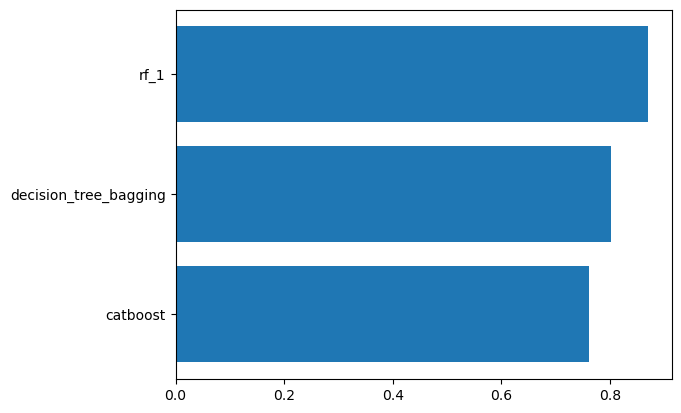

In [166]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(data=results.sort_values('r2_validation', ascending=False)
        , y = 'model'
        , width = 'r2_validation')
ax.invert_yaxis() 

# SHAP Values Analysis


In [167]:
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat.shap_values(X_train)

In [168]:
print("Attributes")
print("")
print(X_train.iloc[0,:])
print("")
print("Price")
print("")
print(y_train.iloc[0,0])

Attributes

sq_meters_built              441
rooms                          4
bathrooms                      4
balcony                      1.0
terrace                      1.0
exterior                     1.0
orientation              Unknown
rooftop                      0.0
elevator                     1.0
pool                         0.0
ac                           1.0
heating                  Unknown
year_built                1936.0
dist_city_center        0.908429
property_type               piso
dist_closest_station    0.100003
Name: 4854, dtype: object

Price

3200000


In [169]:
print("CATBoost Shap visualization for instance 0")
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0,:], X_train.iloc[0,:])

CATBoost Shap visualization for instance 0


In [170]:
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0:1000], X_train[0:1000])

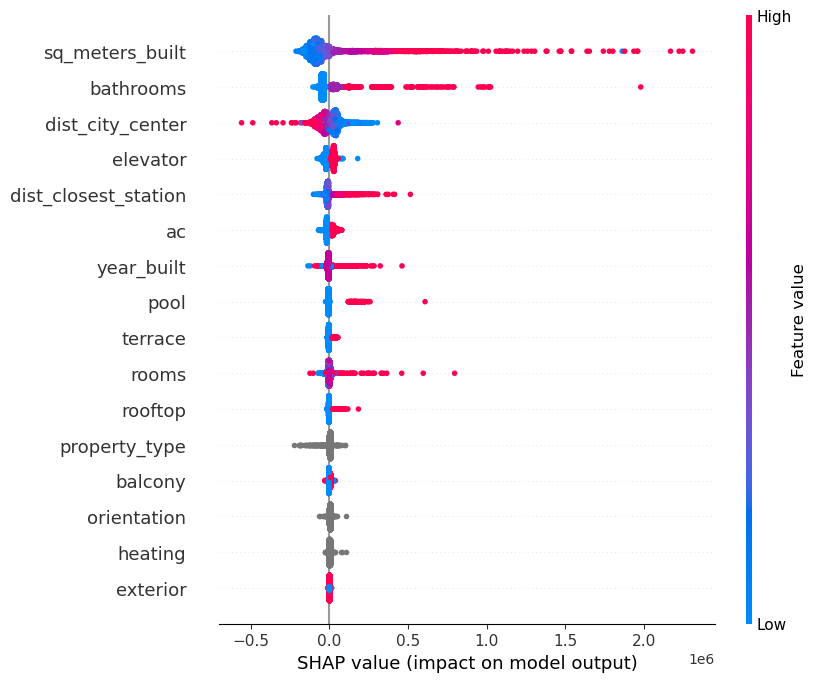

In [171]:
shap.summary_plot(shap_values_cat, X_train)

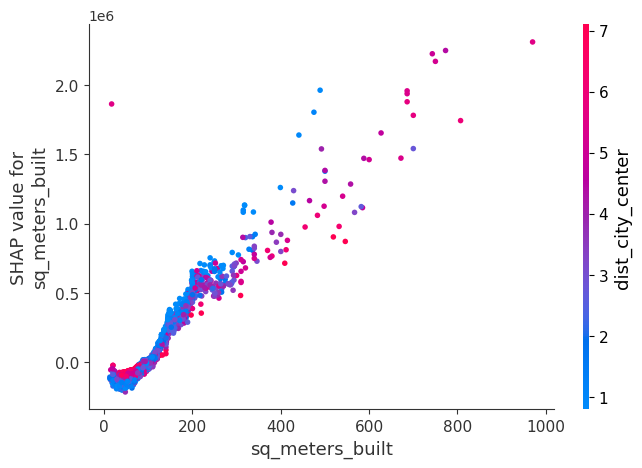

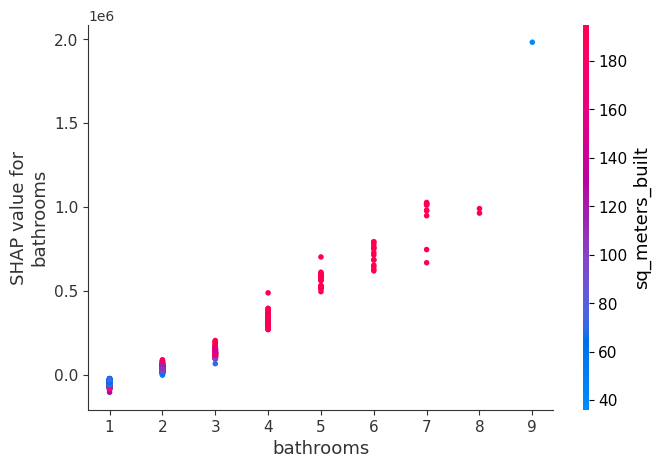

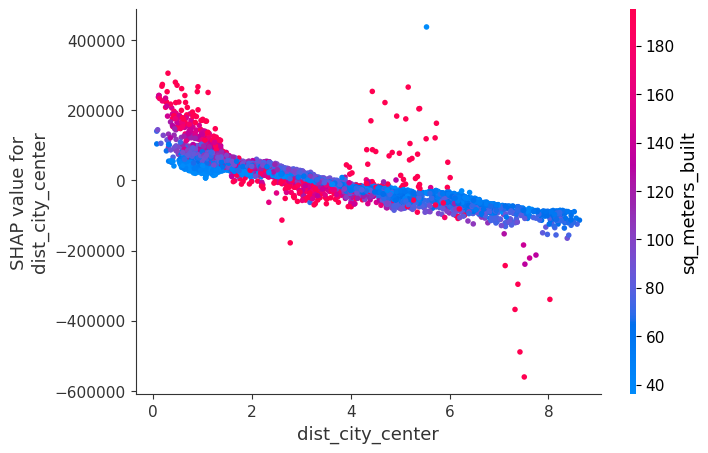

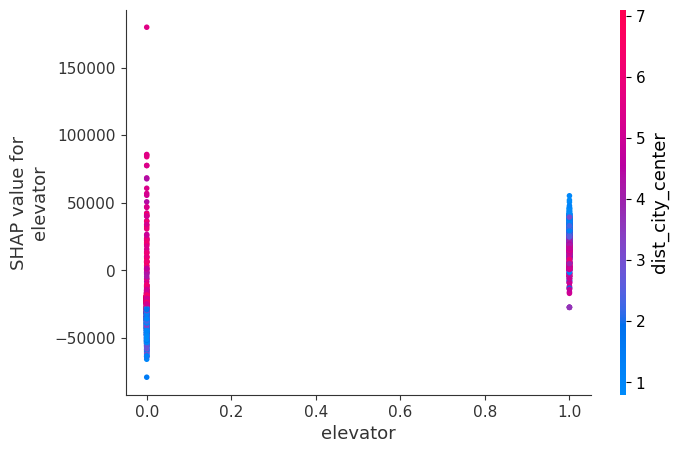

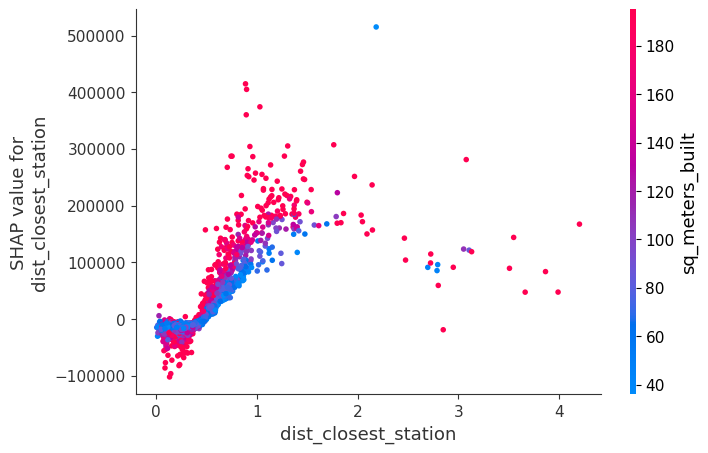

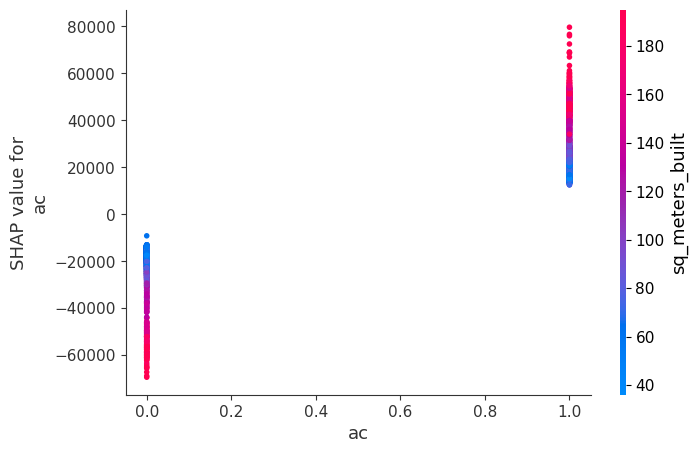

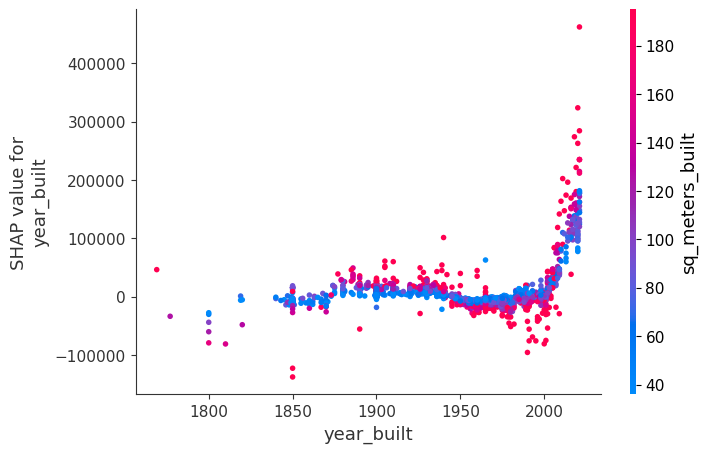

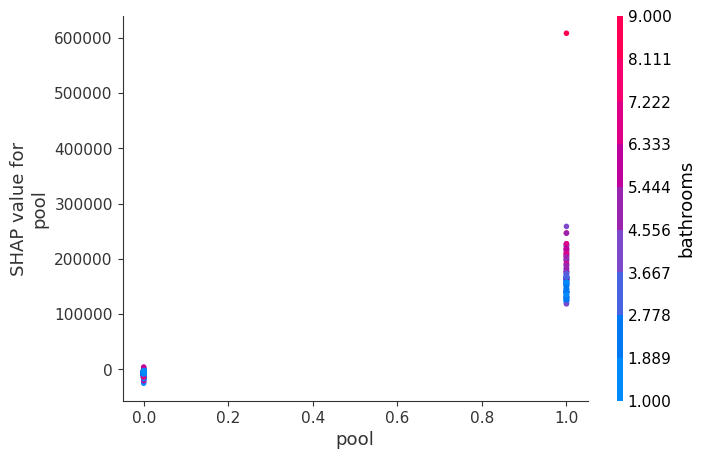

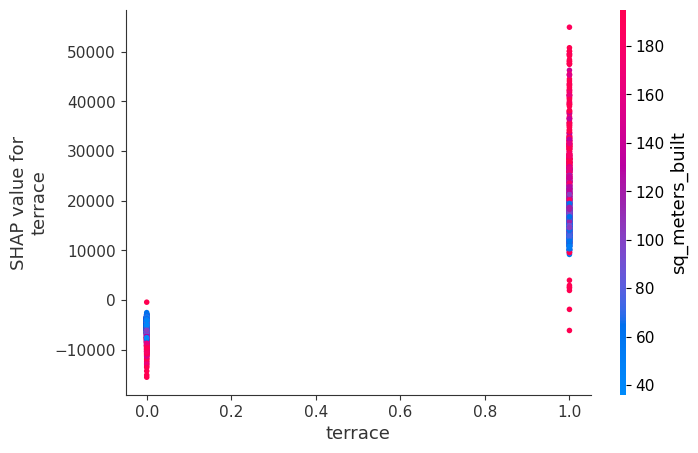

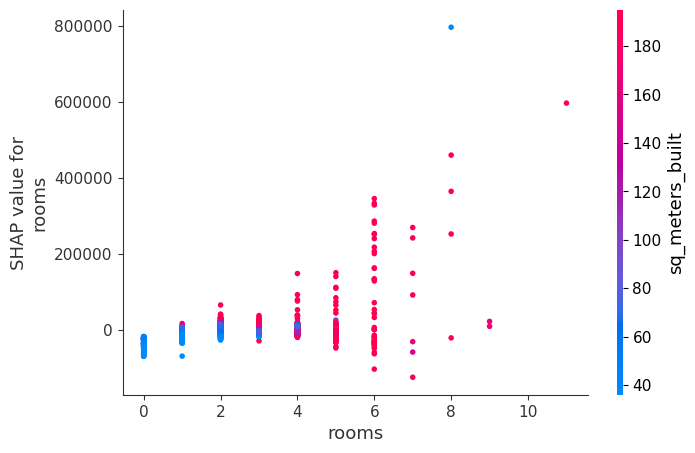

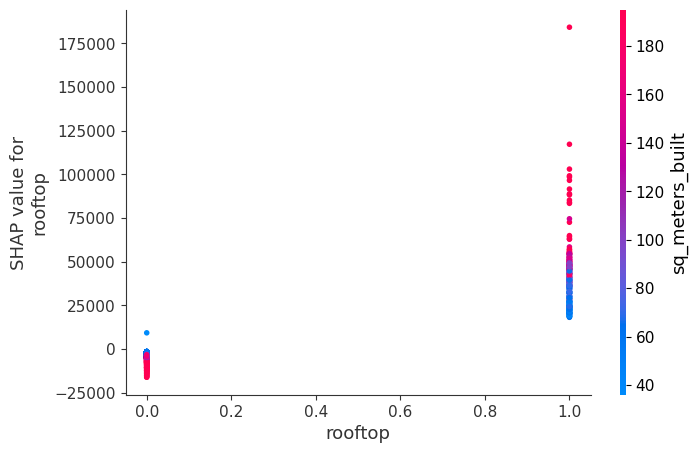

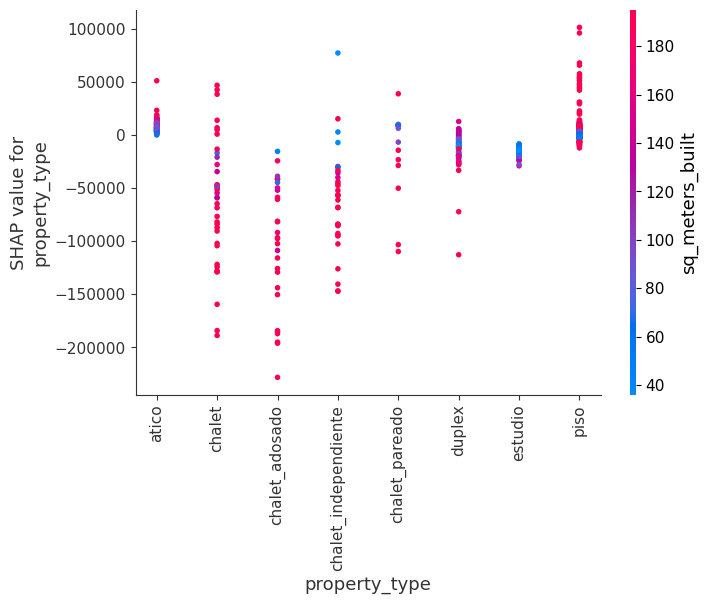

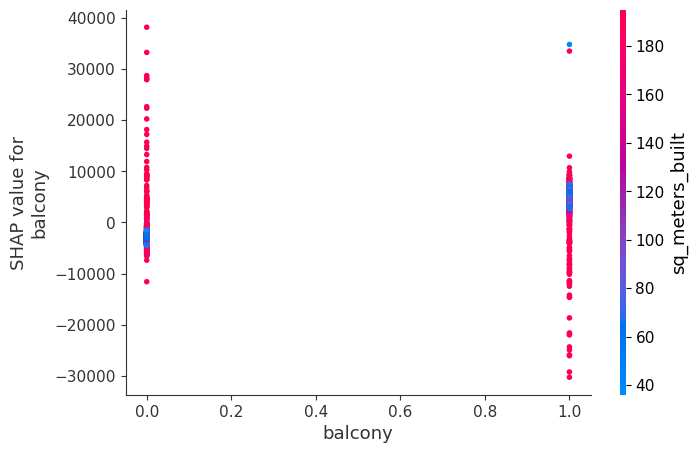

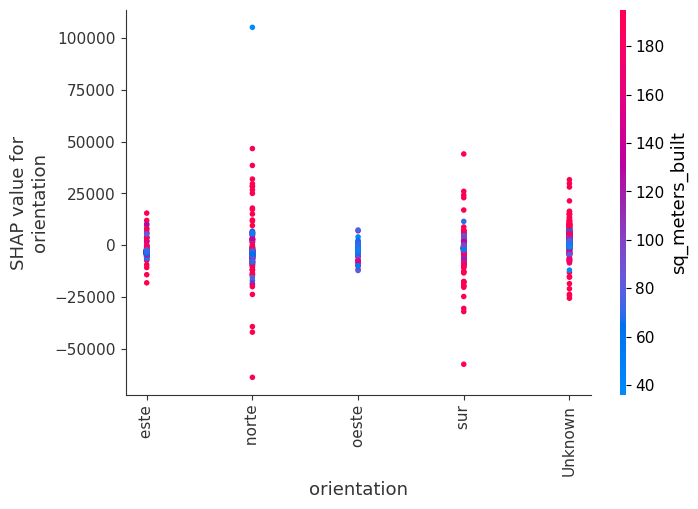

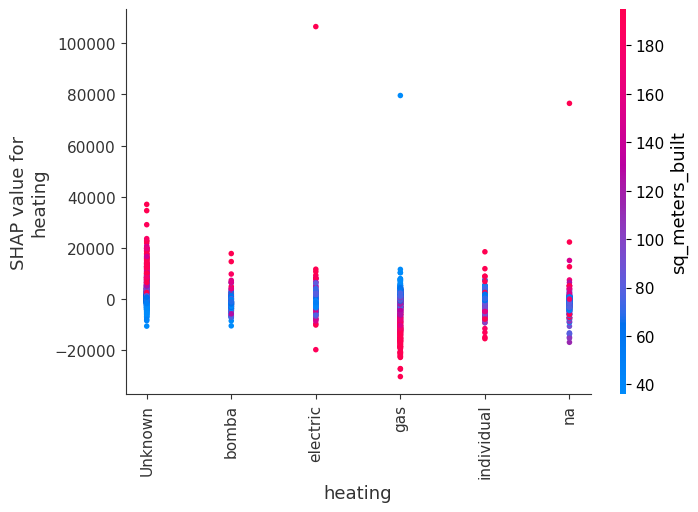

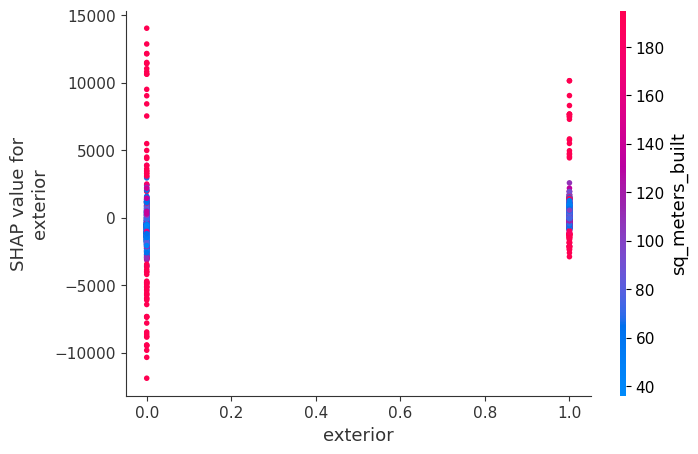

In [172]:
top_inds = np.argsort(-np.sum(np.abs(shap_values_cat), 0))

for i in range(0,len(top_inds)):
    shap.dependence_plot(top_inds[i], shap_values_cat, X_train)